# <font color='steelblue'>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'> Post-graduation in Data Science for Finance
##### <center> <font color='steelblue'> 2024 / 25
# <center> <font color='steelblue'> Machine Learning in Finance
### <center> <font color='steelblue'><font> Prof. Ian Scott </font>
______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Students:</font>
##### <center> <font color='steelblue'><font> Diogo Rodrigues, 20211666 </font>
##### <center> <font color='steelblue'><font> Gonçalo Gomes, 20211007 </font>
##### <center> <font color='steelblue'><font> Petr Terletskiy, 20211580 </font>
##### <center> <font color='steelblue'><font> Tiago Paulino, 20211601 </font>

______________________________________________________________________________________________________________________________________________________
### <center> <font color='steelblue'><font> Group Project - Credit Scoring Classification and Customer Segmentation </font>
______________________________________________________________________________________________________________________________________________________

Link to the video where we explain the steps of the project: 

# Libraries

In [2]:
!pip install catboost 
!pip install xgboost 
!pip install lightgbm
!pip install imblearn
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, silhouette_score # evaluation metrics
from sklearn.model_selection import GridSearchCV, ParameterGrid, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

# clustering
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
import umap

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# Dataset

### Information about the Dataset

In [4]:
# Checking the Information Regarding the Dataset Variables

df_description = pd.read_csv("./project_desc.csv")

df_description

Row  \
0                     SK_ID_CURR   
1                         TARGET   
2             NAME_CONTRACT_TYPE   
3                    CODE_GENDER   
4                   FLAG_OWN_CAR   
5                FLAG_OWN_REALTY   
6                   CNT_CHILDREN   
7               AMT_INCOME_TOTAL   
8                     AMT_CREDIT   
9                    AMT_ANNUITY   
10               AMT_GOODS_PRICE   
11               NAME_TYPE_SUITE   
12              NAME_INCOME_TYPE   
13           NAME_EDUCATION_TYPE   
14            NAME_FAMILY_STATUS   
15             NAME_HOUSING_TYPE   
16    REGION_POPULATION_RELATIVE   
17                    DAYS_BIRTH   
18                 DAYS_EMPLOYED   
19             DAYS_REGISTRATION   
20               DAYS_ID_PUBLISH   
21                   OWN_CAR_AGE   
22                    FLAG_MOBIL   
23                FLAG_EMP_PHONE   
24               FLAG_WORK_PHONE   
25              FLAG_CONT_MOBILE   
26                    FLAG_PHONE   
27                    FLAG_EMAIL   
28               OCCUPATION_TYPE   
29               CNT_FAM_MEMBERS   
30          REGION_RATING_CLIENT   
31   REGION_RATING_CLIENT_W_CITY   
32    WEEKDAY_APPR_PROCESS_START   
33       HOUR_APPR_PROCESS_START   
34    REG_REGION_NOT_LIVE_REGION   
35    REG_REGION_NOT_WORK_REGION   
36   LIVE_REGION_NOT_WORK_REGION   
37        REG_CITY_NOT_LIVE_CITY   
38        REG_CITY_NOT_WORK_CITY   
39       LIVE_CITY_NOT_WORK_CITY   
40             ORGANIZATION_TYPE   
41                APARTMENTS_AVG   
42              BASEMENTAREA_AVG   
43   YEARS_BEGINEXPLUATATION_AVG   
44               YEARS_BUILD_AVG   
45                COMMONAREA_AVG   
46                 ELEVATORS_AVG   
47                 ENTRANCES_AVG   
48                 FLOORSMAX_AVG   
49                 FLOORSMIN_AVG   
50                  LANDAREA_AVG   
51          LIVINGAPARTMENTS_AVG   
52                LIVINGAREA_AVG   
53       NONLIVINGAPARTMENTS_AVG   
54             NONLIVINGAREA_AVG   
55               APARTMENTS_MODE   
56             BASEMENTAREA_MODE   
57  YEARS_BEGINEXPLUATATION_MODE   
58              YEARS_BUILD_MODE   
59               COMMONAREA_MODE   
60                ELEVATORS_MODE   
61                ENTRANCES_MODE   
62                FLOORSMAX_MODE   
63                FLOORSMIN_MODE   
64                 LANDAREA_MODE   
65         LIVINGAPARTMENTS_MODE   
66               LIVINGAREA_MODE   
67      NONLIVINGAPARTMENTS_MODE   
68            NONLIVINGAREA_MODE   
69               APARTMENTS_MEDI   
70             BASEMENTAREA_MEDI   
71  YEARS_BEGINEXPLUATATION_MEDI   
72              YEARS_BUILD_MEDI   
73               COMMONAREA_MEDI   
74                ELEVATORS_MEDI   
75                ENTRANCES_MEDI   
76                FLOORSMAX_MEDI   
77                FLOORSMIN_MEDI   
78                 LANDAREA_MEDI   
79         LIVINGAPARTMENTS_MEDI   
80               LIVINGAREA_MEDI   
81      NONLIVINGAPARTMENTS_MEDI   
82            NONLIVINGAREA_MEDI   
83            FONDKAPREMONT_MODE   
84                HOUSETYPE_MODE   
85                TOTALAREA_MODE   
86            WALLSMATERIAL_MODE   
87           EMERGENCYSTATE_MODE   
88      OBS_30_CNT_SOCIAL_CIRCLE   
89      DEF_30_CNT_SOCIAL_CIRCLE   
90      OBS_60_CNT_SOCIAL_CIRCLE   
91      DEF_60_CNT_SOCIAL_CIRCLE   
92        DAYS_LAST_PHONE_CHANGE   
93                        MISSED   
94                     RECOVERED   

                                                                                                                                                                                                                                                                             Description  \
0                                                                                                                                                                                                                                                               ID of loan in our sample   
1   

1. Identification
- SK_ID_CURR: ID of loan in our sample
<br>
<br>
<br>

2. Target Variable
- TARGET: Target variable (1 - client with payment difficulties, 0 - all other cases)
<br>
<br>
<br>

3. Loan Information
- NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
- AMT_CREDIT: Credit amount of the loan
- AMT_ANNUITY: Loan annuity
- AMT_GOODS_PRICE: Price of the goods for which the loan is given
<br>
<br>
<br>

4. Client Demographics
- CODE_GENDER: Gender of the client
- FLAG_OWN_CAR: Flag if the client owns a car
- FLAG_OWN_REALTY: Flag if client owns a house or flat
- CNT_CHILDREN: Number of children the client has
- AMT_INCOME_TOTAL: Income of the client
- NAME_INCOME_TYPE: Client's income type (e.g., working, maternity leave)
- NAME_EDUCATION_TYPE: Level of highest education the client achieved
- NAME_FAMILY_STATUS: Family status of the client
- NAME_HOUSING_TYPE: Housing situation of the client (e.g., renting, living with parents)
- OCCUPATION_TYPE: Kind of occupation the client has
- CNT_FAM_MEMBERS: Number of family members the client has
<br>
<br>
<br>

5. Client Contact Information
- FLAG_MOBIL: Did client provide mobile phone
- FLAG_EMP_PHONE: Did client provide work phone
- FLAG_WORK_PHONE: Did client provide home phone
- FLAG_CONT_MOBILE: Was mobile phone reachable
- FLAG_PHONE: Did client provide home phone
- FLAG_EMAIL: Did client provide email
<br>
<br>
<br>

6. Time-Related Features
- DAYS_BIRTH: Client's age in days at the time of application
- DAYS_EMPLOYED: Days before the application the person started current employment
- DAYS_REGISTRATION: Days before the application the client changed registration
- DAYS_ID_PUBLISH: Days before the application the client changed the identity document
- OWN_CAR_AGE: Age of client's car
<br>
<br>
<br>

7. Regional Information
- REGION_POPULATION_RELATIVE: Normalized population of the region where the client lives
- REGION_RATING_CLIENT: Rating of the region where the client lives
- REGION_RATING_CLIENT_W_CITY: Rating of the region considering the city
- REG_REGION_NOT_LIVE_REGION: Flag if permanent address does not match contact address at the region level
- REG_REGION_NOT_WORK_REGION: Flag if permanent address does not match work address at the region level
- LIVE_REGION_NOT_WORK_REGION: Flag if contact address does not match work address at the region level
- REG_CITY_NOT_LIVE_CITY: Flag if permanent address does not match contact address at the city level
- REG_CITY_NOT_WORK_CITY: Flag if permanent address does not match work address at the city level
- LIVE_CITY_NOT_WORK_CITY: Flag if contact address does not match work address at the city level
<br>
<br>
<br>

8. Application Timing
- WEEKDAY_APPR_PROCESS_START: Day of the week the client applied for the loan
- HOUR_APPR_PROCESS_START: Approximate hour of loan application
<br>
<br>
<br>

9. Work Information
- ORGANIZATION_TYPE: Type of organization where the client works
<br>
<br>
<br>

10. Building Information (Normalized Features)
- APARTMENTS_AVG, APARTMENTS_MODE, APARTMENTS_MEDI: Apartment size
- BASEMENTAREA_AVG, BASEMENTAREA_MODE, BASEMENTAREA_MEDI: Basement area
- YEARS_BEGINEXPLUATATION_AVG, YEARS_BEGINEXPLUATATION_MODE YEARS_BEGINEXPLUATATION_MEDI: Years since the building began exploitation
- YEARS_BUILD_AVG, YEARS_BUILD_MODE, YEARS_BUILD_MEDI: Age of the building
- COMMONAREA_AVG, COMMONAREA_MODE, COMMONAREA_MEDI: Common area
- ELEVATORS_AVG, ELEVATORS_MODE, ELEVATORS_MEDI: Number of elevators
- ENTRANCES_AVG, ENTRANCES_MODE, ENTRANCES_MEDI: Number of entrances
- FLOORSMAX_AVG, FLOORSMAX_MODE, FLOORSMAX_MEDI: Maximum floors
- FLOORSMIN_AVG, FLOORSMIN_MODE, FLOORSMIN_MEDI: Minimum floors
- LANDAREA_AVG, LANDAREA_MODE, LANDAREA_MEDI: Land area
- LIVINGAPARTMENTS_AVG, LIVINGAPARTMENTS_MODE, LIVINGAPARTMENTS_MEDI: Living apartments
- LIVINGAREA_AVG, LIVINGAREA_MODE, LIVINGAREA_MEDI: Living area
- NONLIVINGAPARTMENTS_AVG, NONLIVINGAPARTMENTS_MODE, NONLIVINGAPARTMENTS_MEDI: Non-living apartments
- NONLIVINGAREA_AVG, NONLIVINGAREA_MODE, NONLIVINGAREA_MEDI: Non-living area

### Reading the Data

In [5]:
df = pd.read_csv("./project_data.csv")

df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      330409     0.0         Cash loans           F            Y   
1      421359     0.0    Revolving loans           M            N   
2      378826     0.0         Cash loans           F            N   
3      305942     0.0         Cash loans           F            N   
4      329908     0.0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          112500.0   1125000.0      33025.5   
1               Y             1          162000.0    270000.0      13500.0   
2               Y             0          157500.0    580500.0      49824.0   
3               Y             1          121500.0    280170.0      30303.0   
4               Y             0          135000.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0        1125000.0   Unaccompanied               Working   
1         270000.0   Unaccompanied               Working   
2         580500.0   Unaccompanied             Pensioner   
3         247500.0   Unaccompanied  Commercial associate   
4         135000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education            Married  House / apartment   
1               Higher education            Married  House / apartment   
2  Secondary / secondary special            Married  House / apartment   
3              Incomplete higher            Married  House / apartment   
4  Secondary / secondary special     Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.014520      -14709           -851            -3644.0   
1                    0.035792       -8524           -881            -1178.0   
2                    0.018801      -23804         365243            -3408.0   
3                    0.009334       -9576          -1875            -7353.0   
4                    0.010006       -8018           -643            -1142.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2647          8.0           1               1                0   
1            -1202          NaN           1               1                0   
2            -4200          NaN           1               0                0   
3             -919          NaN           1               1                0   
4             -689          7.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  \
0                 1           0           0  High skill tech staff   
1                 1           0           0                    NaN   
2                 1           0           0                    NaN   
3                 1           0           0            Accountants   
4                 1           0           0               Laborers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              2.0                     2                            2   
1              3.0                     2                            2   
2              2.0                     2                            2   
3              3.0                     2                            2   
4              2.0                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                     SUNDAY                       12   
1                     MONDAY                       15   
2                  WEDNESDAY                        9   
3                     SUNDAY                       11   
4                   THURSDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0   

### Corpus Split

* In order to eliminate any leakage from the test set, the first step is to split the data.
* Following this thought, keep in mind that all transformations executed in this notebook, are fitted in the training set and then applied in the test set to prevent the models to learn from the test data!

In [6]:
df_train, df_test = train_test_split(df, random_state = 42, stratify = df["TARGET"].values)

print("Shape of Training Data:", df_train.shape)
print("Shape of Training Data:", df_test.shape)

Shape of Training Data: (119093, 95)
Shape of Training Data: (39698, 95)


# Task 1

## Task 1.A - Exploratory Data Analysis (EDA)

In [7]:
# Number of rows and columns

df_train.shape

(119093, 95)

* Checking overall statistics for numerical features

In [8]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  119093.000000  119093.000000  119093.000000      1.190930e+05   
mean   278479.935454       0.149992       0.424022      1.690841e+05   
std    102775.968329       0.357065       0.727578      3.542268e+05   
min    100002.000000       0.000000       0.000000      2.610000e+04   
25%    189386.000000       0.000000       0.000000      1.125000e+05   
50%    278813.000000       0.000000       0.000000      1.440000e+05   
75%    367275.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  1.190930e+05  119089.000000     1.189810e+05   
mean   5.972396e+05   27110.129025     5.359000e+05   
std    3.996193e+05   14438.462237     3.666833e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16623.000000     2.385000e+05   
50%    5.155290e+05   24952.500000     4.500000e+05   
75%    8.086500e+05   34578.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               119093.000000  119093.000000  119093.000000   
mean                     0.020748  -15944.691418   62276.026038   
std                      0.013710    4363.525955  139936.909661   
min                      0.000290  -25200.000000  -17546.000000   
25%                      0.010006  -19581.000000   -2715.000000   
50%                      0.018850  -15618.000000   -1201.000000   
75%                      0.028663  -12304.000000    -299.000000   
max                      0.072508   -7676.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE     FLAG_MOBIL  \
count      119093.000000    119093.000000  39991.000000  119093.000000   
mean        -4967.897156     -2975.611808     12.160836       0.999992   
std          3520.110708      1510.684640     11.932644       0.002898   
min        -24672.000000     -6337.000000      0.000000       0.000000   
25%         -7443.000000     -4287.000000      5.000000       1.000000   
50%         -4486.000000     -3219.000000      9.000000       1.000000   
75%         -1986.000000     -1688.000000     15.000000       1.000000   
max             0.000000         0.000000     91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   119093.000000    119093.000000     119093.000000  119093.000000   
mean         0.824163         0.202044          0.998153       0.278833   
std          0.380683         0.401526          0.042941       0.448427   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  119093.000000    119093.000000         119093.000000   
mean        0.056519         2.159119              2.059642   
std         0.230922         0.916421              0.509733   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                119093.000000            119093.000000   
mean                      2.038466                12.044117   
std                       0.504096                 3.266672   
min                       1.000000                 0.000000   
25%                       2.000000 

* Checking overall statistics for categorical features

In [9]:
df_train.describe(include=['object'])

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              119093      119093       119093          119093   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               108084       77687        79101           82455   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           118590           119093                         119093   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq             96449            62232                          85269   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              119093             119093           82299   
unique                  5                  6              18   
top               Married  House / apartment        Laborers   
freq                75841             105453           21848   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      119093                  119093              37322   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        20990                   26652              28378   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count            58855              58099               62102  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq             57768              25281               61162

* Organizing the data according to the data types

In [10]:
target_feature = 'TARGET'

id_feature = 'SK_ID_CURR'

boolean_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE',
                    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

categorical_features = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
                        'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                        'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

numerical_features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                      'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                      'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
                      'HOUR_APPR_PROCESS_START', 'APARTMENTS_AVG',
                      'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
                      'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                      'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
                      'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
                      'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
                      'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
                      'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
                      'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                      'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                      'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                      'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'MISSED', 'RECOVERED']

In [11]:
len(df_train.columns) == len(boolean_features) + len(categorical_features) + len(numerical_features) + 2

True

In [12]:
df_train.select_dtypes(include=['number']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'B

### Missing values and Duplicate Loans

In [13]:
pd.set_option('display.max_rows', 30)
def info(table):
    print(f'\n the shape of the table is : \n',table.shape)
    print('-' * 80)
    print('\n data types : ', table.dtypes.value_counts().sort_values())
    print('-' * 80)
    missings=table.isna().mean()[table.isna().mean().sort_values(ascending=False)!=0].sort_values(ascending=False)
    print('-' * 80)
    print('\n number of features having missing data : ',len(missings))
    print('-' * 80)
    print('\n missing data in the table: \n',missings)
    print('-' * 80)
    print(missings[missings>0.5])
    print('-' * 80)
    print('\n missing data over 50% : ',len(missings[missings>0.5]))
info(df_train)


 the shape of the table is : 
 (119093, 95)
--------------------------------------------------------------------------------

 data types :  object     16
int64      21
float64    58
Name: count, dtype: int64
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

 number of features having missing data :  58
--------------------------------------------------------------------------------

 missing data in the table: 
 RECOVERED                   0.850008
COMMONAREA_AVG              0.701317
COMMONAREA_MEDI             0.701317
COMMONAREA_MODE             0.701317
NONLIVINGAPARTMENTS_MEDI    0.696985
                              ...   
DEF_30_CNT_SOCIAL_CIRCLE    0.003090
OBS_60_CNT_SOCIAL_CIRCLE    0.003090
AMT_GOODS_PRICE             0.000940
AMT_ANNUITY                 0.000034
DAYS_LAST_PHONE_CHANGE      0.000008
Length: 58, dtype: float64
-----------------------------------

* The training section that we are working with has 119093 rows and 95 columns.
  * One of the big problems here is that we have a huge amoung of missing data in 58 columns with 44 columns having more than 50% of null values.

In [14]:
# Calculating the percentage of missing values for each column

missing_values_percentage = df_train.isnull().mean() * 100

# Sorting the columns by percentage of missing values in descending order

missing_values_sorted = pd.DataFrame(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))
missing_values_sorted.columns = ["Percentage of Missing Values"]

missing_values_sorted

Percentage of Missing Values
RECOVERED                                    85.000798
COMMONAREA_AVG                               70.131746
COMMONAREA_MEDI                              70.131746
COMMONAREA_MODE                              70.131746
NONLIVINGAPARTMENTS_MEDI                     69.698471
...                                                ...
DEF_30_CNT_SOCIAL_CIRCLE                      0.309002
OBS_60_CNT_SOCIAL_CIRCLE                      0.309002
AMT_GOODS_PRICE                               0.094044
AMT_ANNUITY                                   0.003359
DAYS_LAST_PHONE_CHANGE                        0.000840

[58 rows x 1 columns]

* We have a lot of columns with a high percentage of missing values. We will have to deal with them in the preprocessing phase.



In [15]:
# Check for duplicate rows based on the "SK_ID_CURR" column

duplicate_rows = df_train[df_train.duplicated(subset=['SK_ID_CURR'], keep=False)]

# Counting the number of duplicate rows

print("Number of records with duplicate loan ids:", duplicate_rows.shape[0])

Number of records with duplicate loan ids: 1790


* It would be interesting to see if these duplicate loans have any differences across different features:

In [16]:
# Grouping duplicate rows by "SK_ID_CURR"

differences = duplicate_rows.groupby("SK_ID_CURR").nunique()

# Identifying SK_ID_CURR groups where differences exist

non_identical_duplicates = differences[(differences > 1).any(axis=1)]

columns_with_differences = {}

for sk_id in non_identical_duplicates.index:

    # Filter rows for the specific SK_ID_CURR

    group_rows = duplicate_rows[duplicate_rows["SK_ID_CURR"] == sk_id]

    # Find columns where values differ

    differing_columns = group_rows.loc[:, group_rows.nunique() > 1].columns.tolist()

    columns_with_differences[sk_id] = differing_columns

if columns_with_differences:
    print("Columns with differences for each duplicate SK_ID_CURR:")
    for sk_id, columns in columns_with_differences.items():
        print(f"SK_ID_CURR {sk_id}: {columns}")
else:
    print("No differences found across duplicate rows.")

Columns with differences for each duplicate SK_ID_CURR:
SK_ID_CURR 105383: ['MISSED', 'RECOVERED']
SK_ID_CURR 121814: ['MISSED', 'RECOVERED']
SK_ID_CURR 124012: ['MISSED', 'RECOVERED']
SK_ID_CURR 125077: ['MISSED', 'RECOVERED']
SK_ID_CURR 125467: ['MISSED', 'RECOVERED']
SK_ID_CURR 125602: ['MISSED', 'RECOVERED']
SK_ID_CURR 126228: ['RECOVERED']
SK_ID_CURR 129238: ['MISSED', 'RECOVERED']
SK_ID_CURR 131924: ['MISSED', 'RECOVERED']
SK_ID_CURR 132929: ['MISSED', 'RECOVERED']
SK_ID_CURR 136360: ['MISSED', 'RECOVERED']
SK_ID_CURR 136369: ['MISSED', 'RECOVERED']
SK_ID_CURR 139168: ['MISSED', 'RECOVERED']
SK_ID_CURR 140584: ['MISSED', 'RECOVERED']
SK_ID_CURR 140957: ['MISSED', 'RECOVERED']
SK_ID_CURR 148866: ['MISSED', 'RECOVERED']
SK_ID_CURR 156535: ['RECOVERED']
SK_ID_CURR 156607: ['MISSED', 'RECOVERED']
SK_ID_CURR 156936: ['MISSED', 'RECOVERED']
SK_ID_CURR 164275: ['MISSED', 'RECOVERED']
SK_ID_CURR 166357: ['RECOVERED']
SK_ID_CURR 167471: ['MISSED', 'RECOVERED']
SK_ID_CURR 169125: ['MISSED'

* The duplicates only have differences in the later identified target leakage columns: "MISSED" and "RECOVERED".

  *  We will have to deal with these duplicate loans later in the preprocessing phase.

### Target Variable



Information for the TARGET feature:




TARGET
0.0    101230
1.0     17863
Name: count, dtype: int64



______________________________________________________________________________________________________________




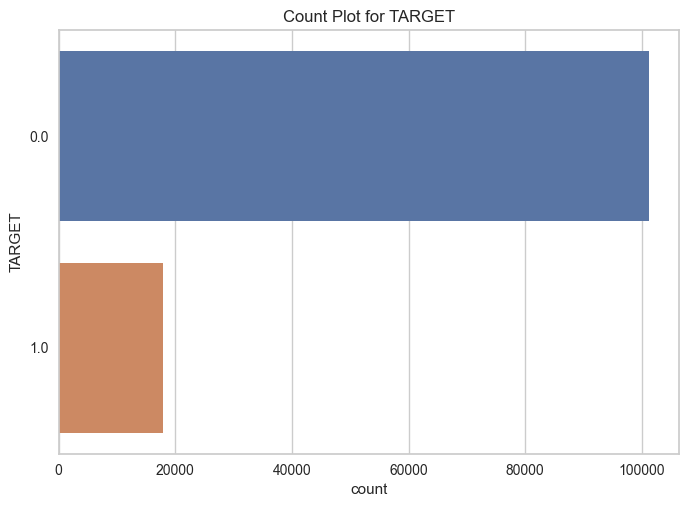



______________________________________________________________________________________________________________




In [17]:
print('\n')
print(f'Information for the {target_feature} feature:')
print('\n')

# value counts
value_counts = df_train[target_feature].value_counts(dropna=False)
display(value_counts)

print('\n')
print('______________________________________________________________________________________________________________')
print('\n')

# countplot
order = df_train[target_feature].value_counts().index
sns.countplot(y=df_train[target_feature], palette='deep', order=order)
plt.title(f'Count Plot for {target_feature}')
plt.show()

print('\n')
print('______________________________________________________________________________________________________________')
print('\n')


* We have a highly unbalanced dataset in which we have more than 80% of non-default cases.
  
  *  This insight can lead into biased predictions in the modelling phase and we will need to find a good approach to solve it.

### Numerical Features

* In this section, we will analyse the **numerical** features.

* The .describe() function will be used, and for visualization purposes we will be using **boxplots** and **histograms**.

In [18]:
print(f'There are {len(numerical_features)} numerical features in the dataset.')

There are 63 numerical features in the dataset.


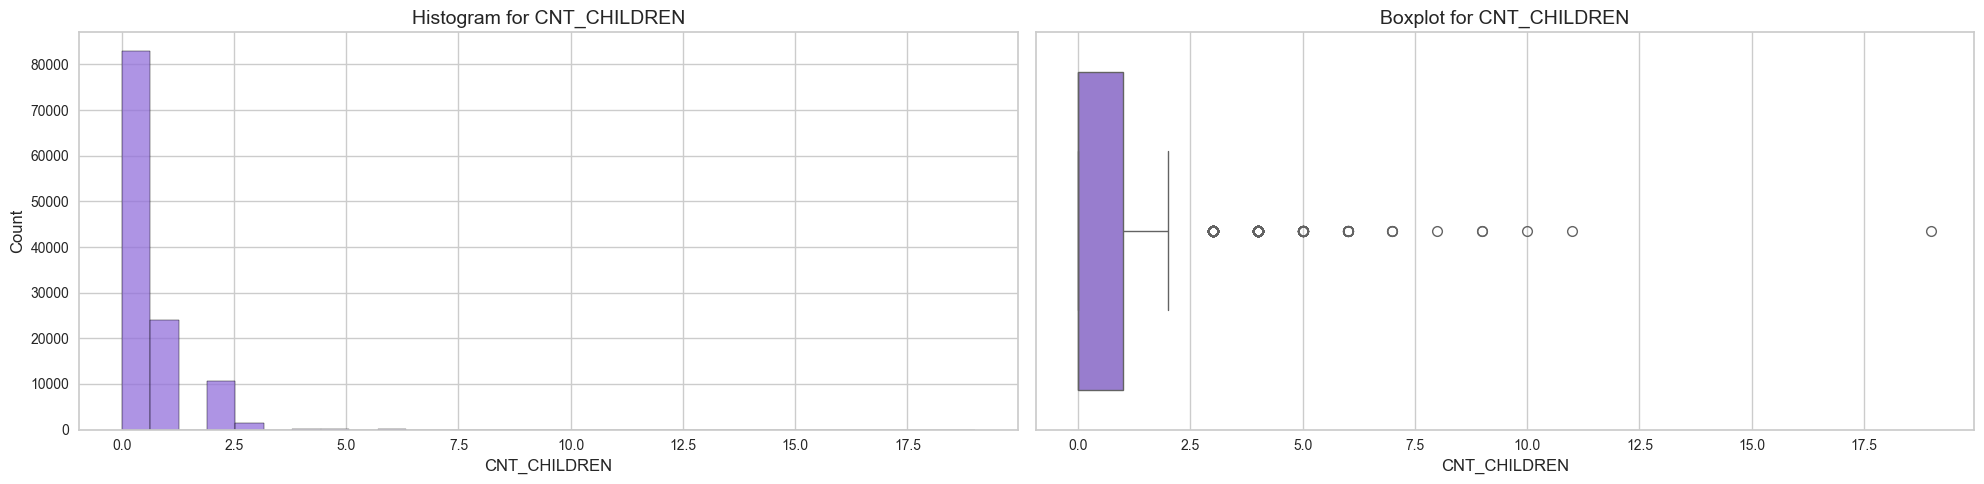

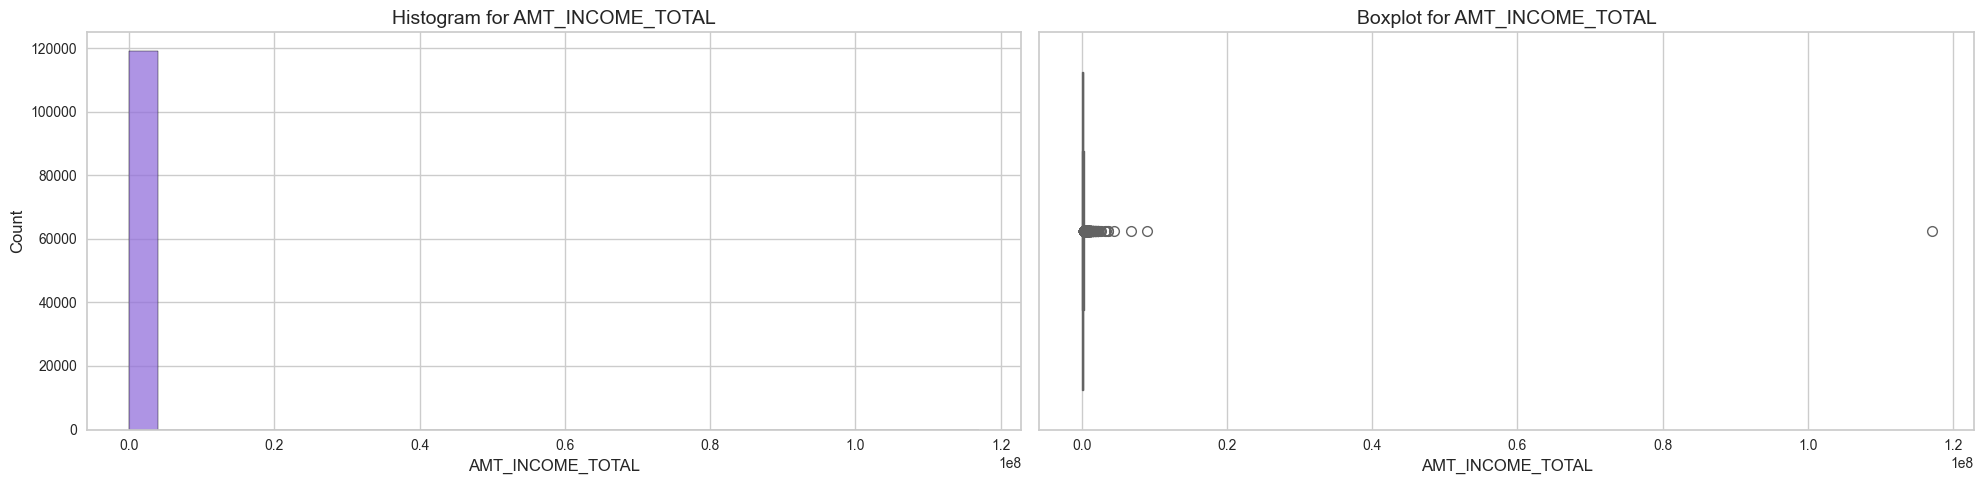

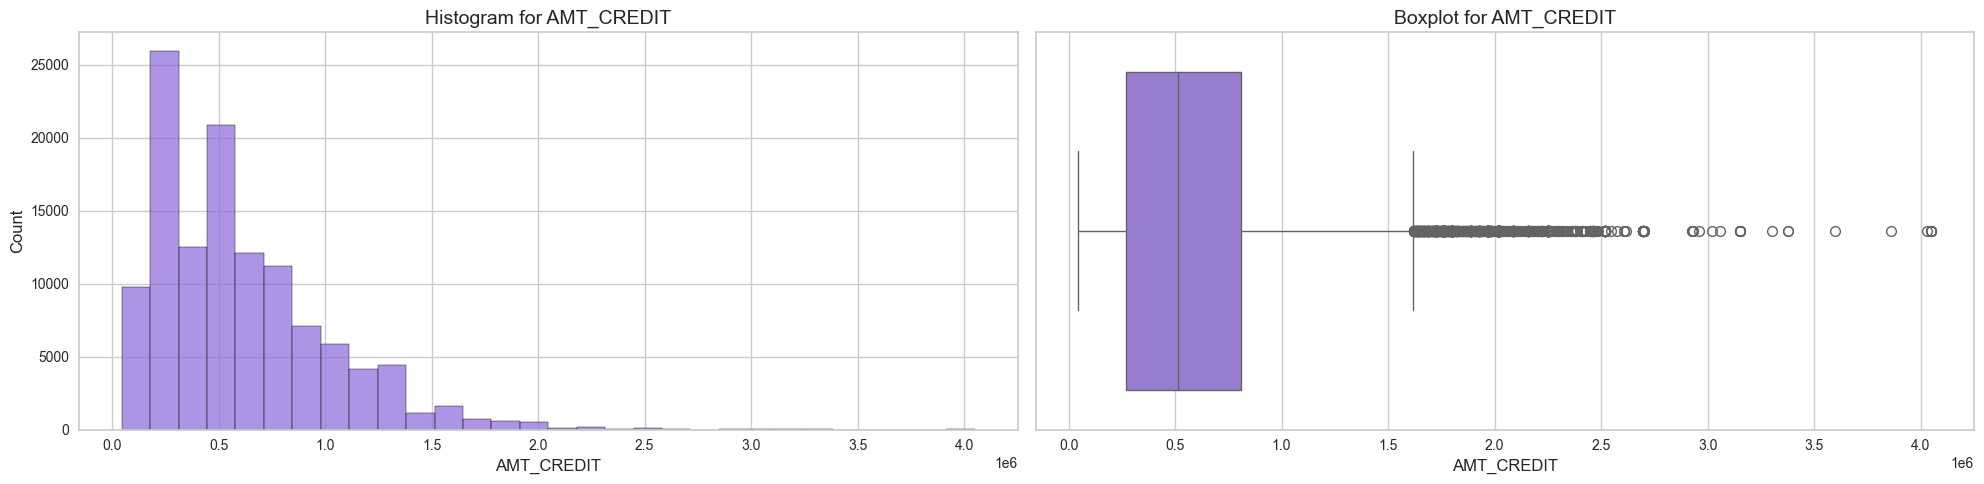

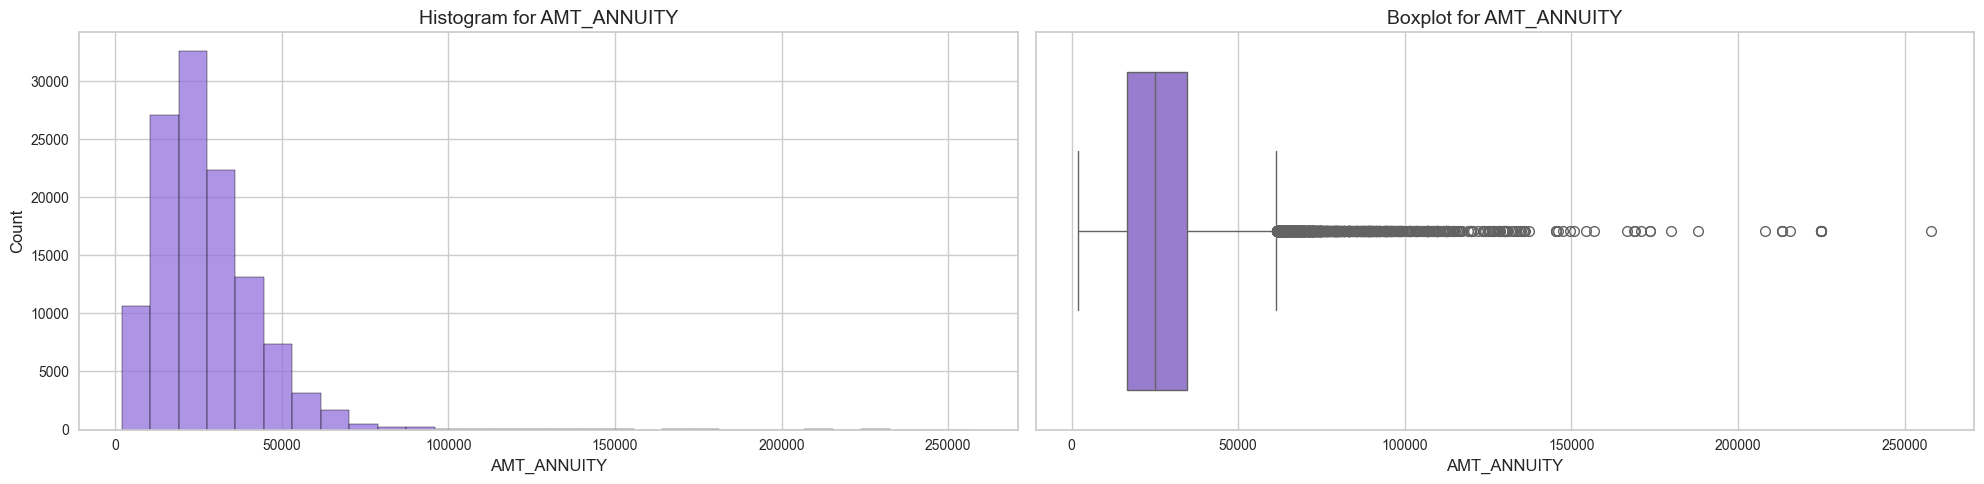

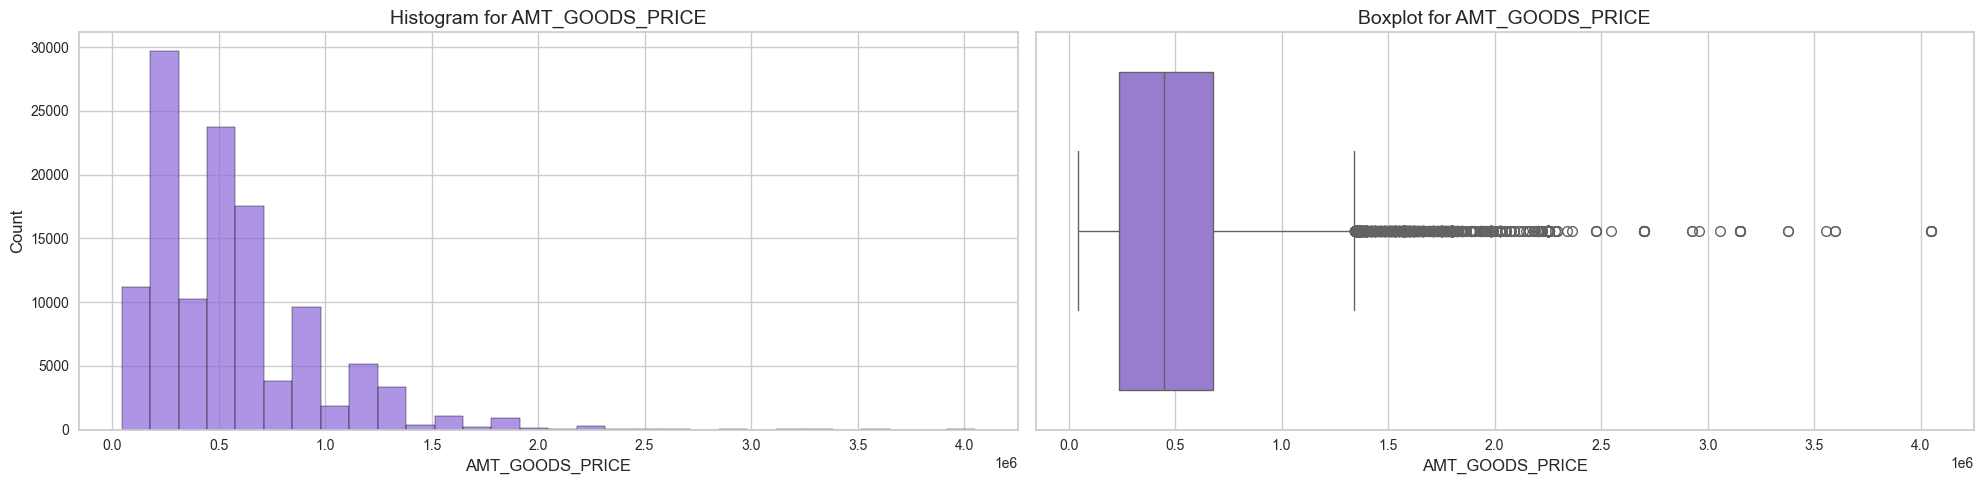

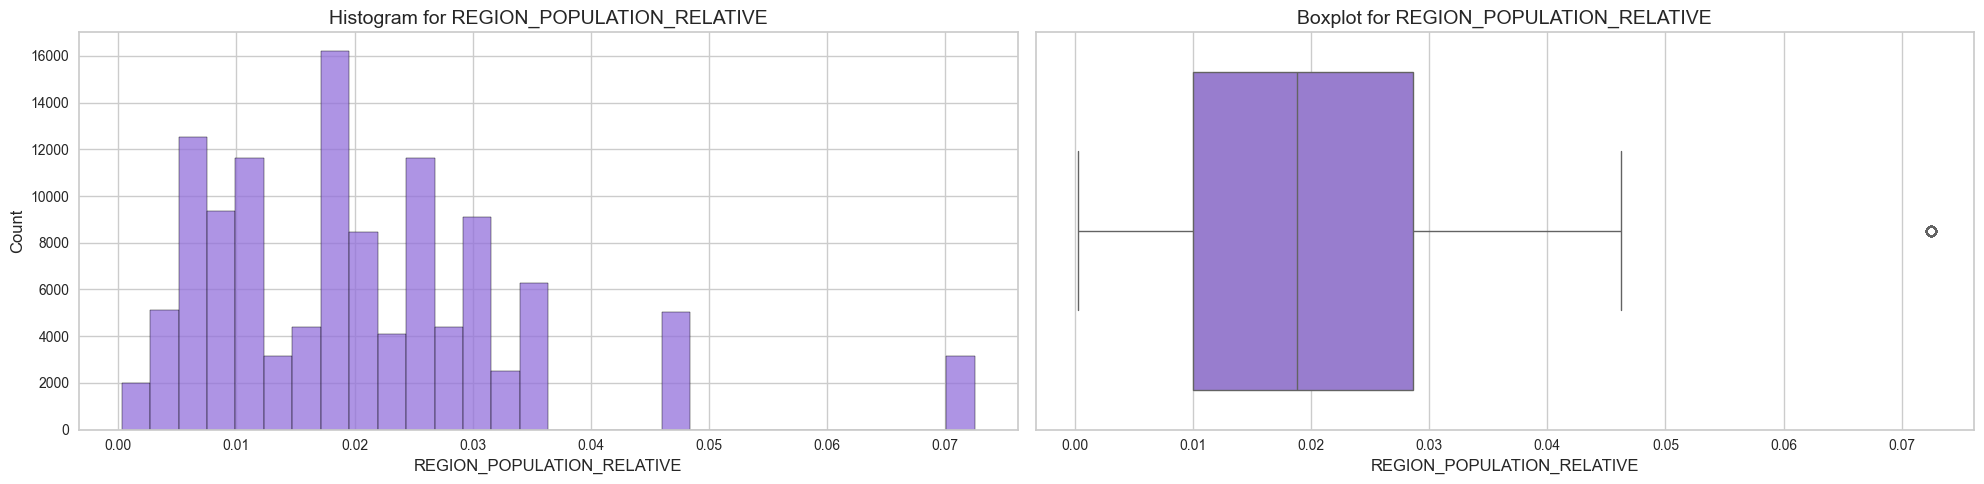

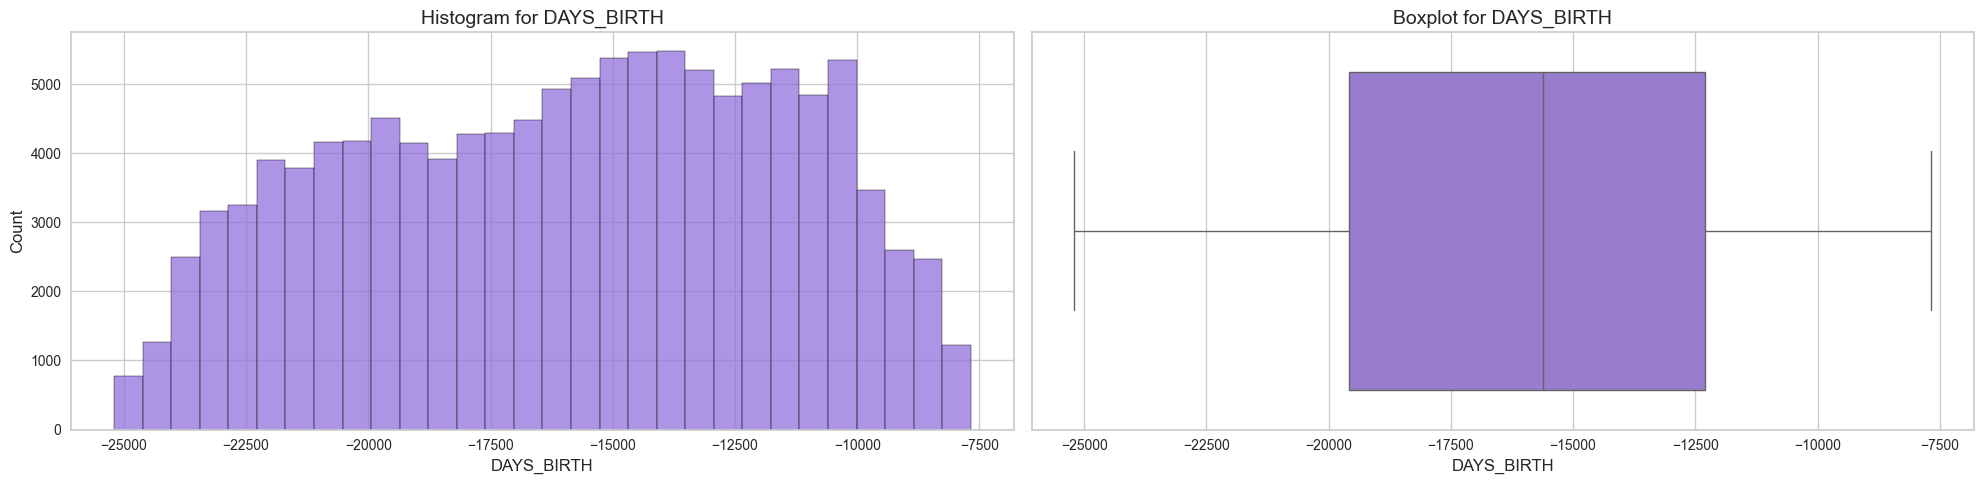

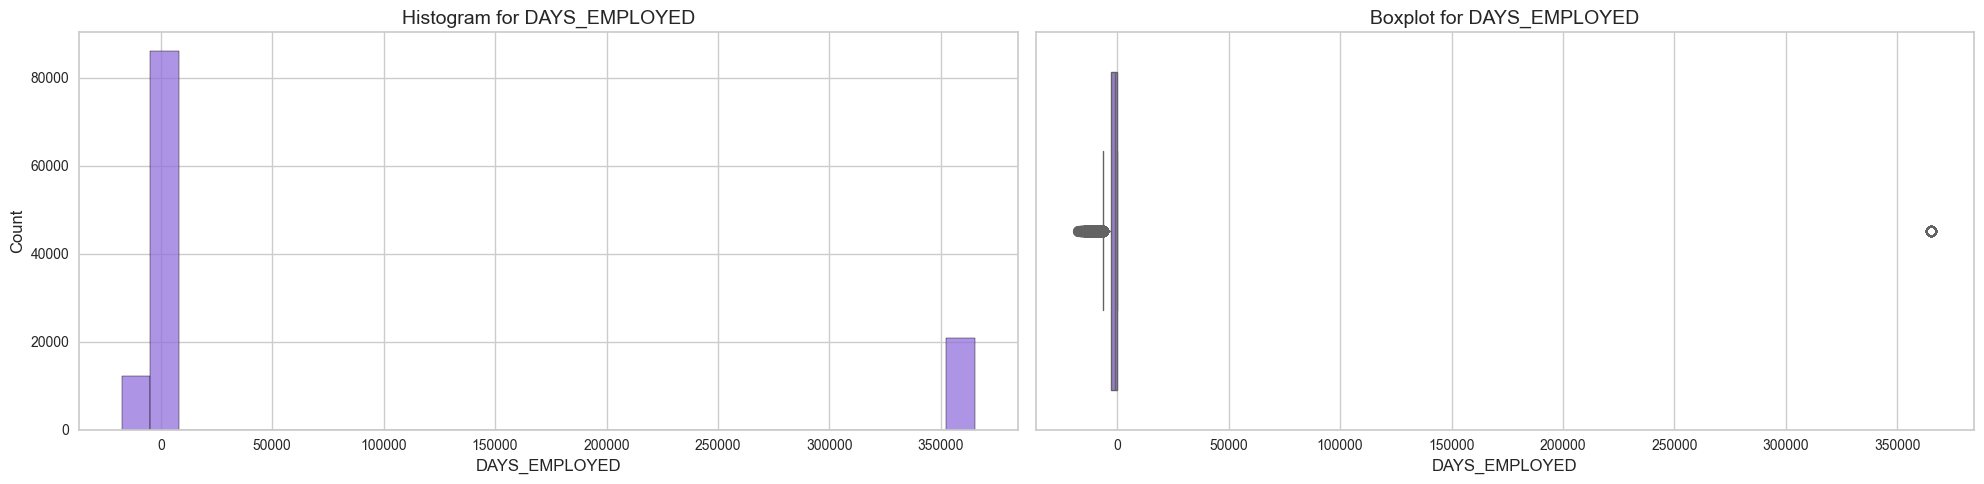

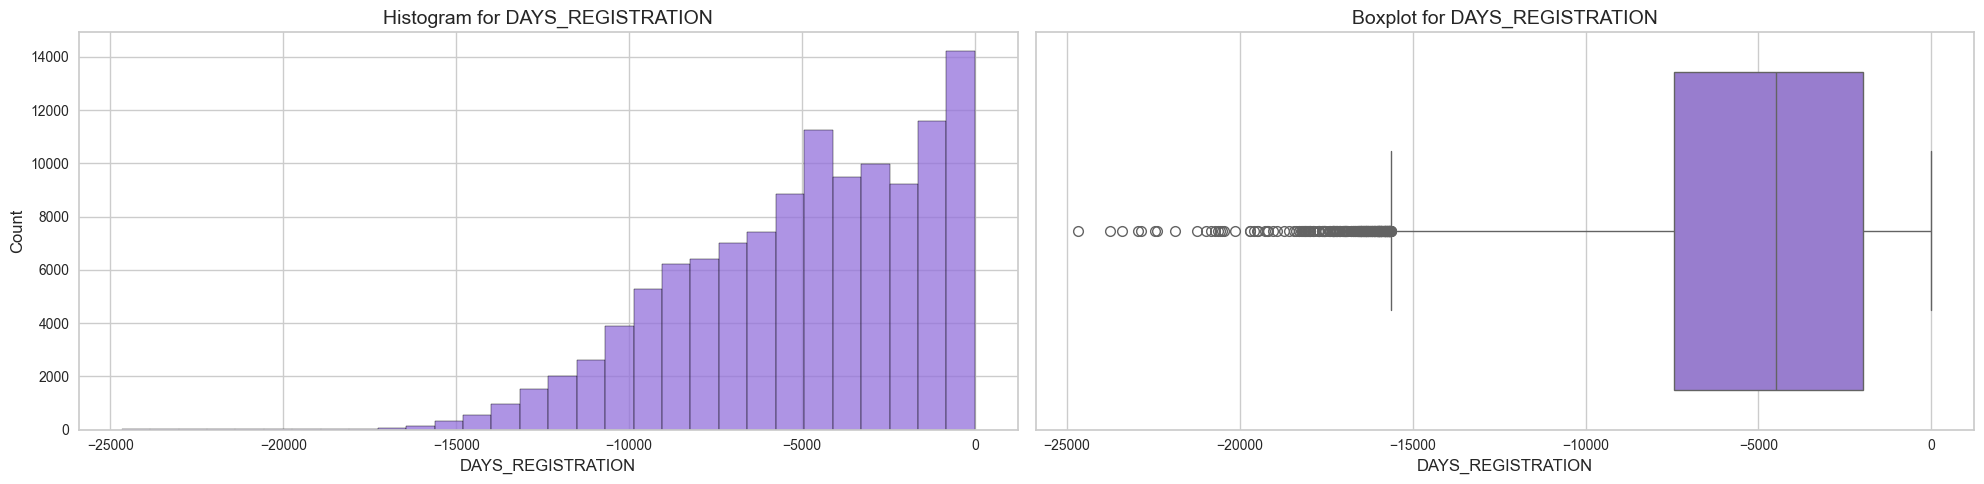

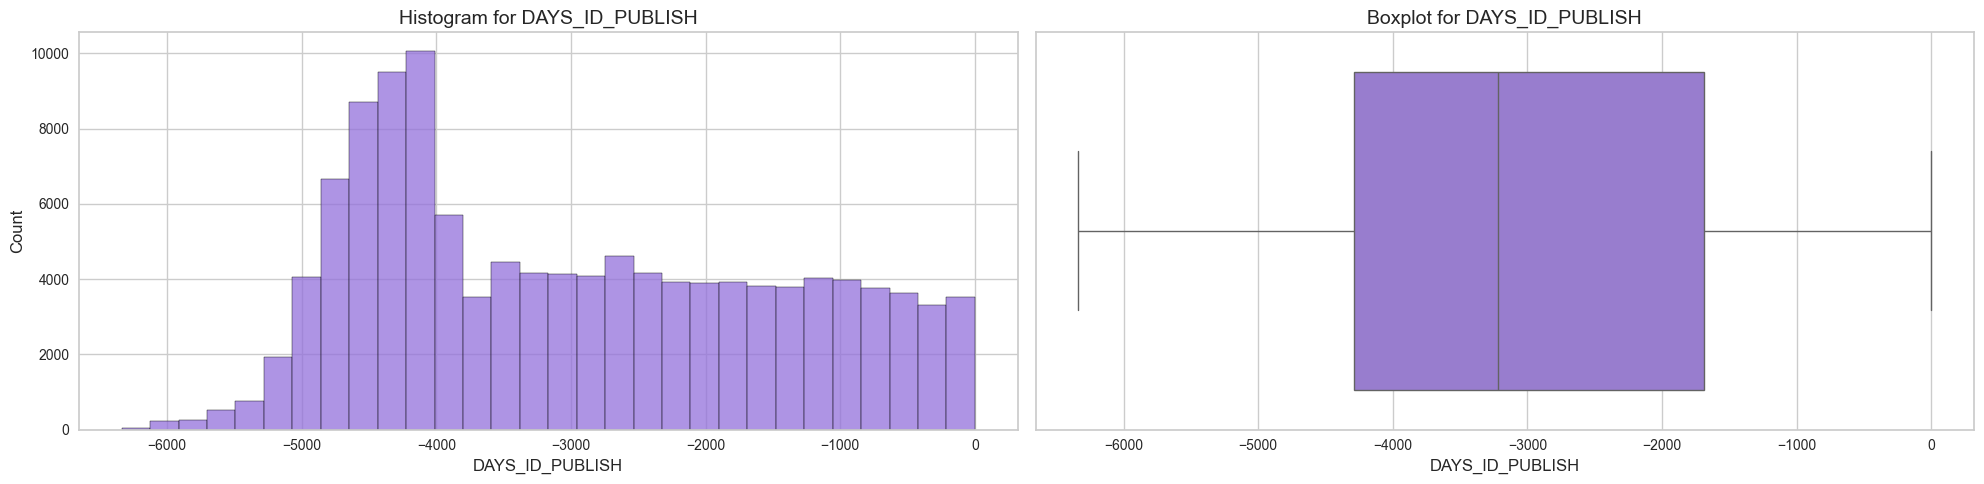

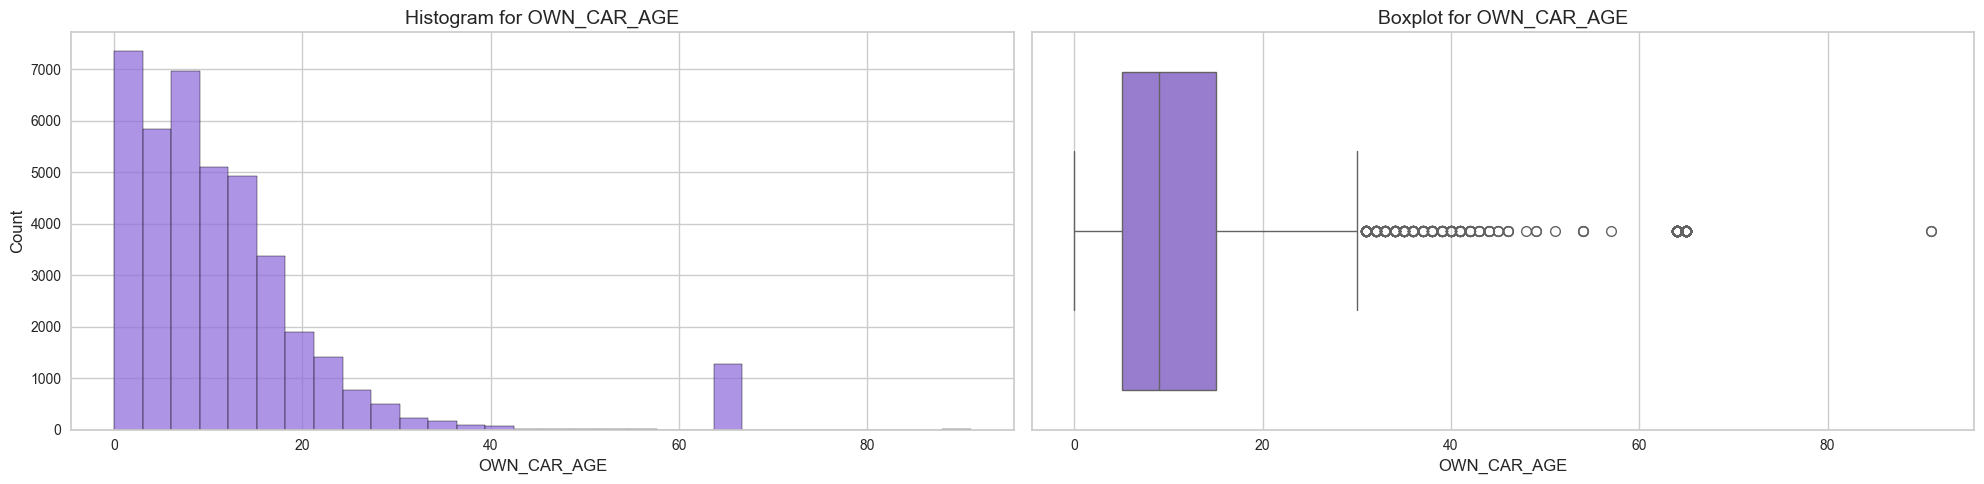

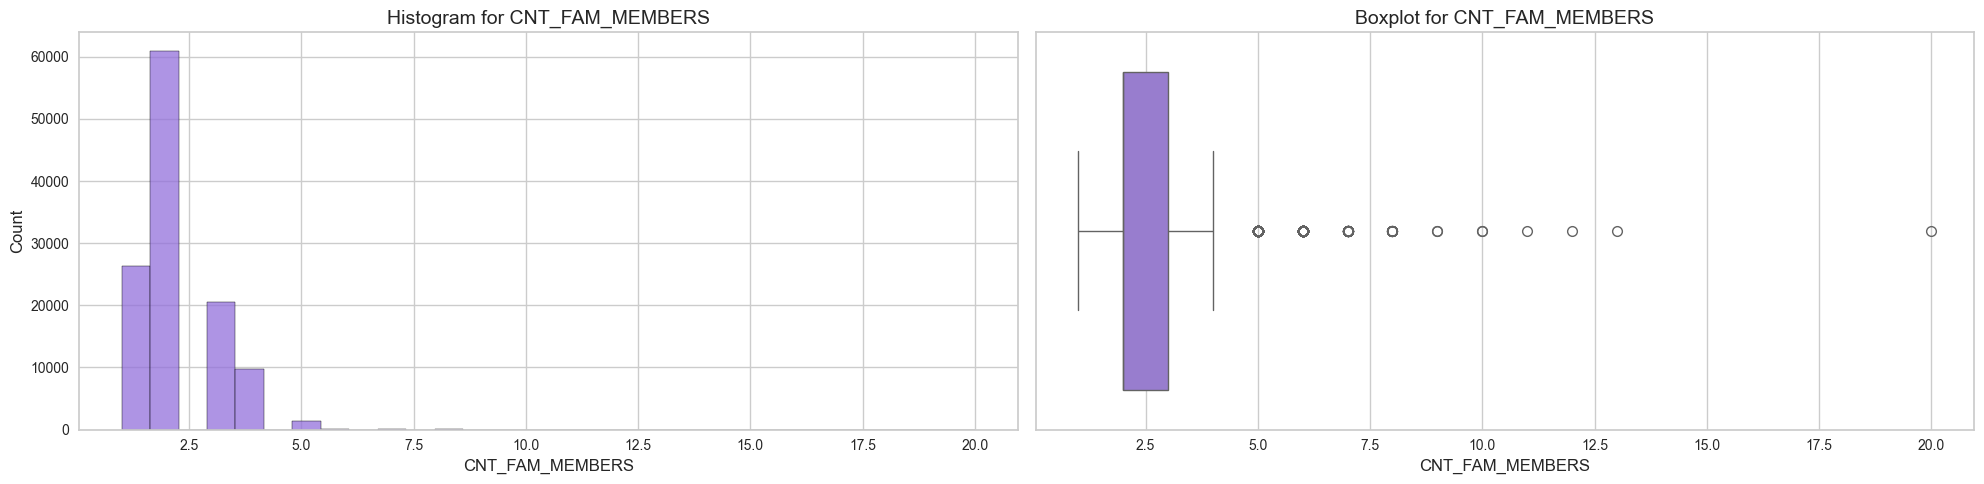

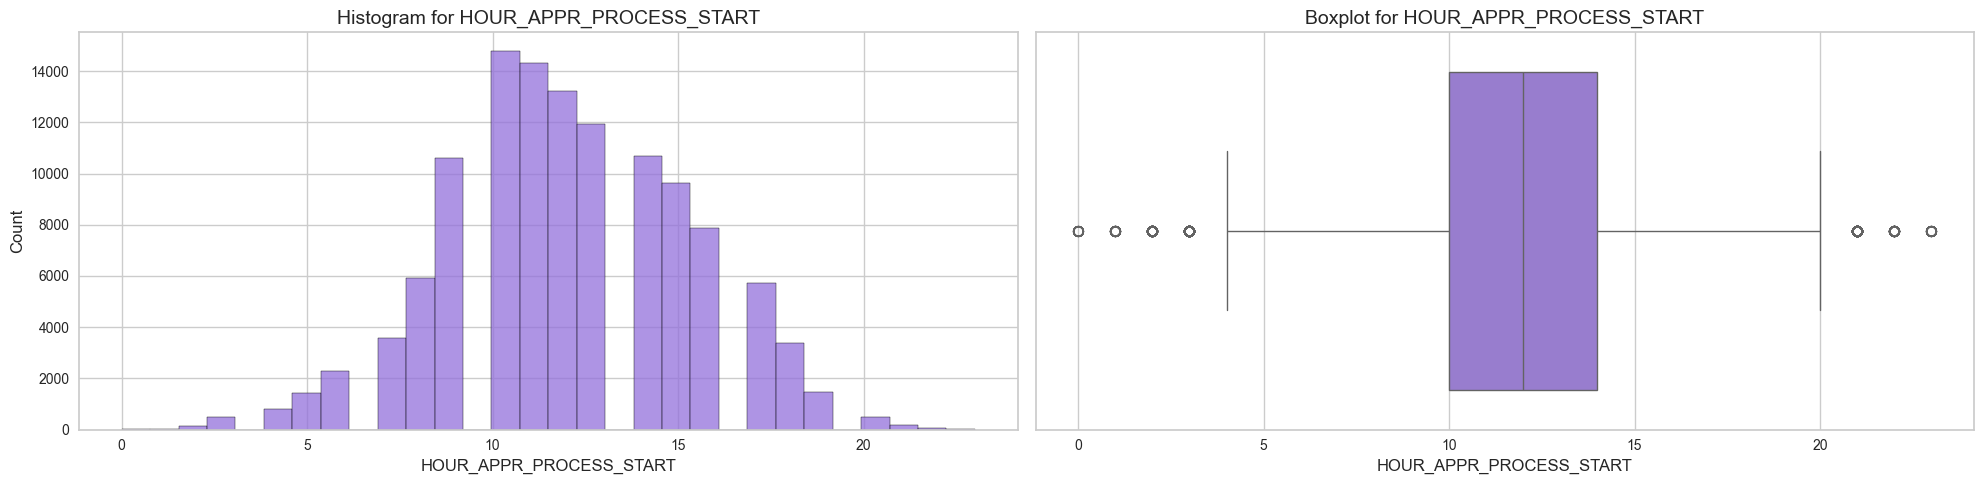

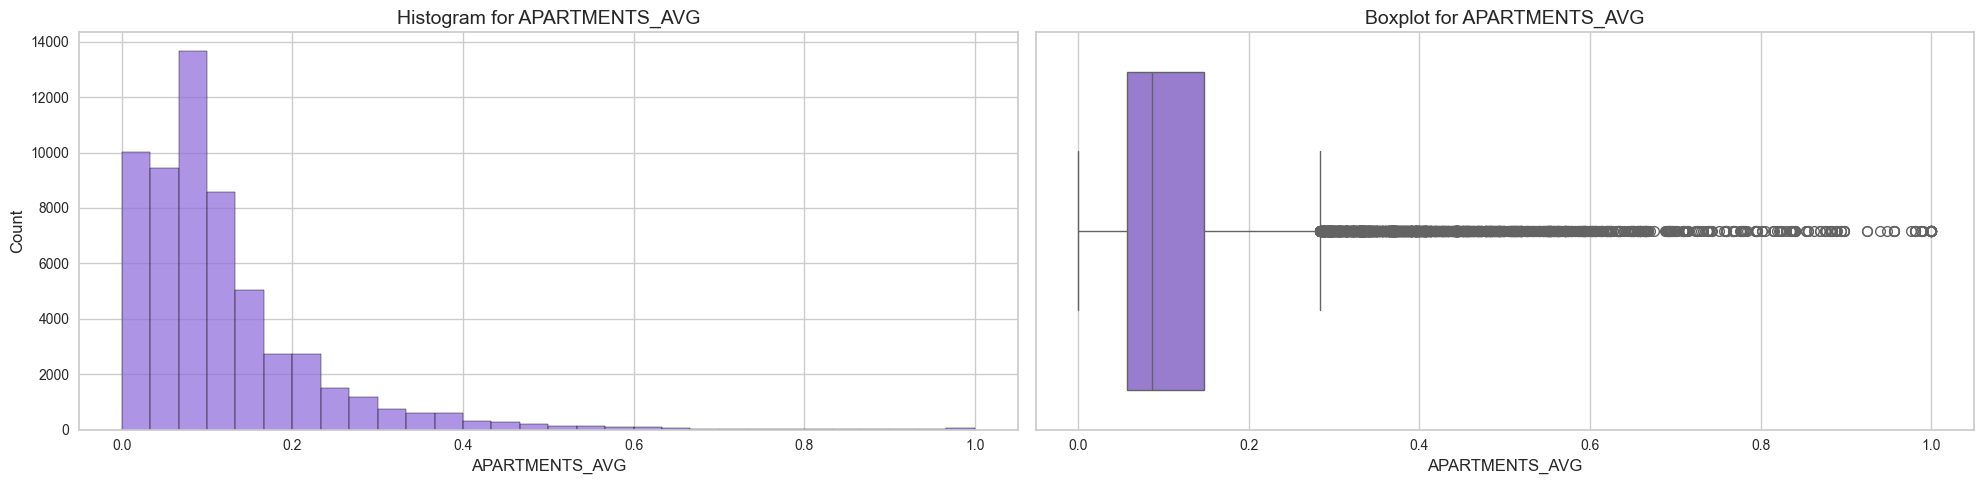

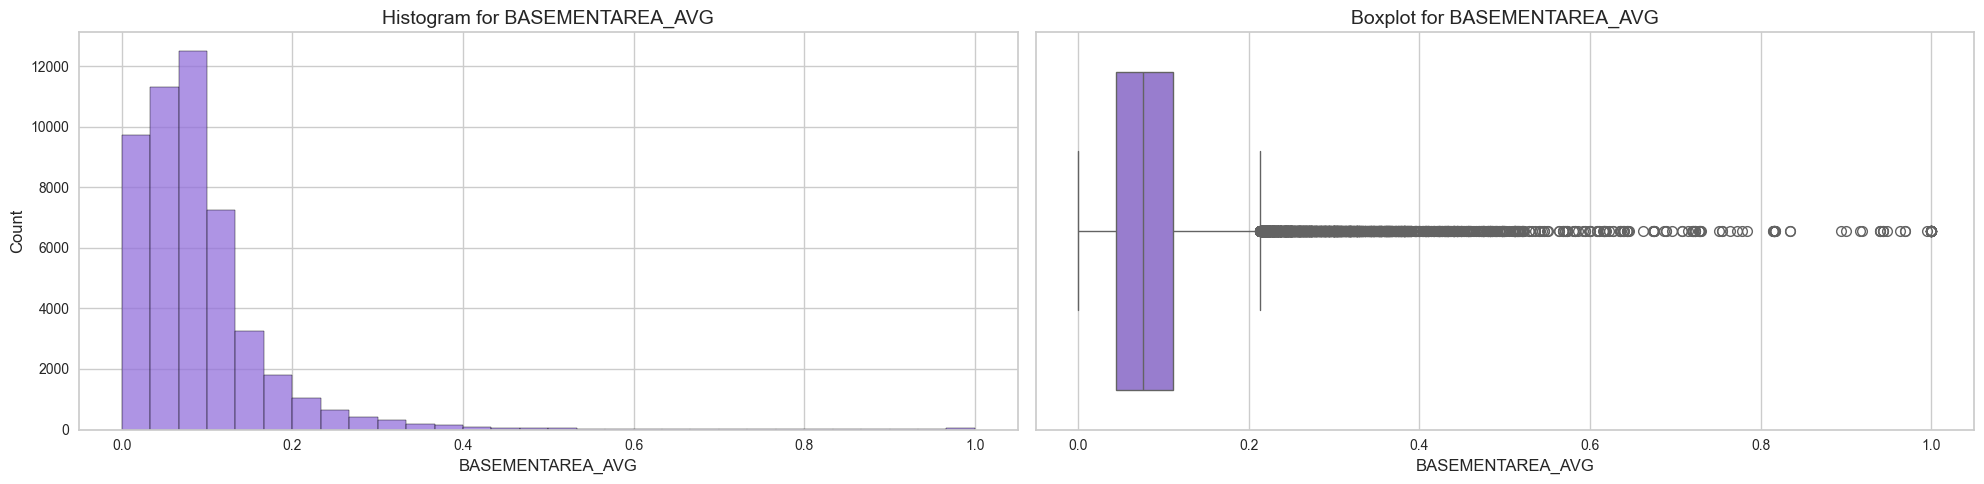

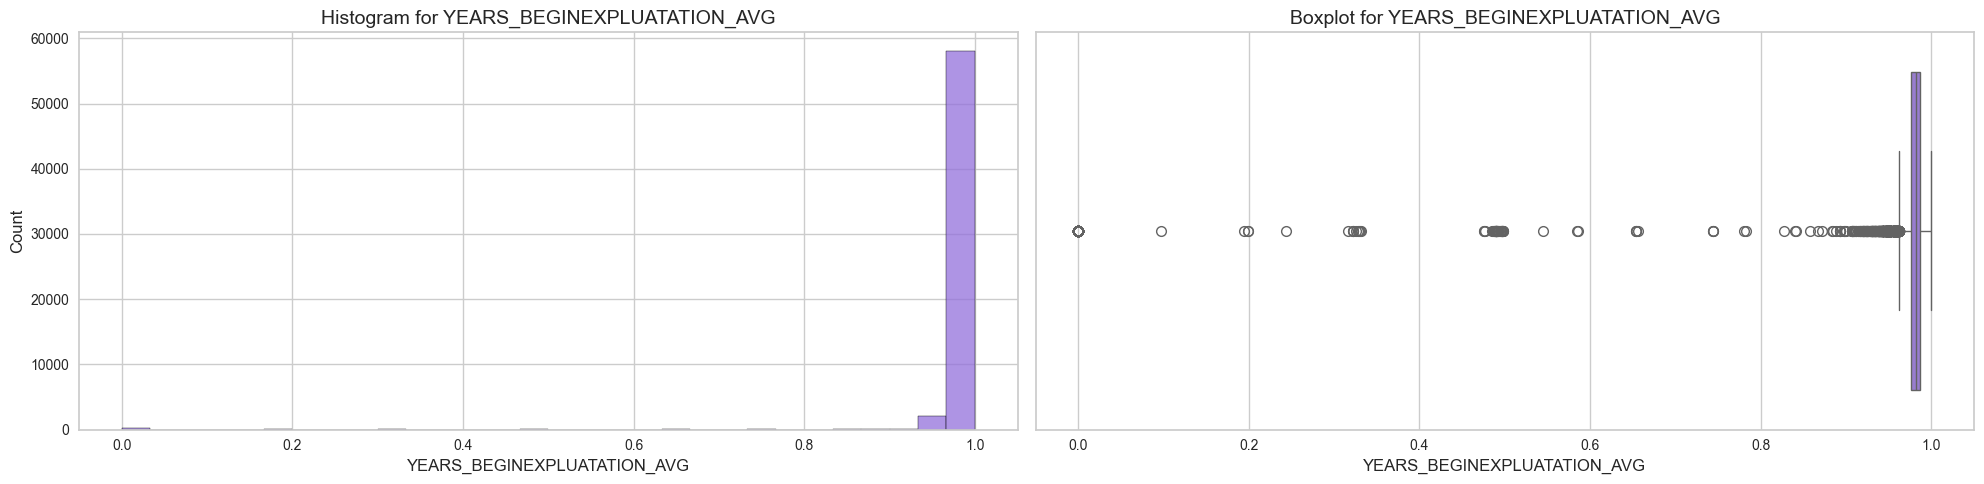

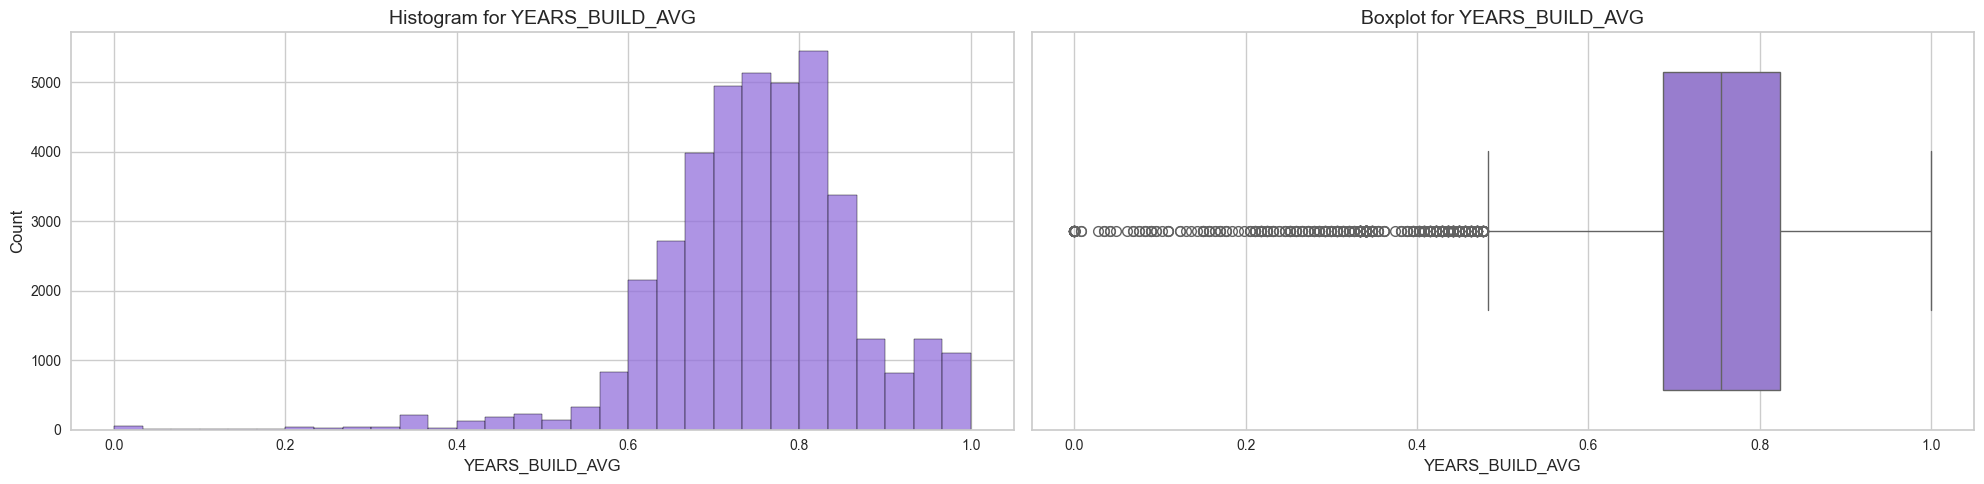

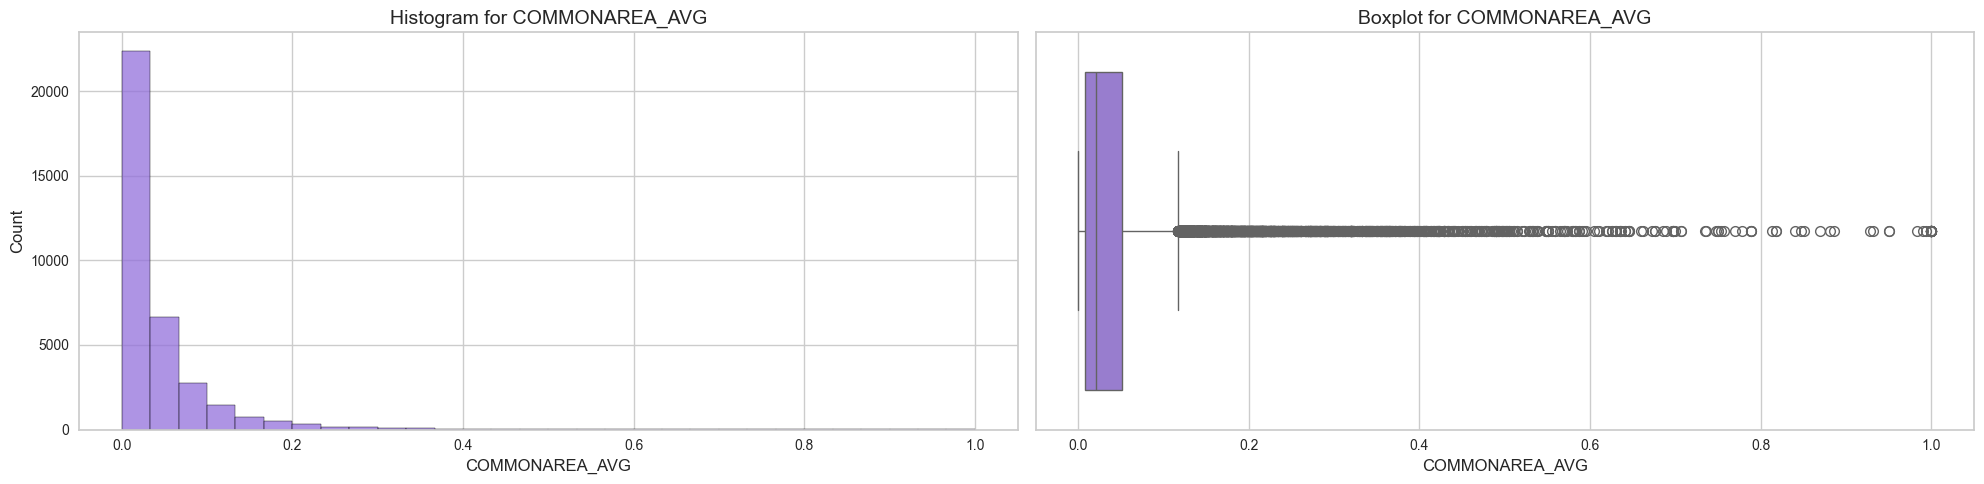

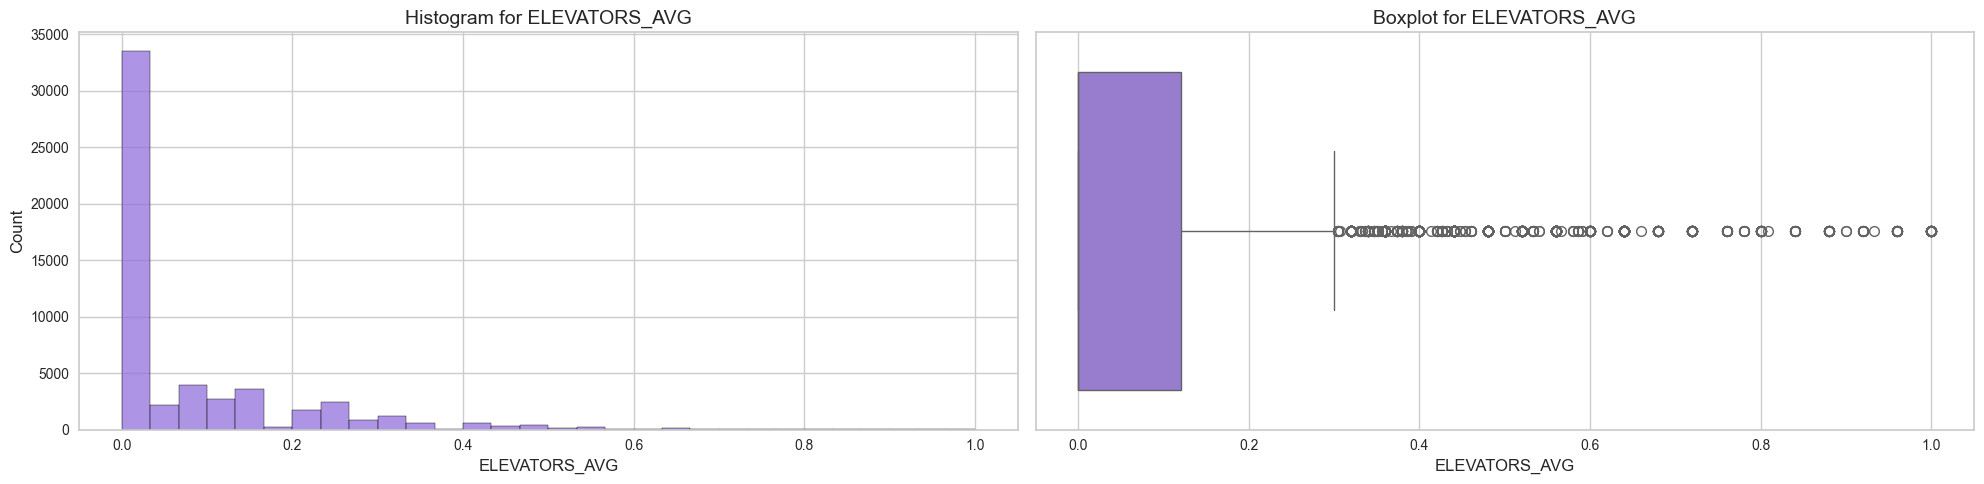

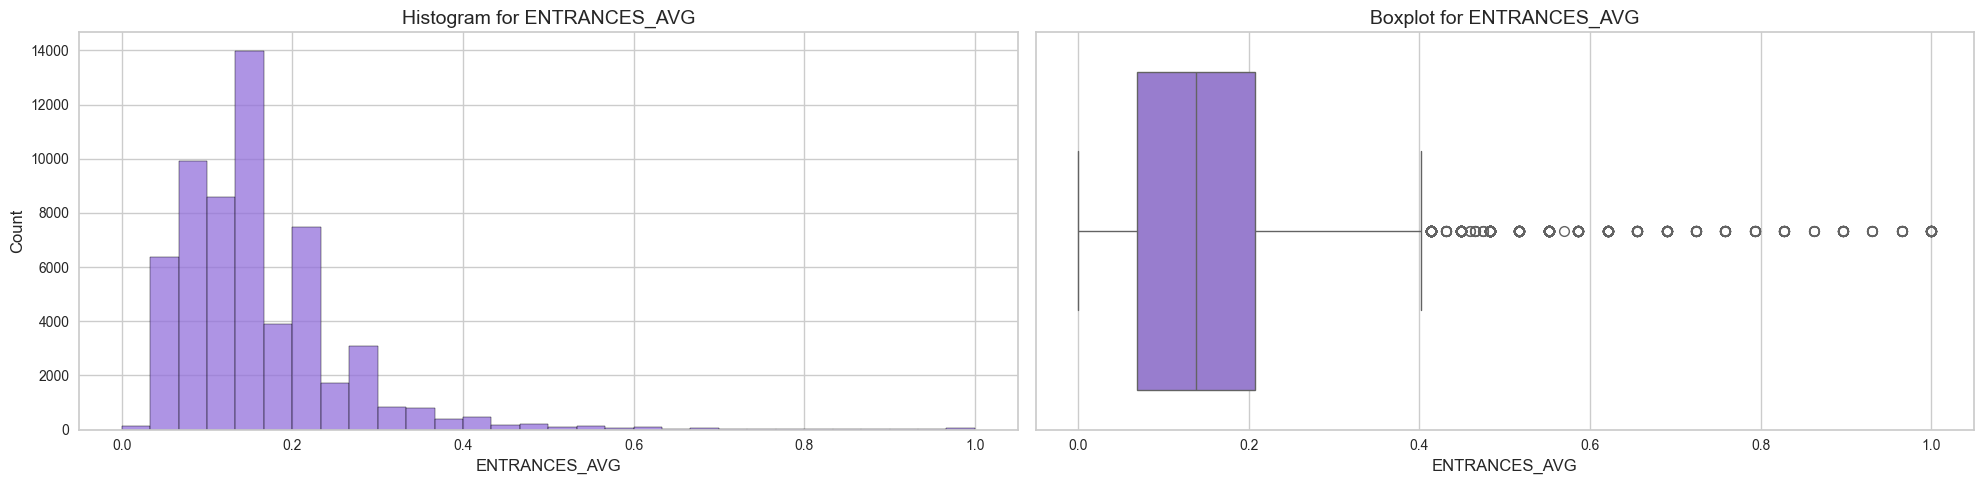

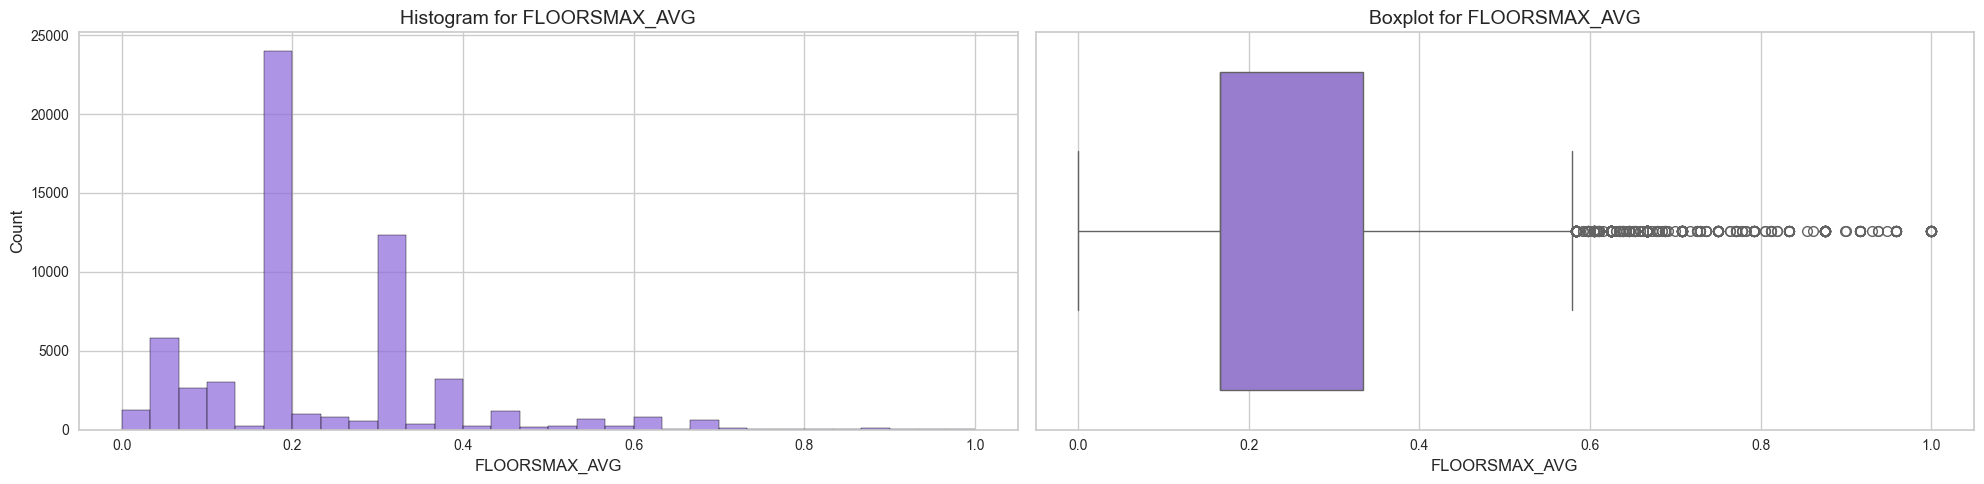

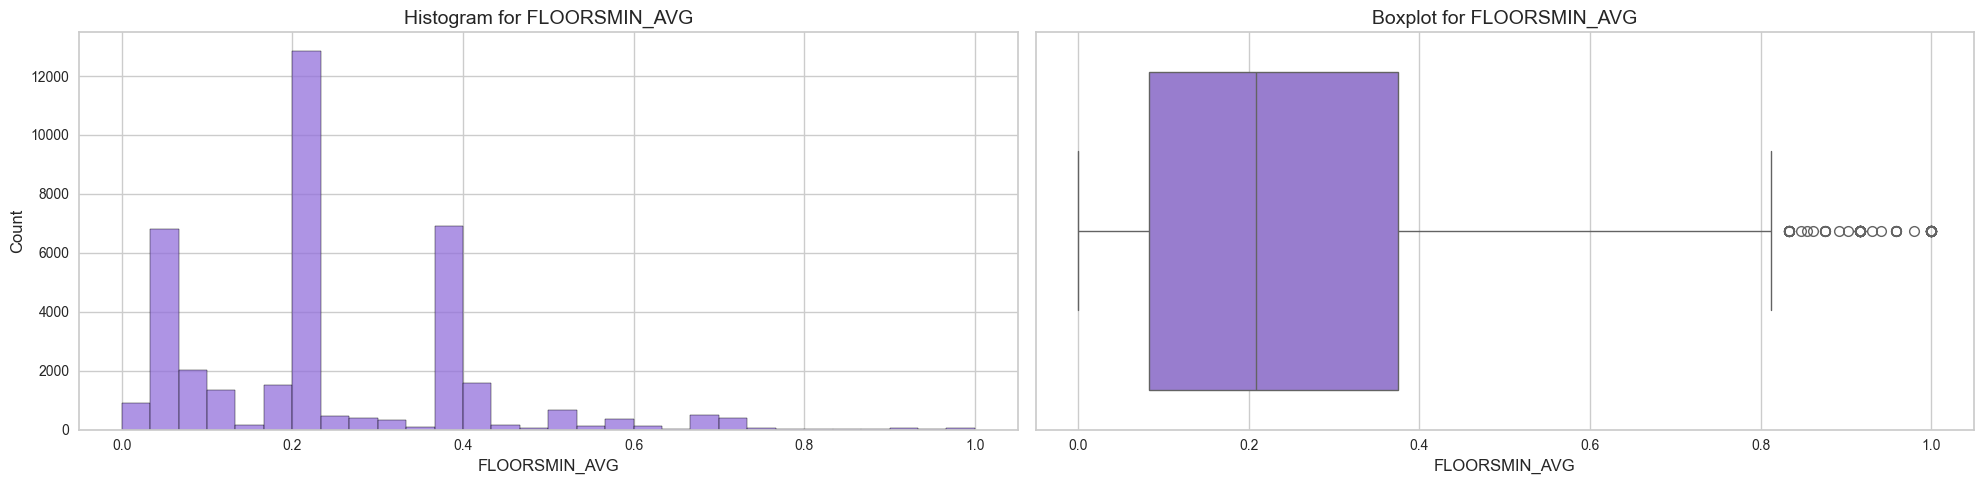

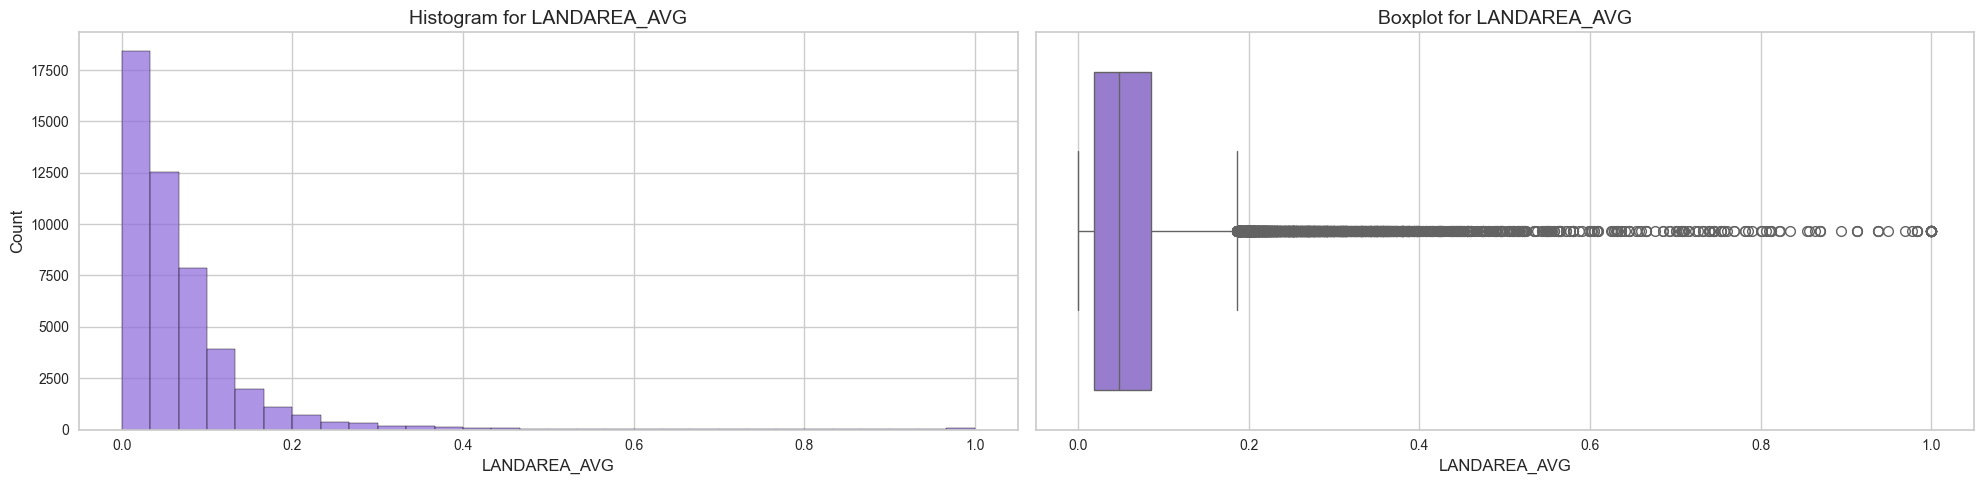

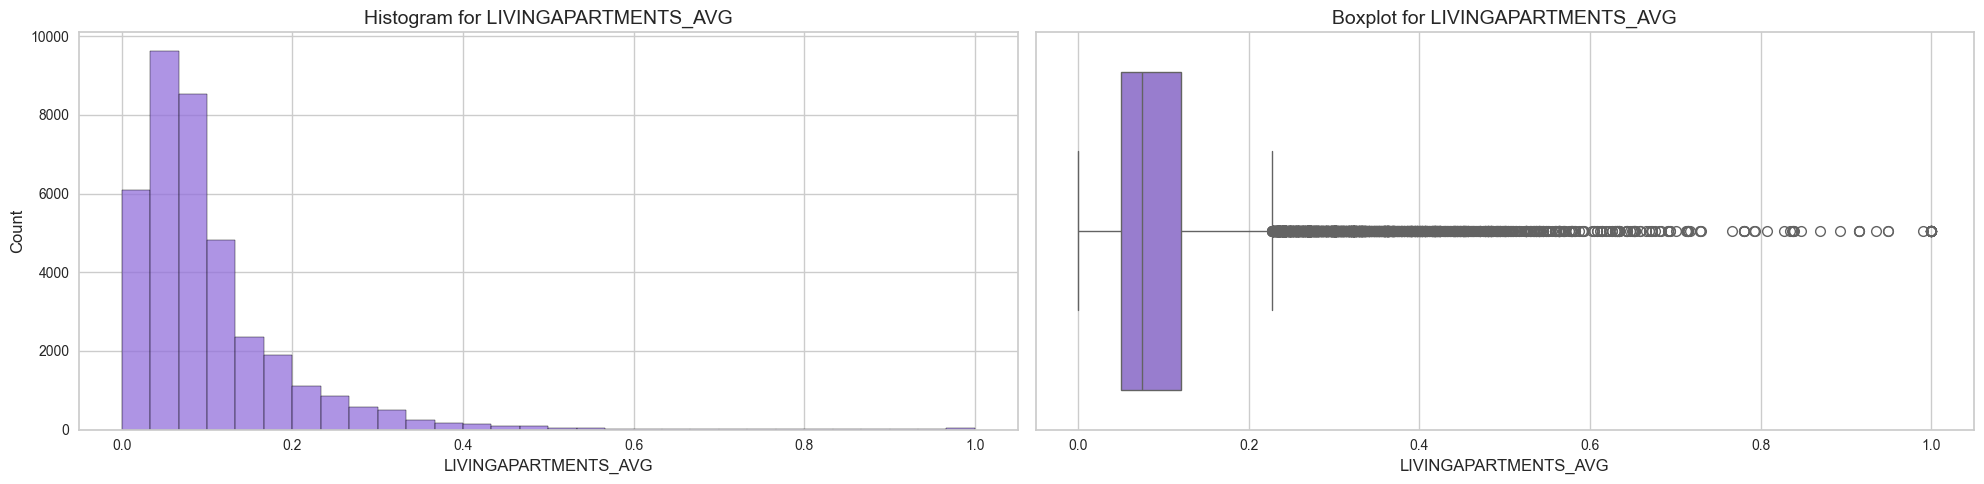

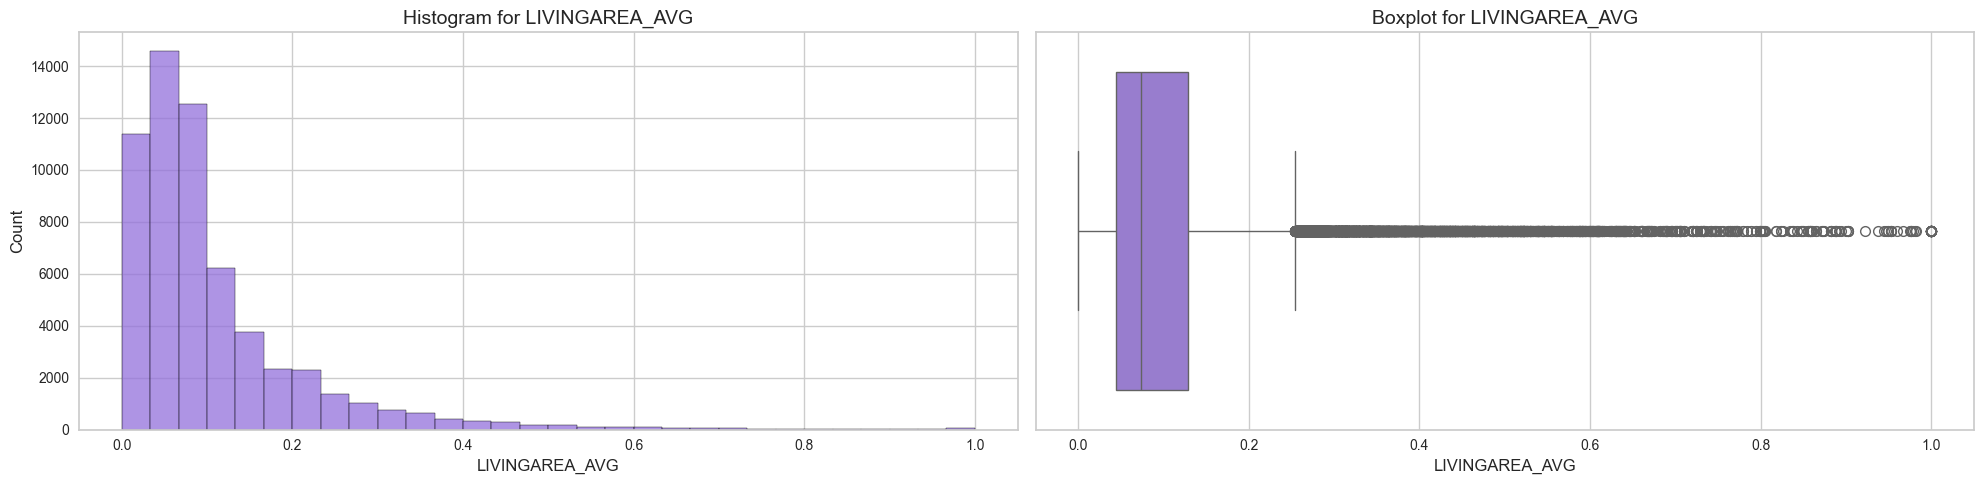

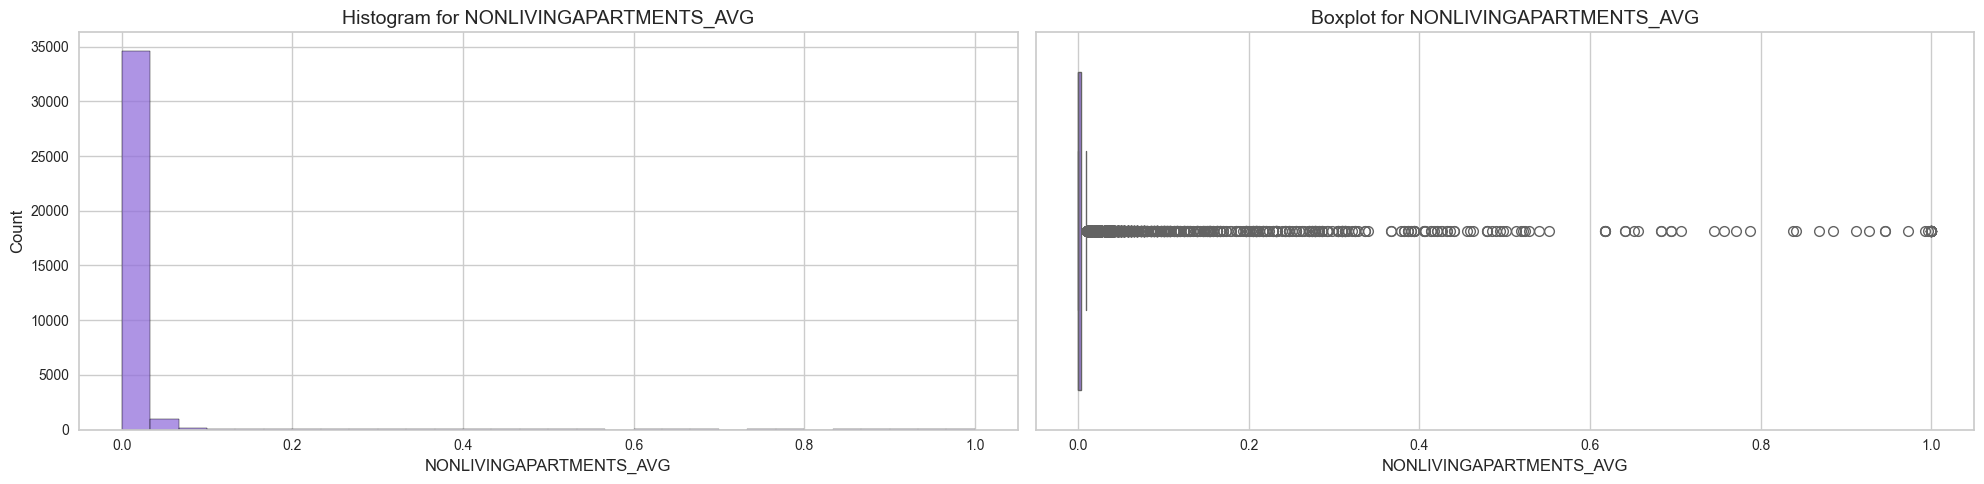

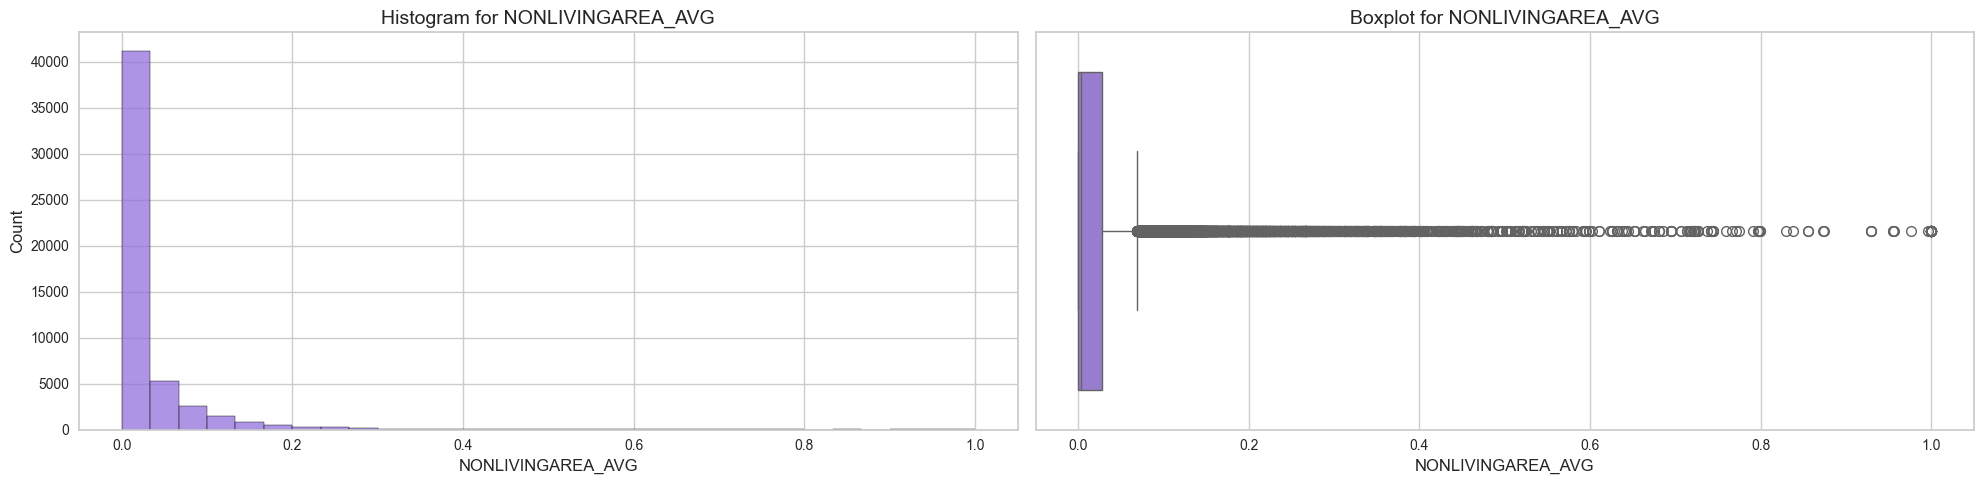

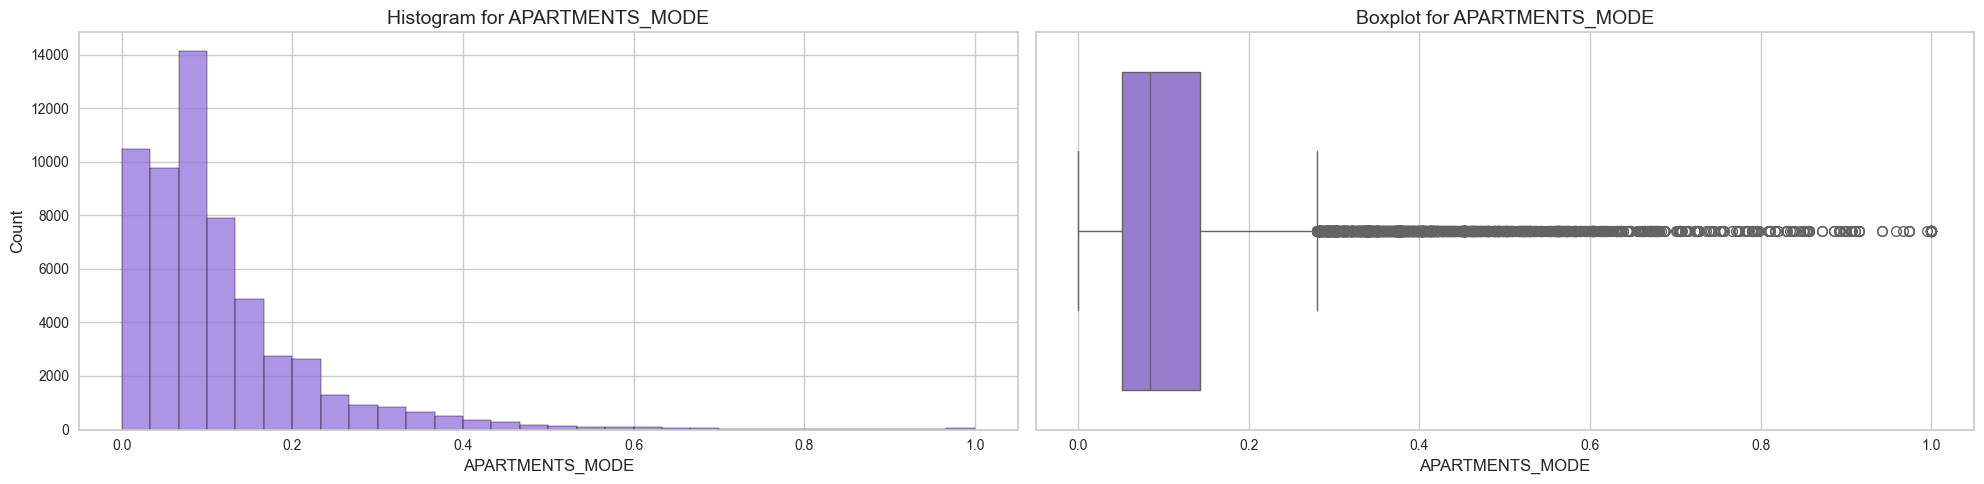

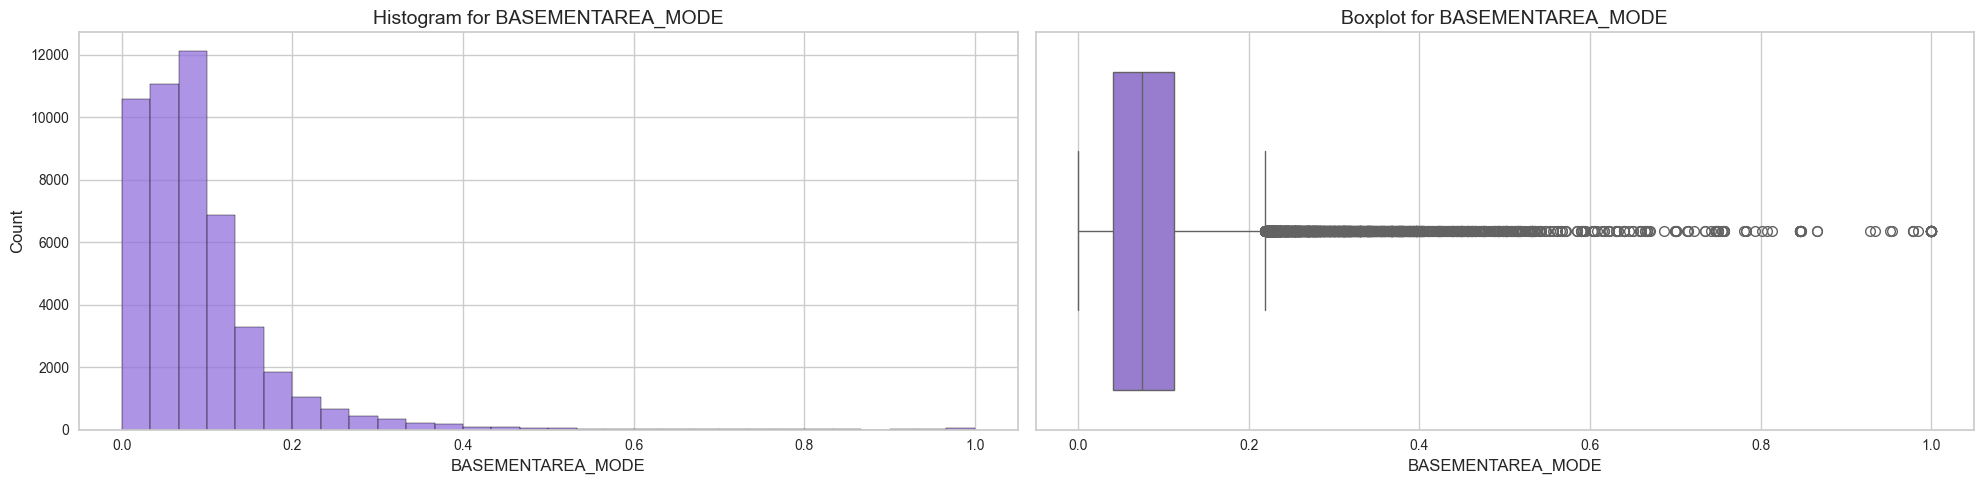

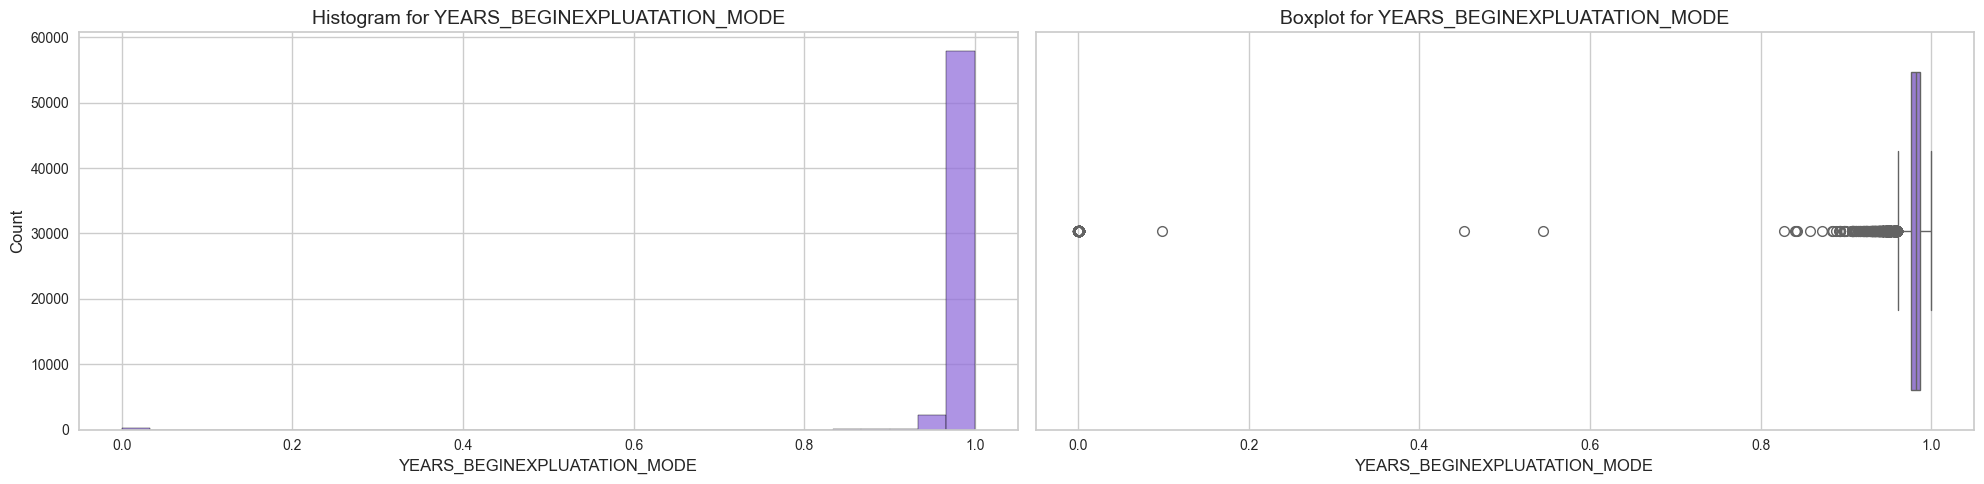

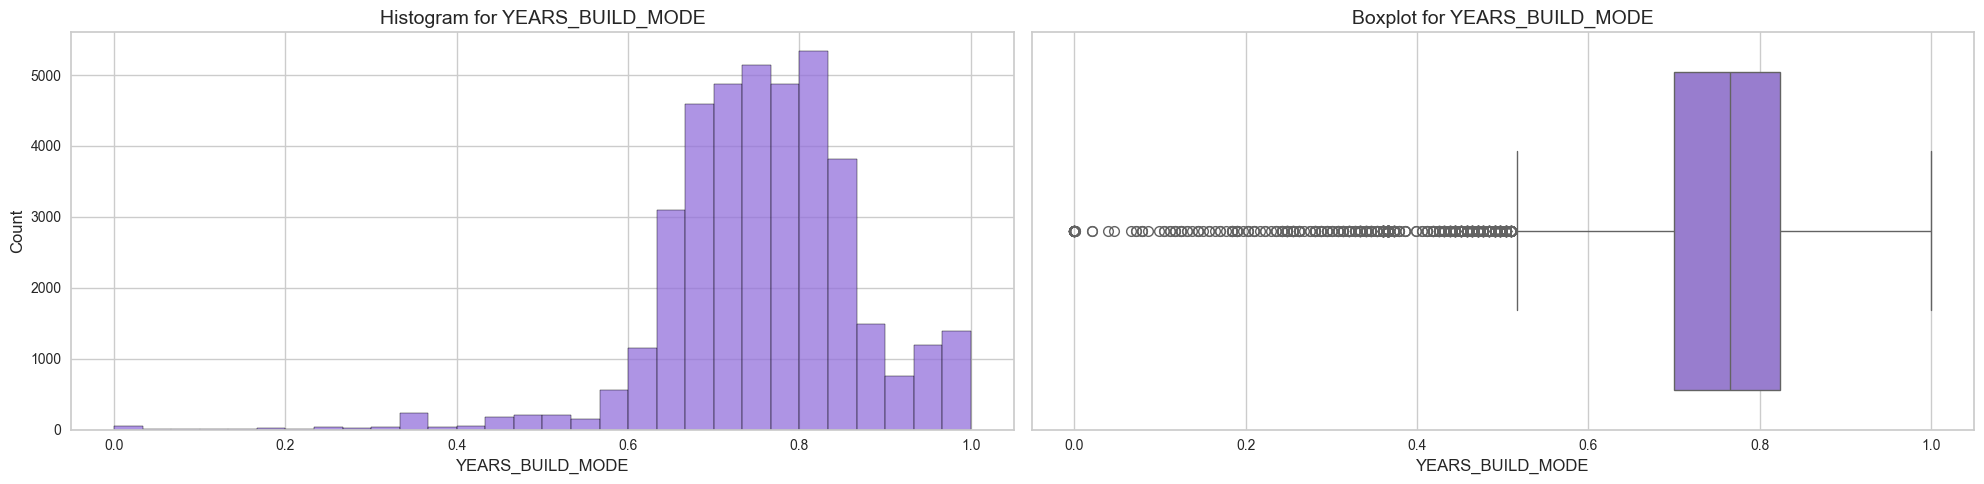

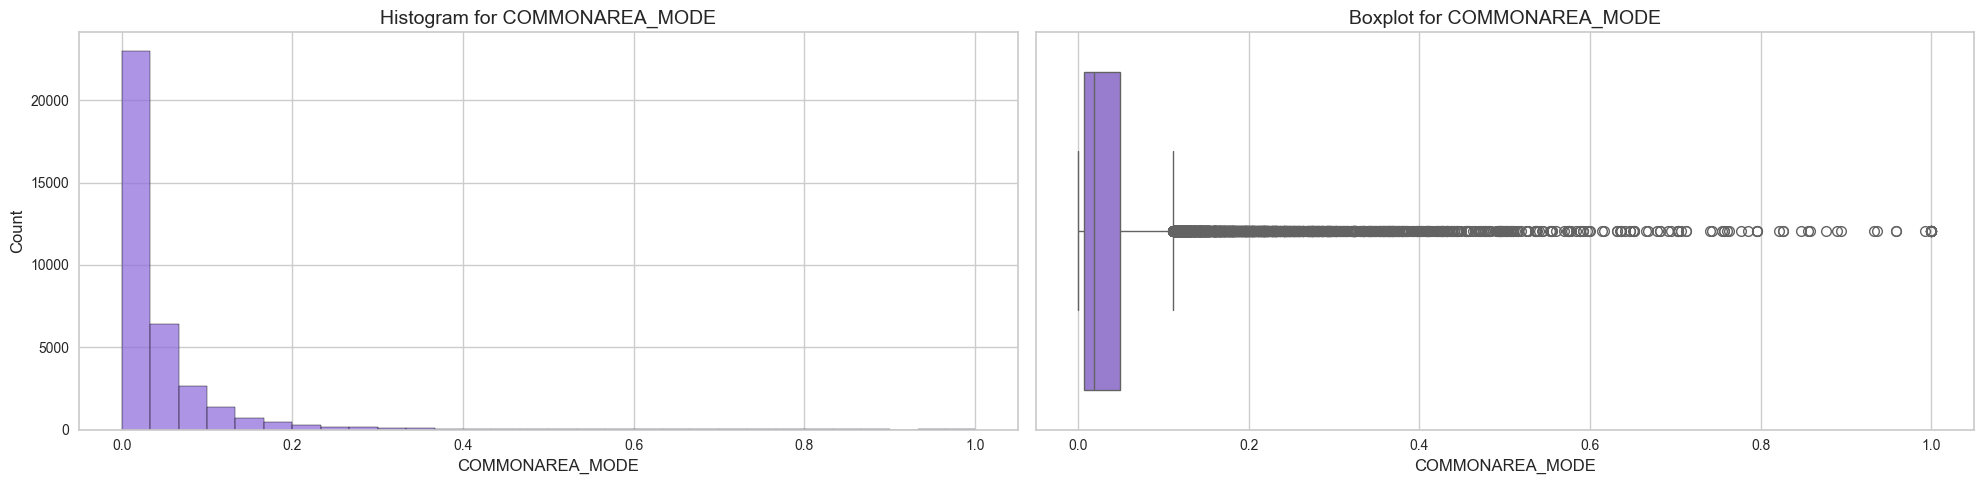

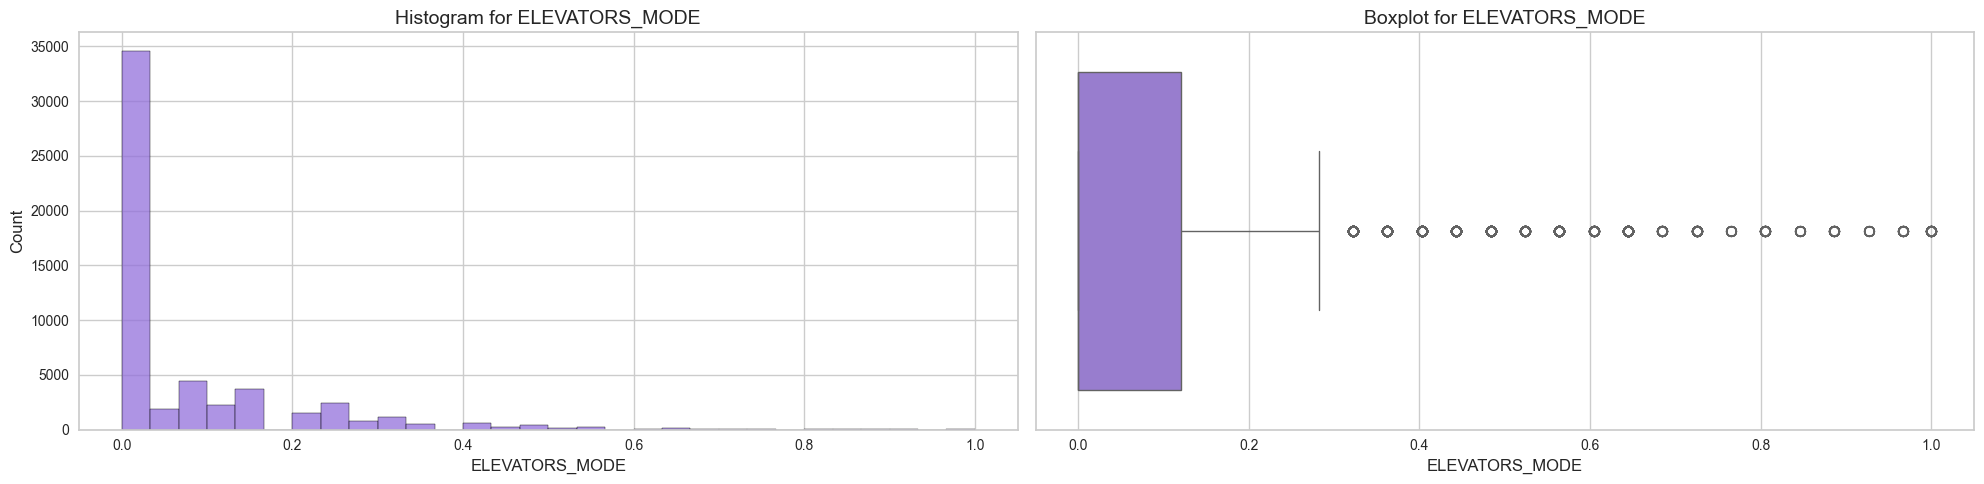

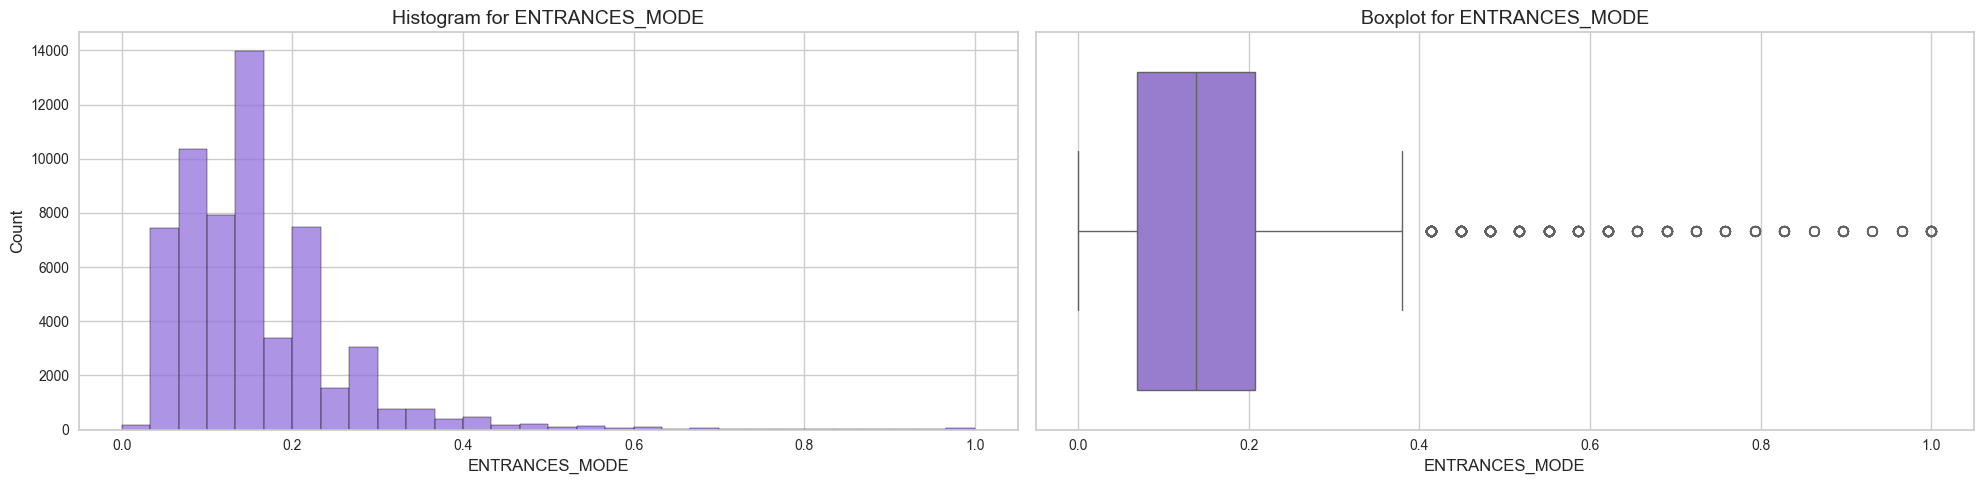

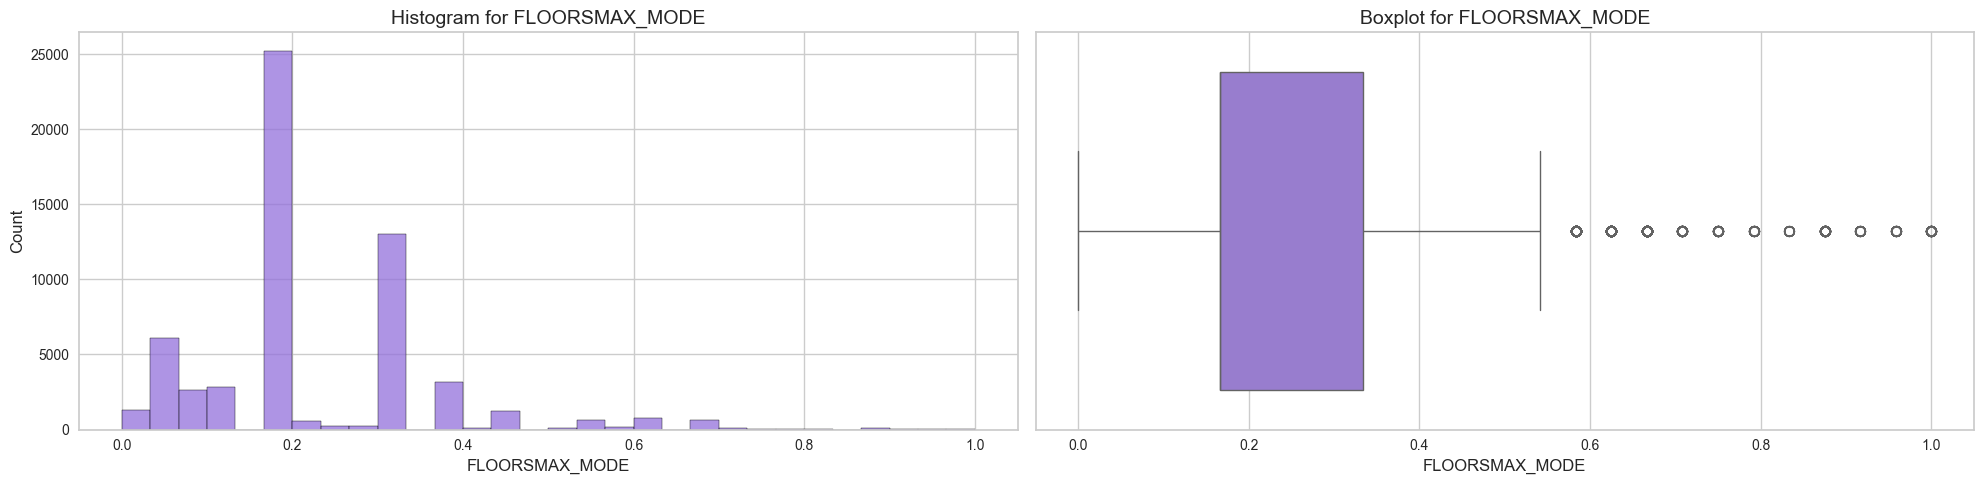

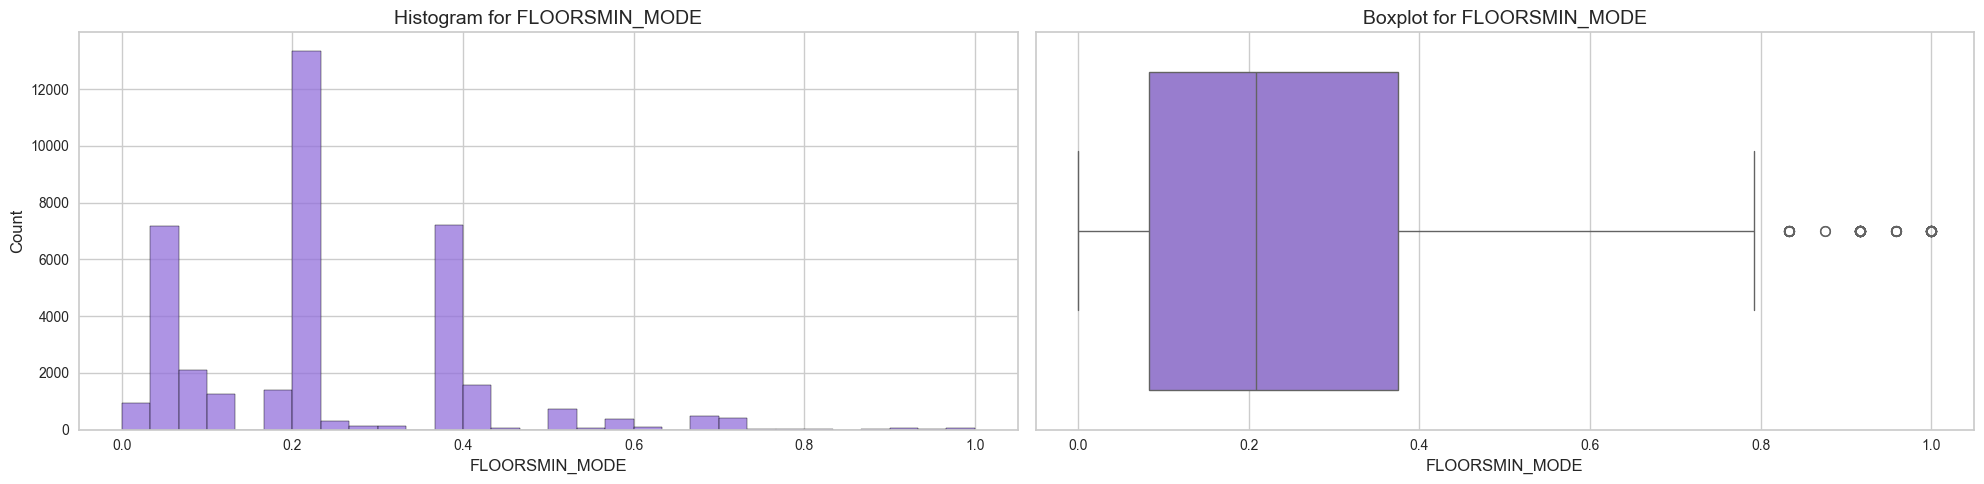

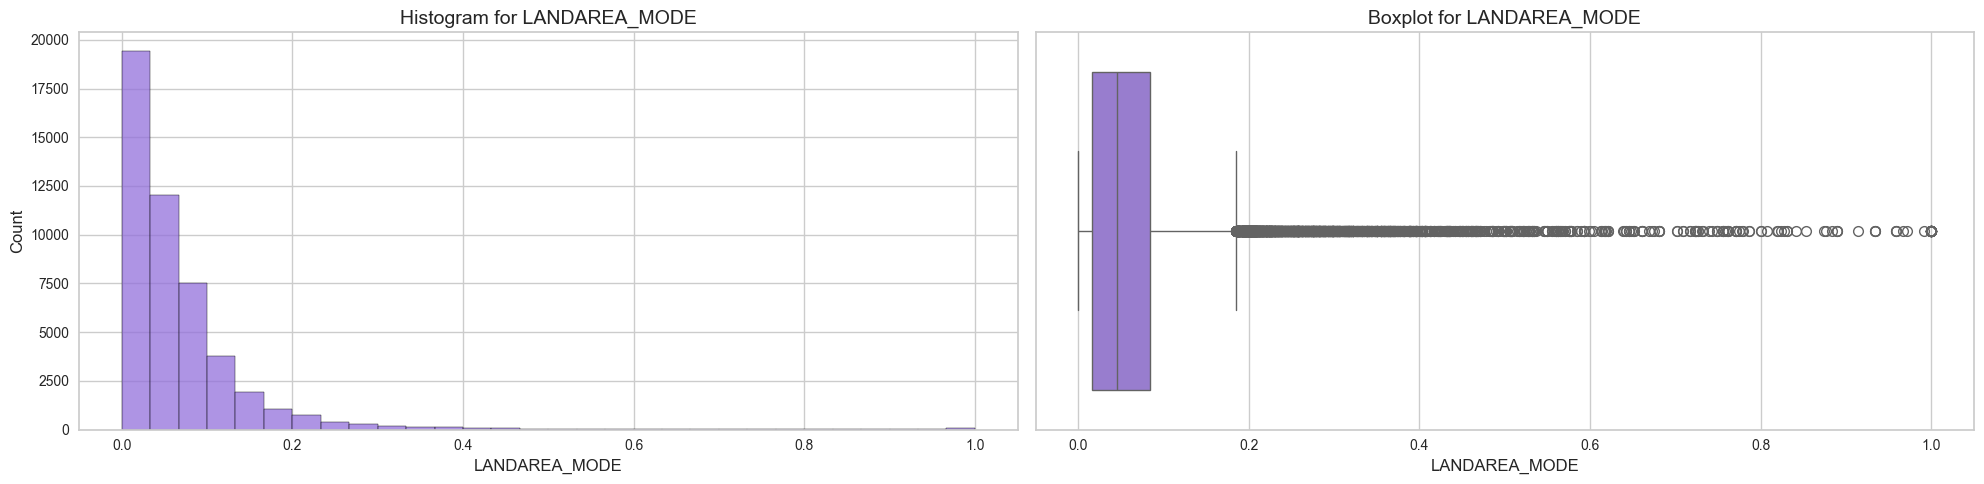

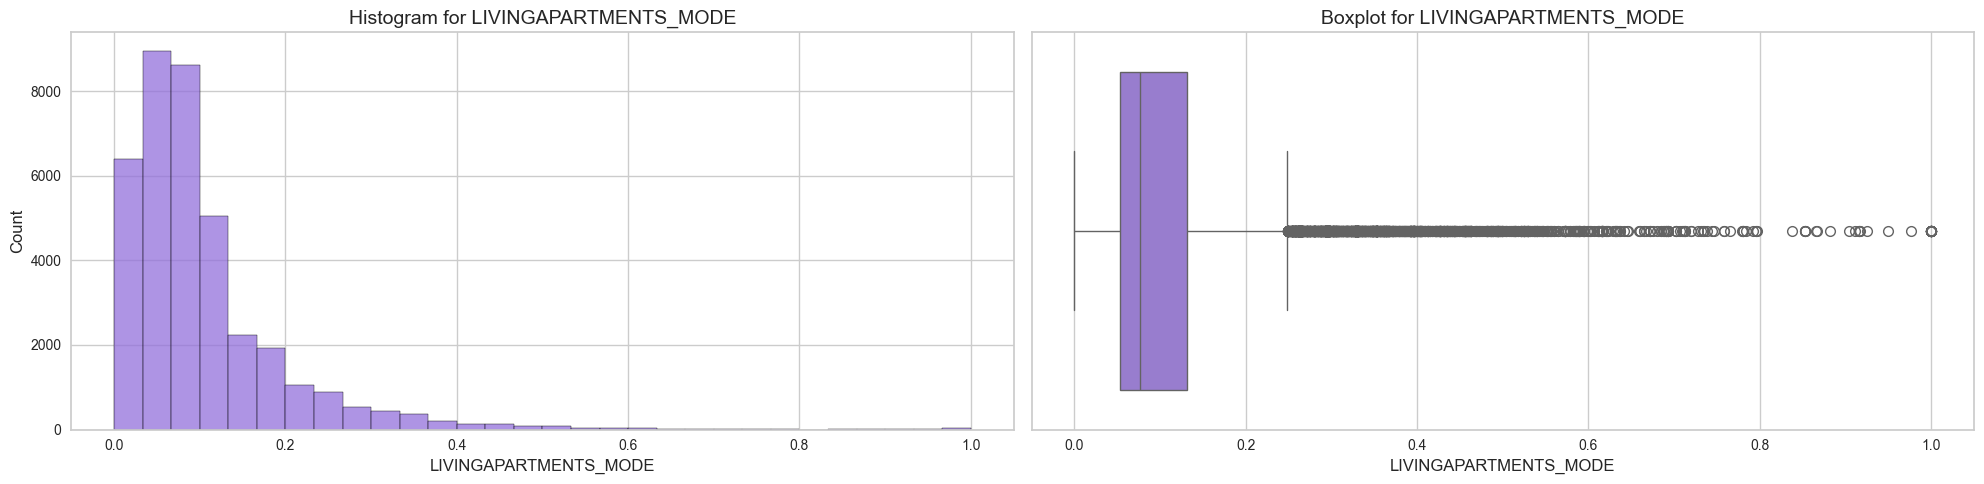

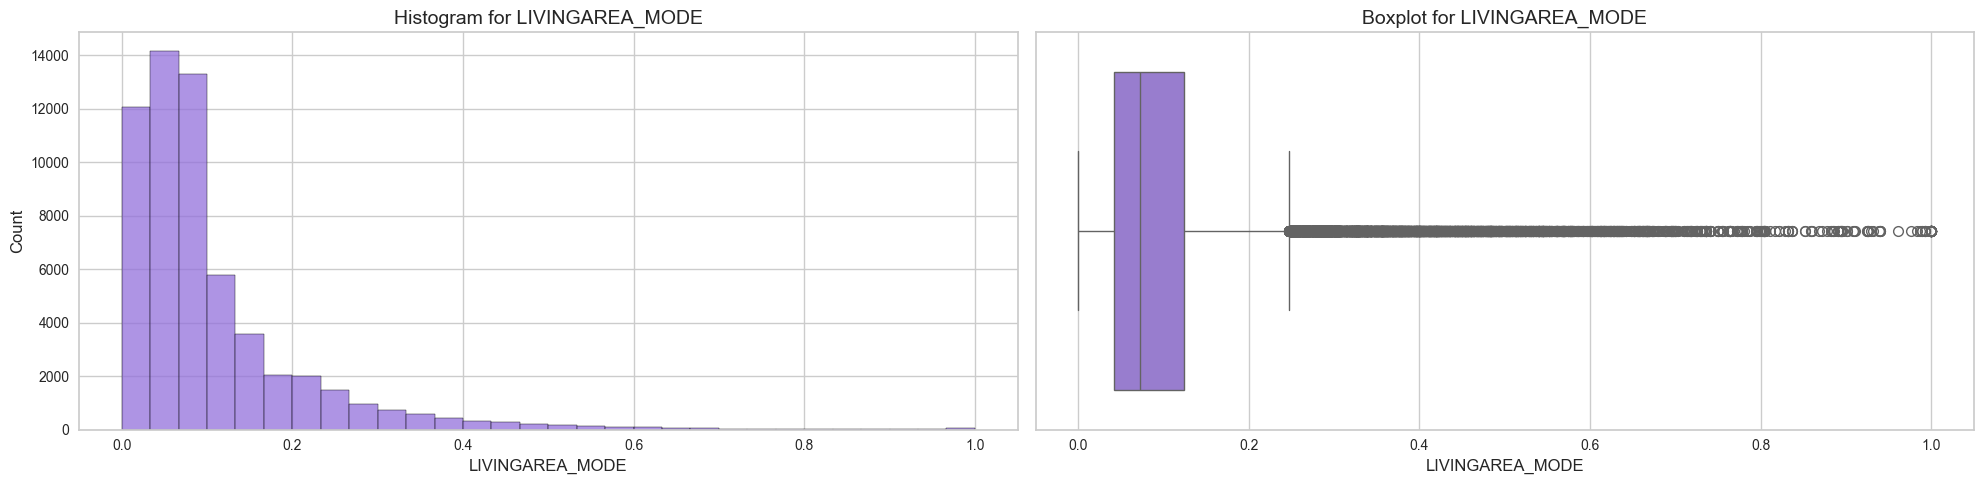

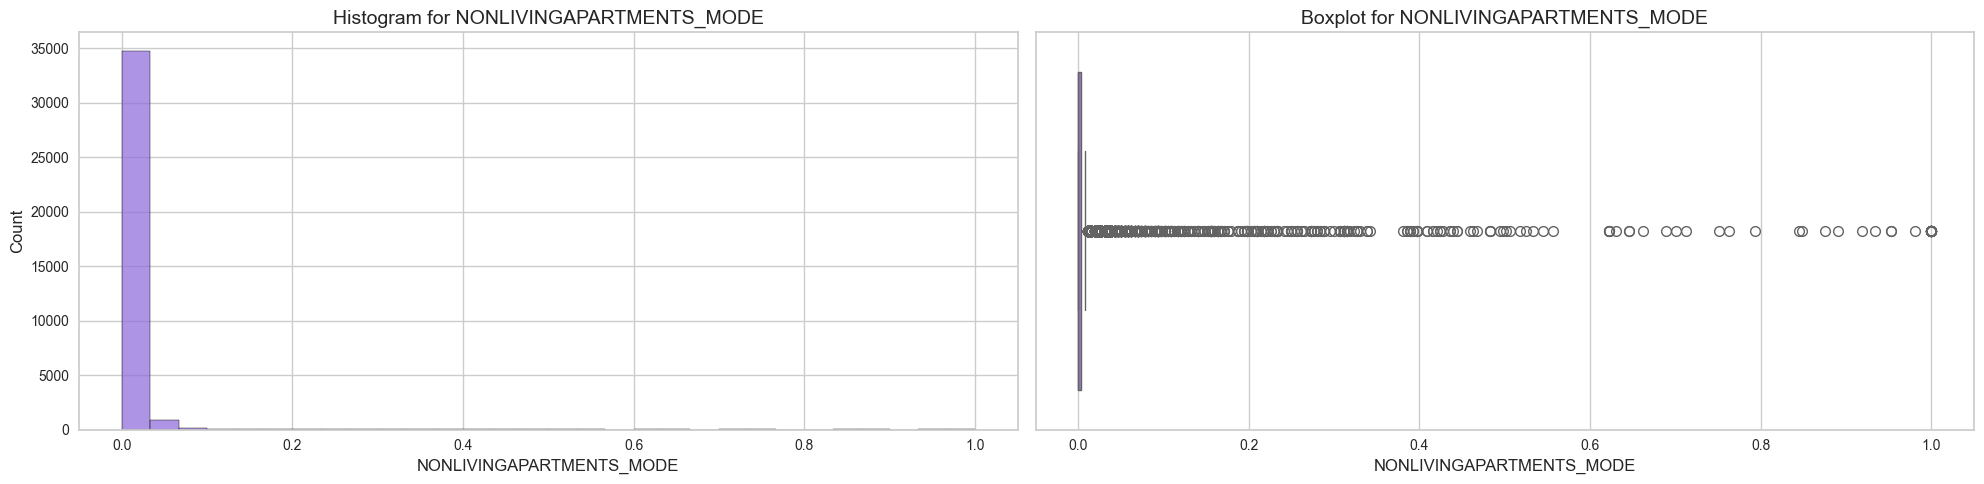

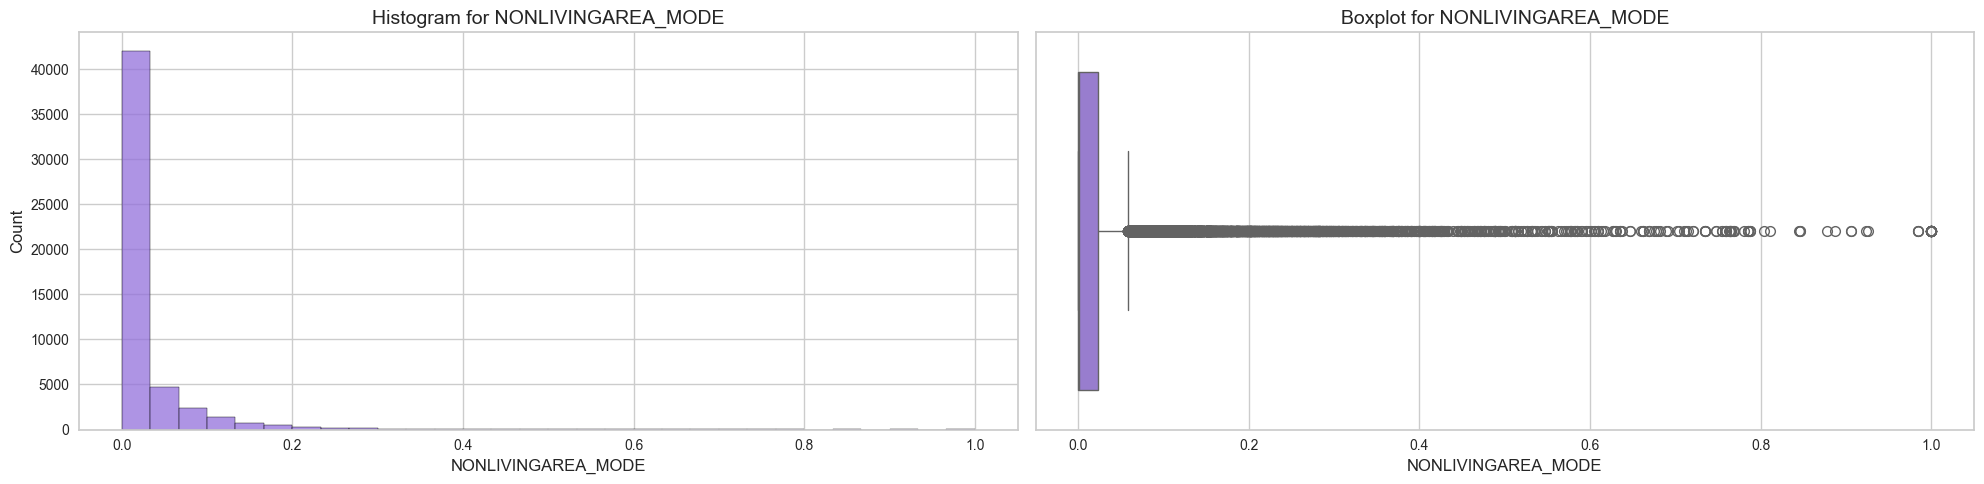

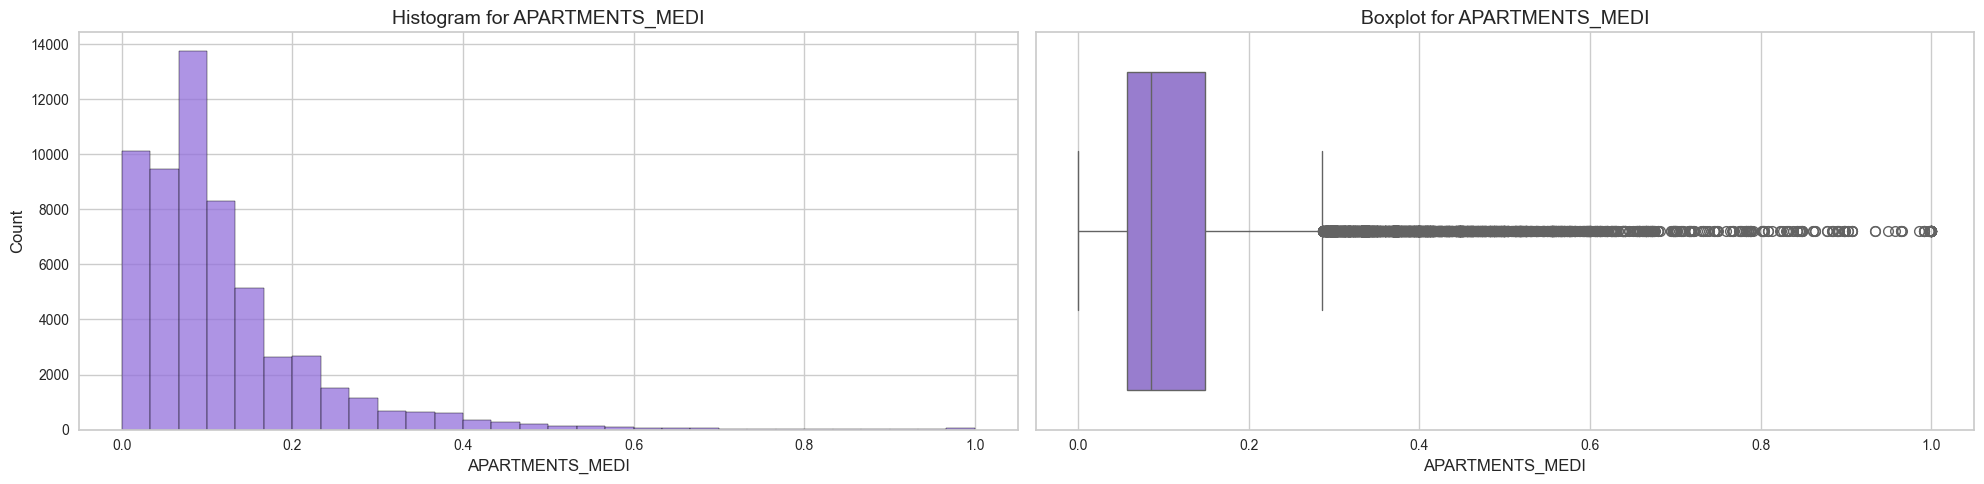

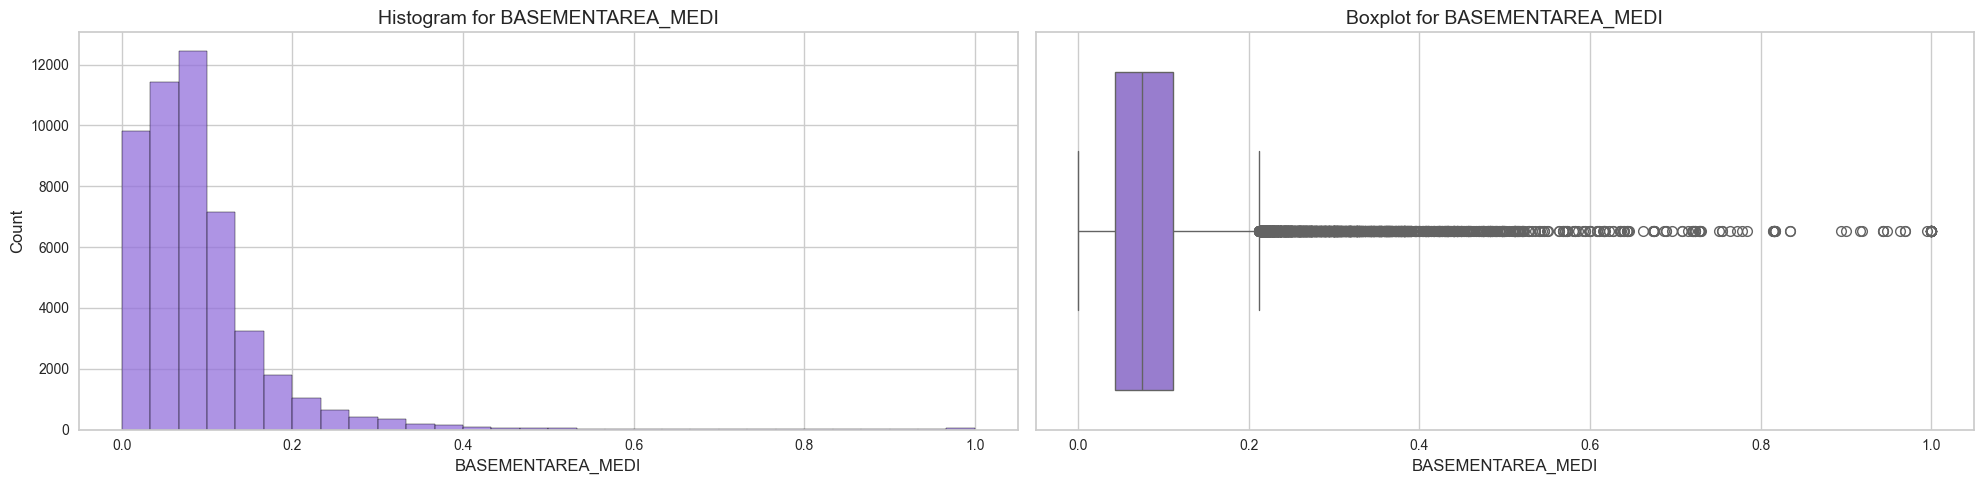

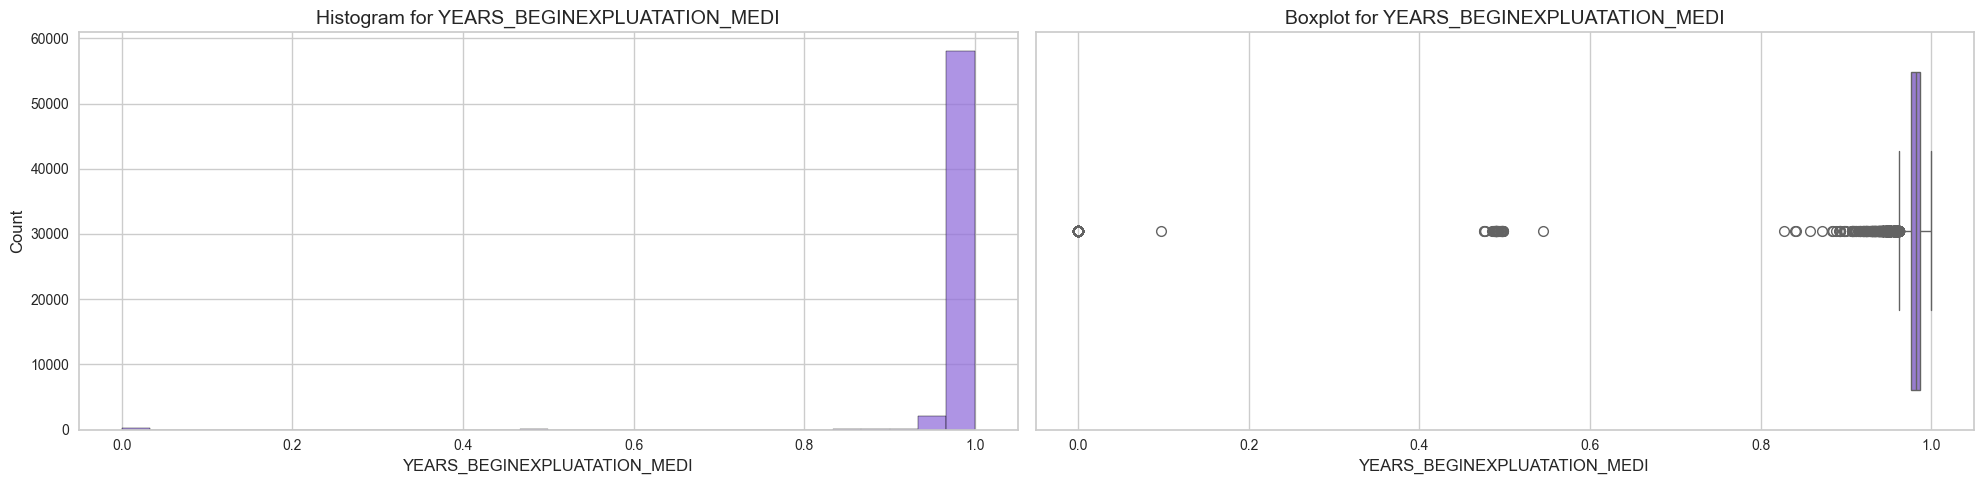

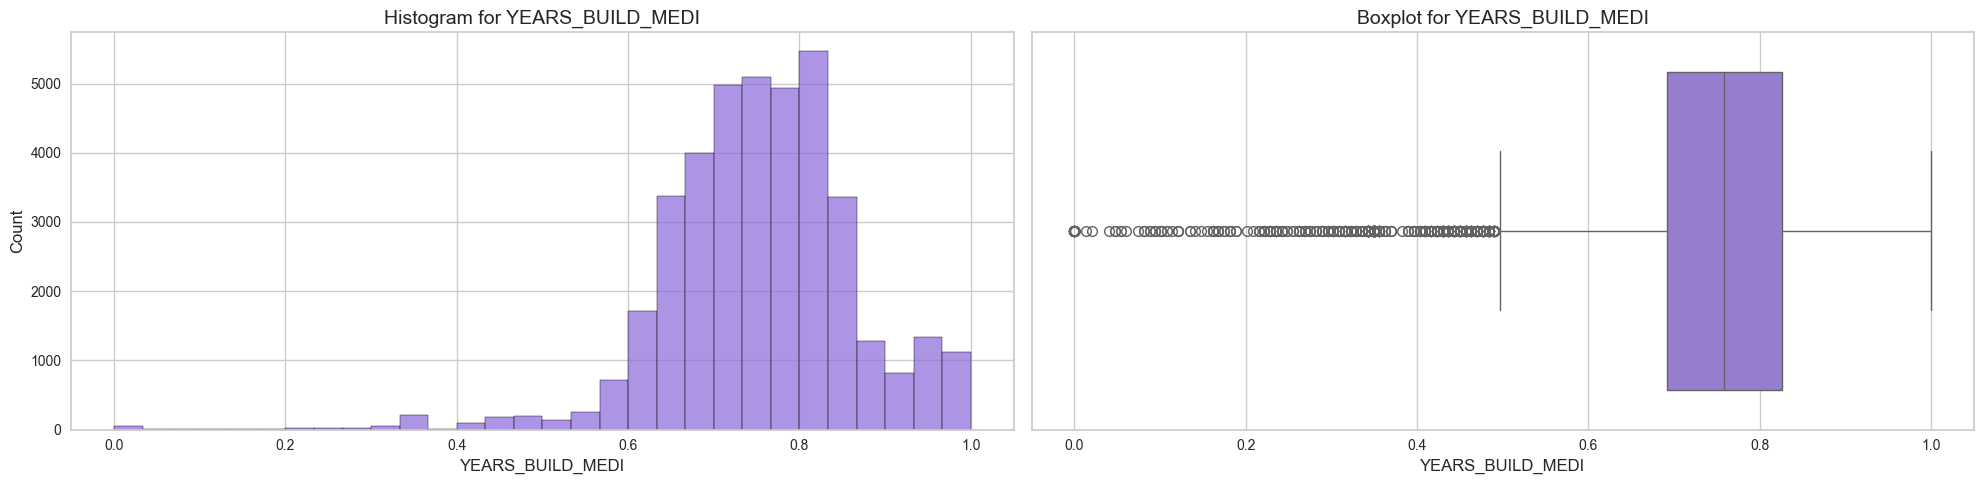

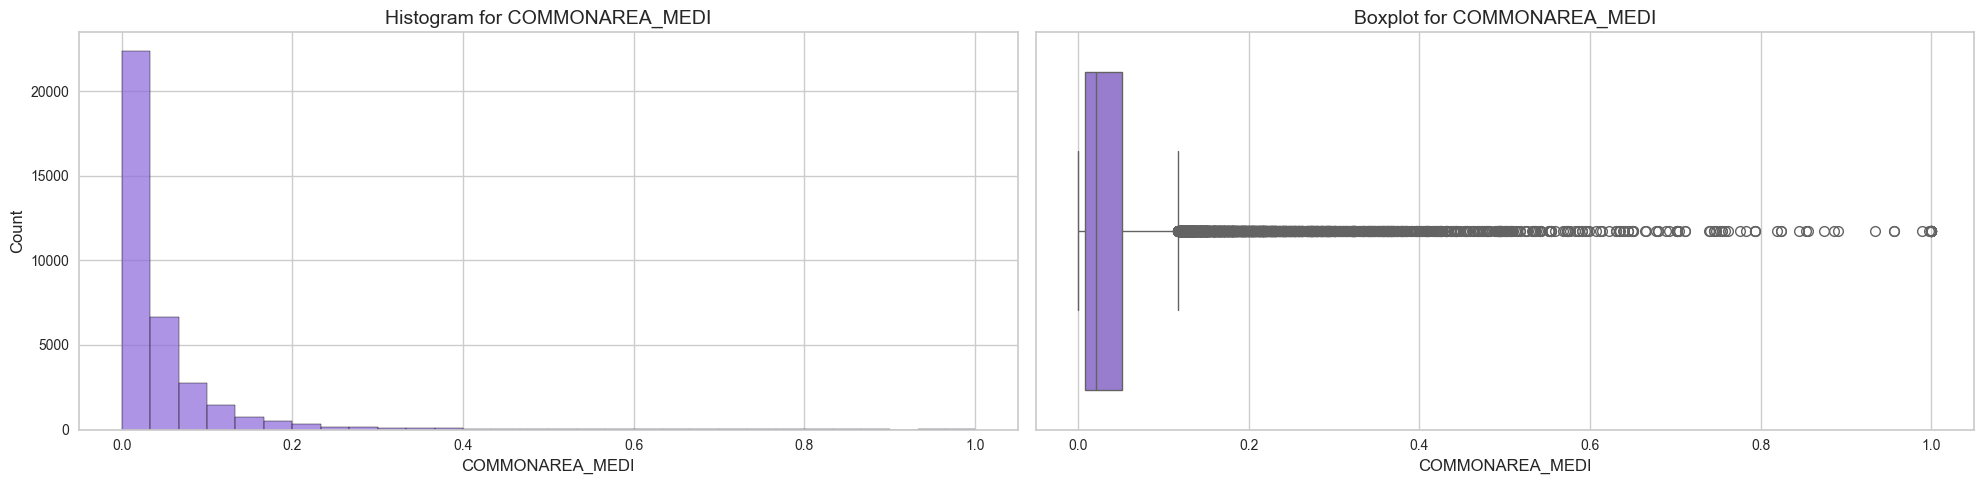

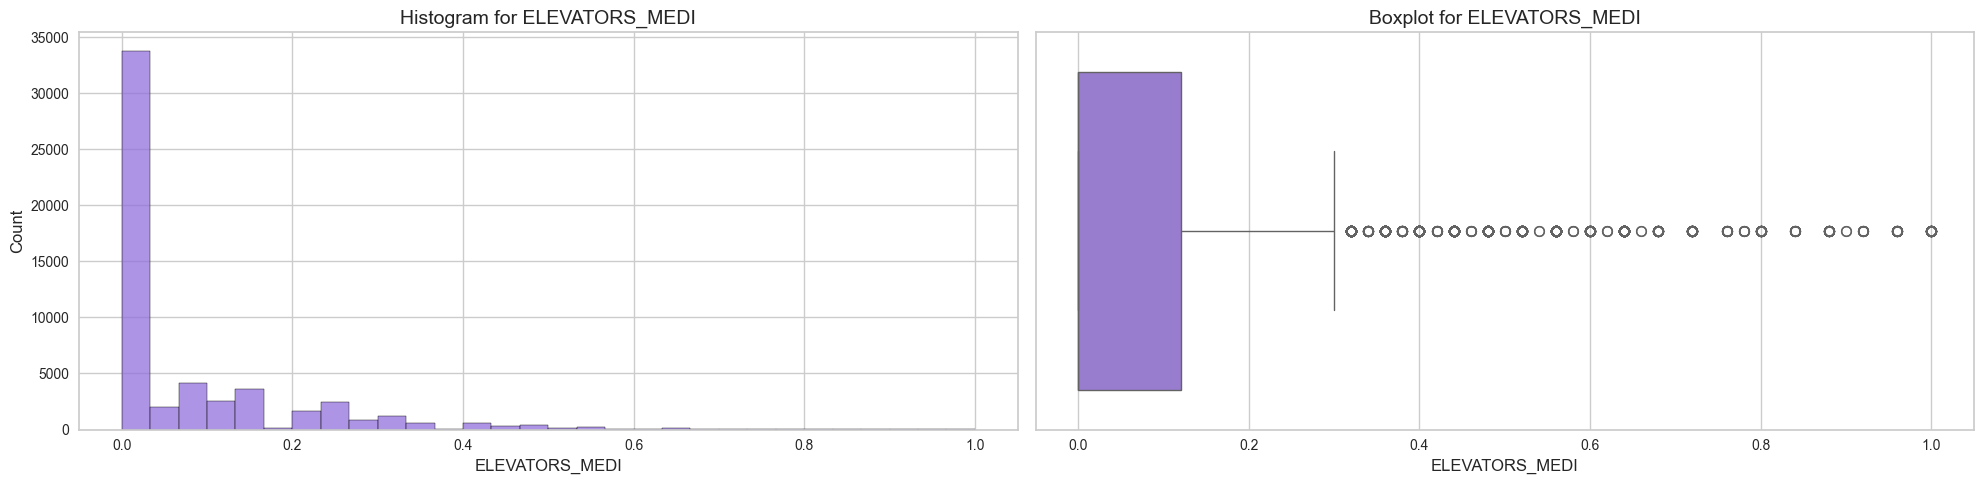

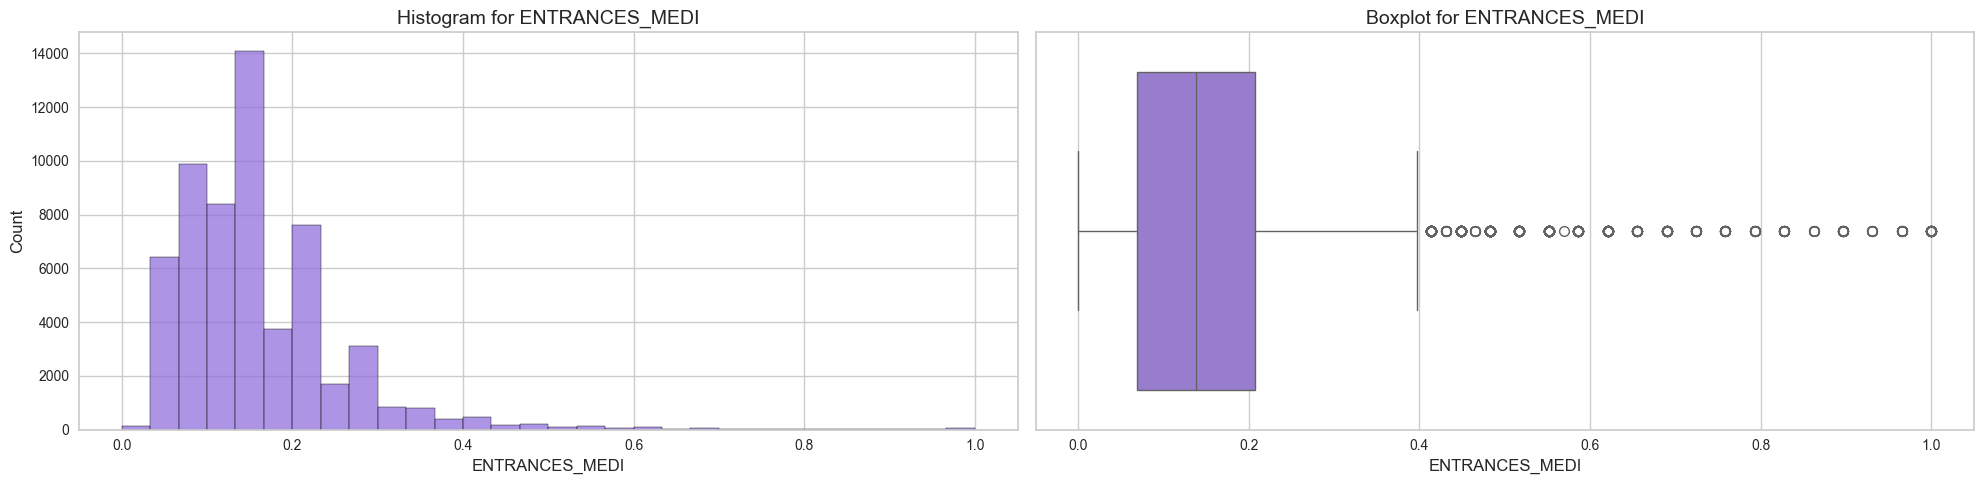

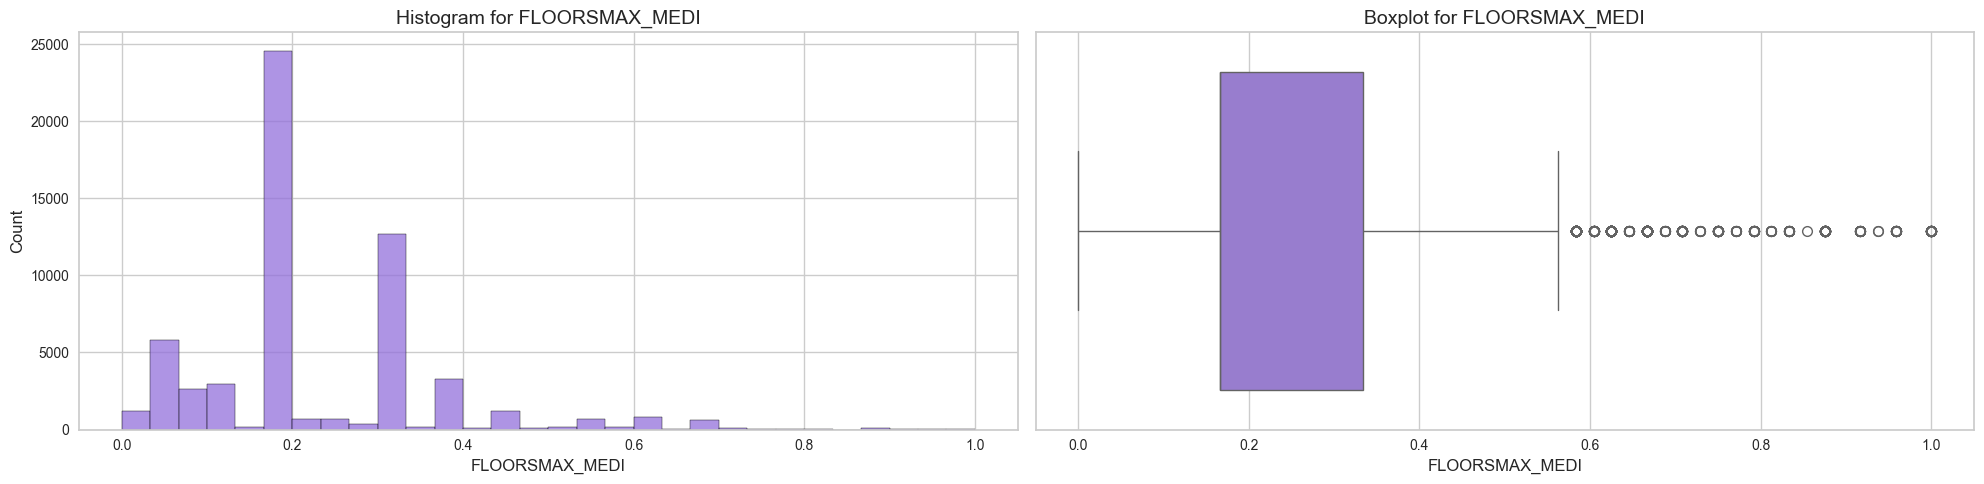

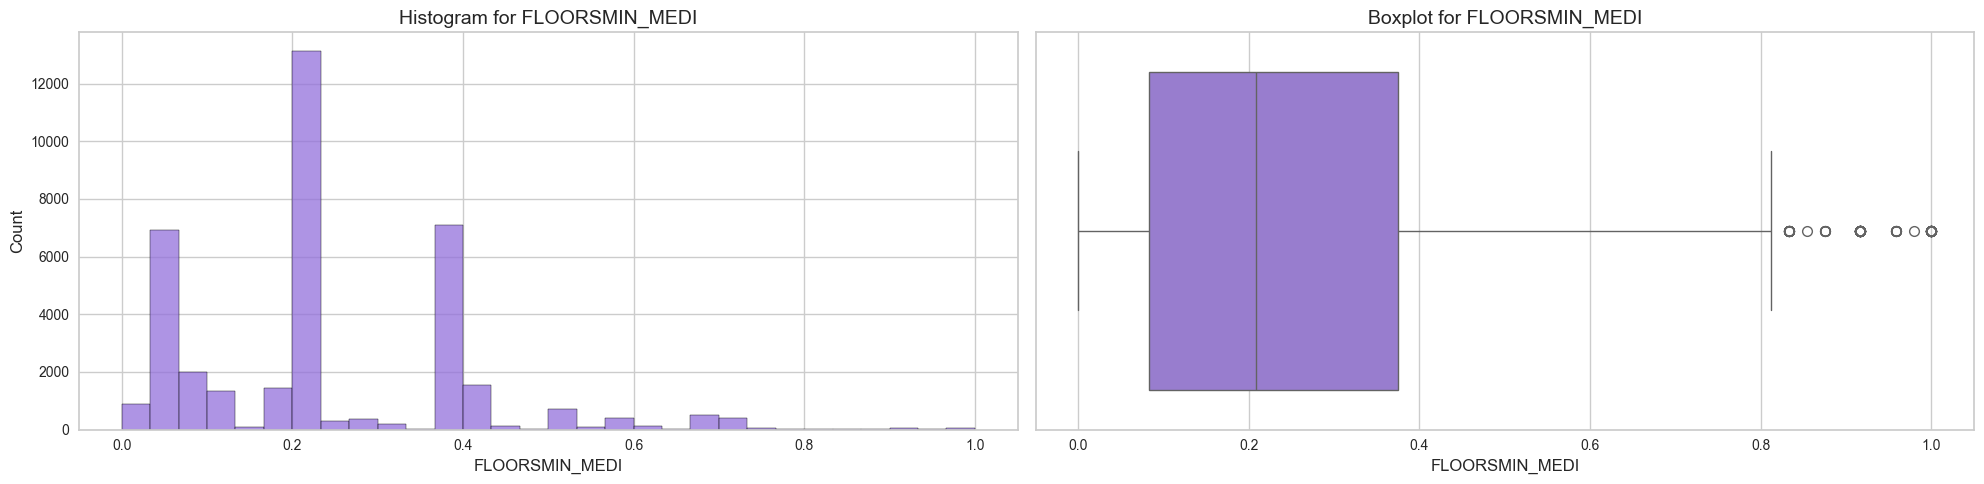

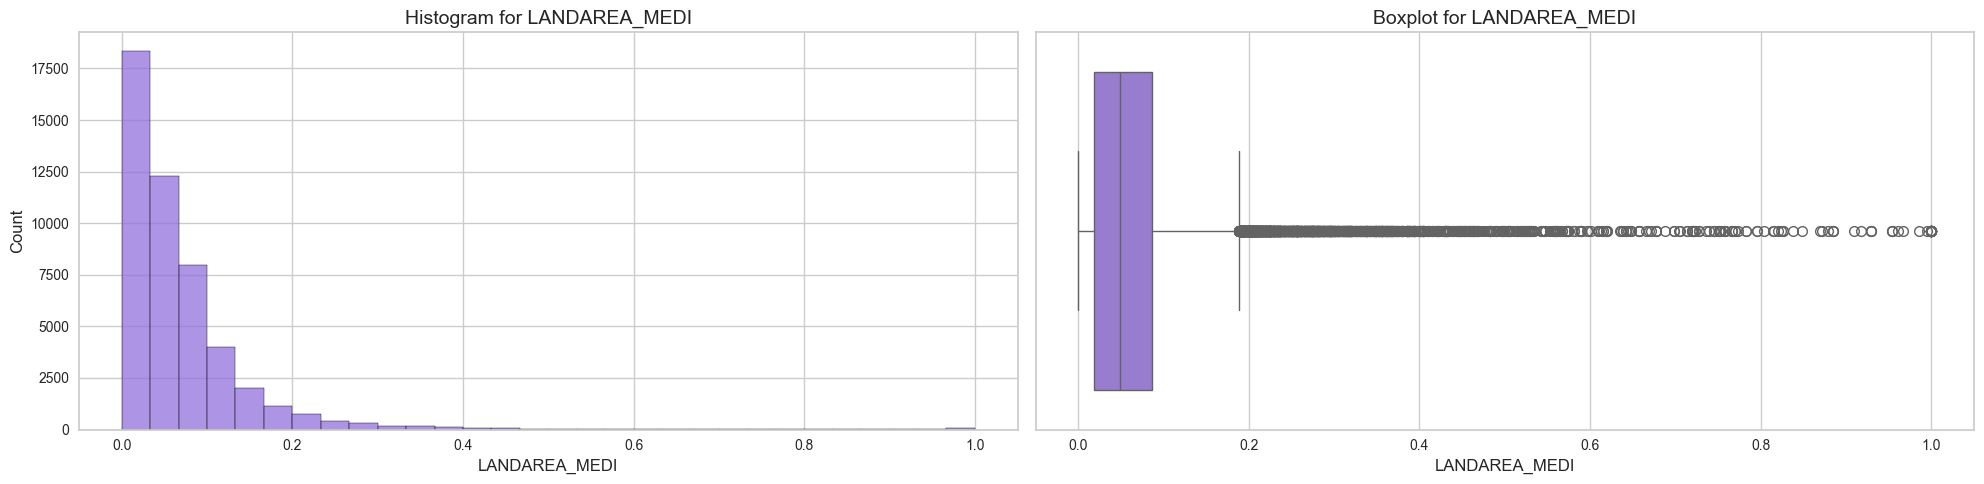

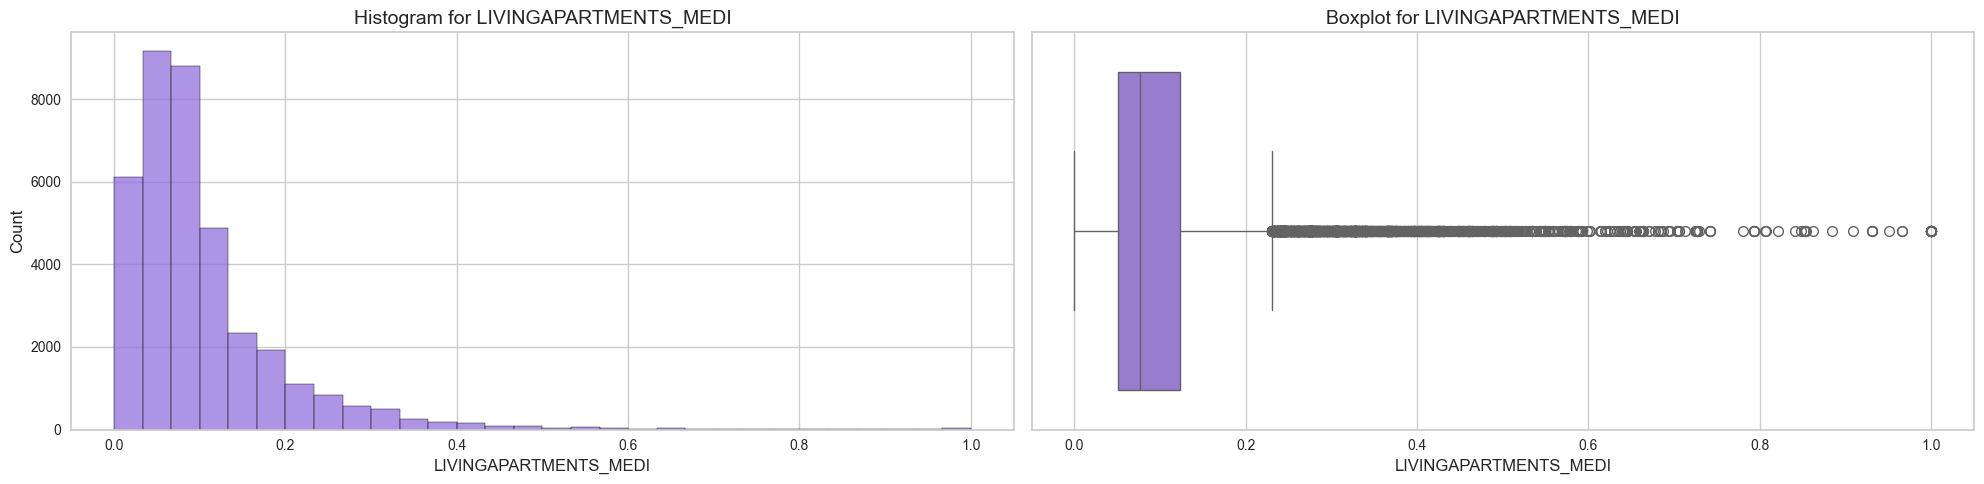

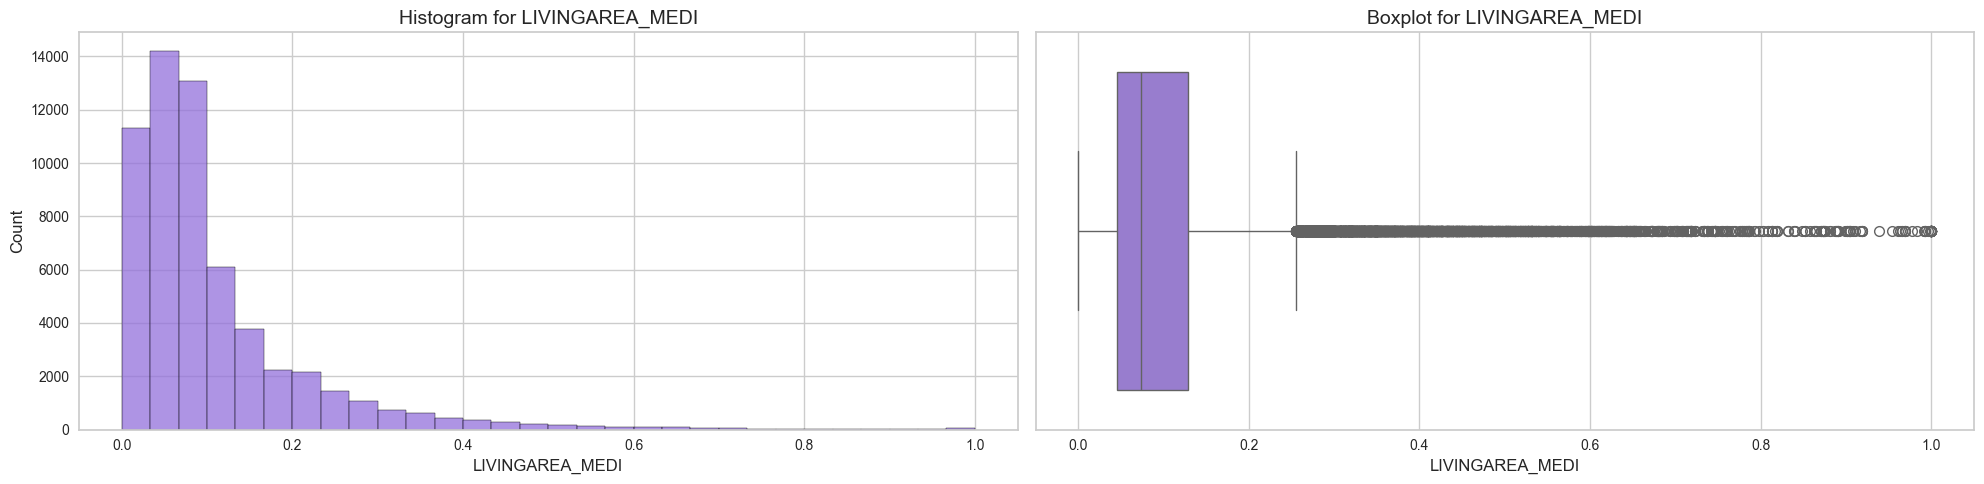

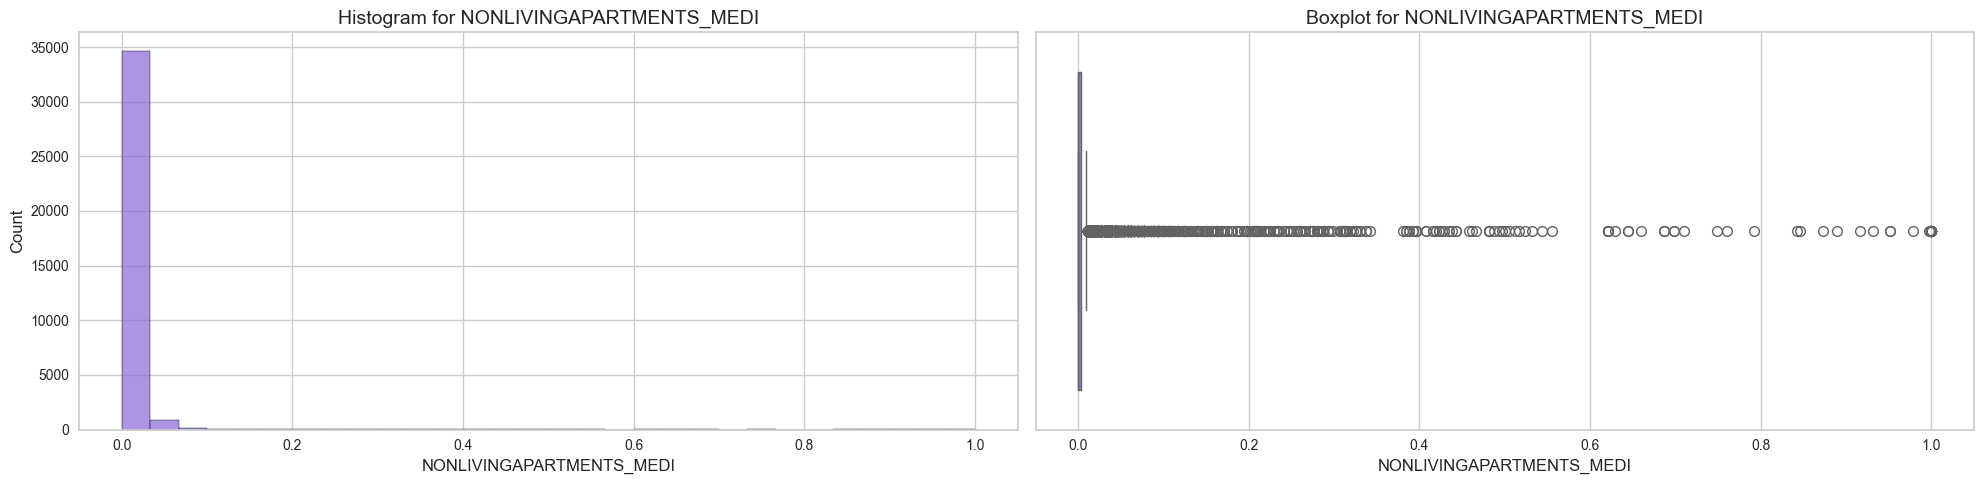

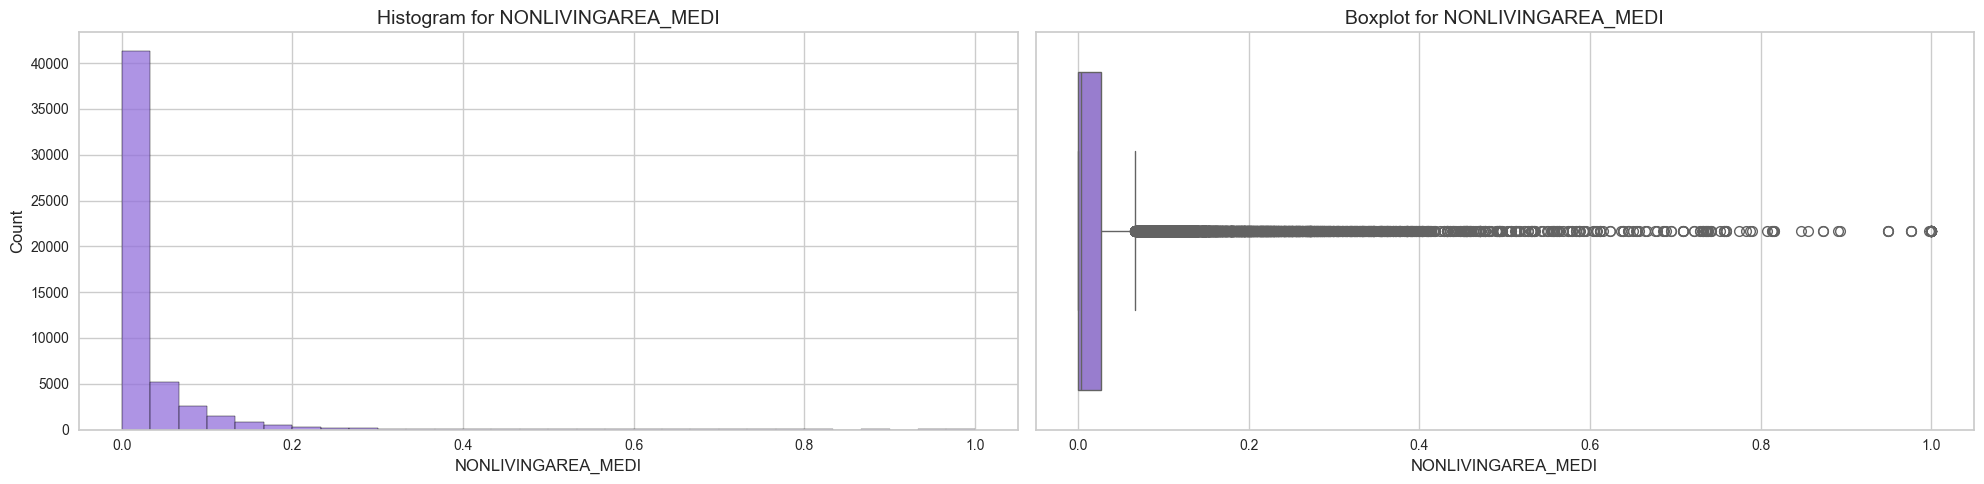

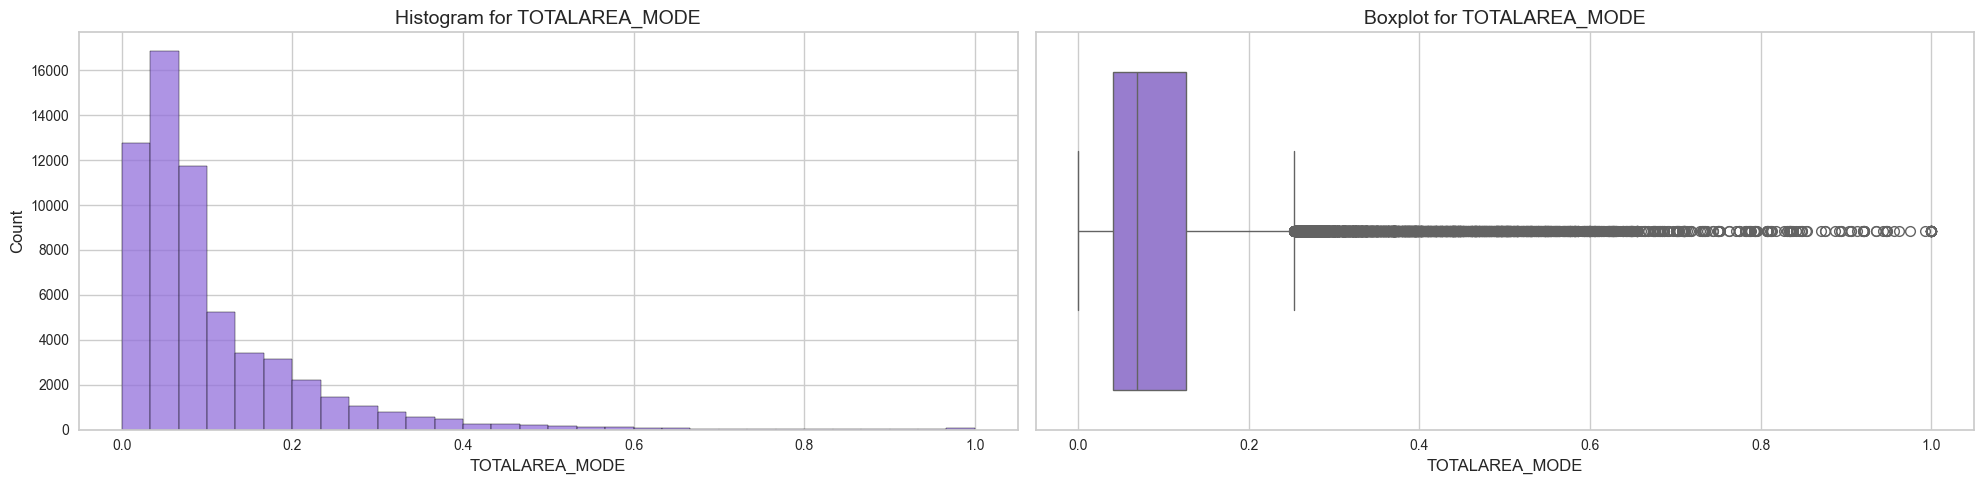

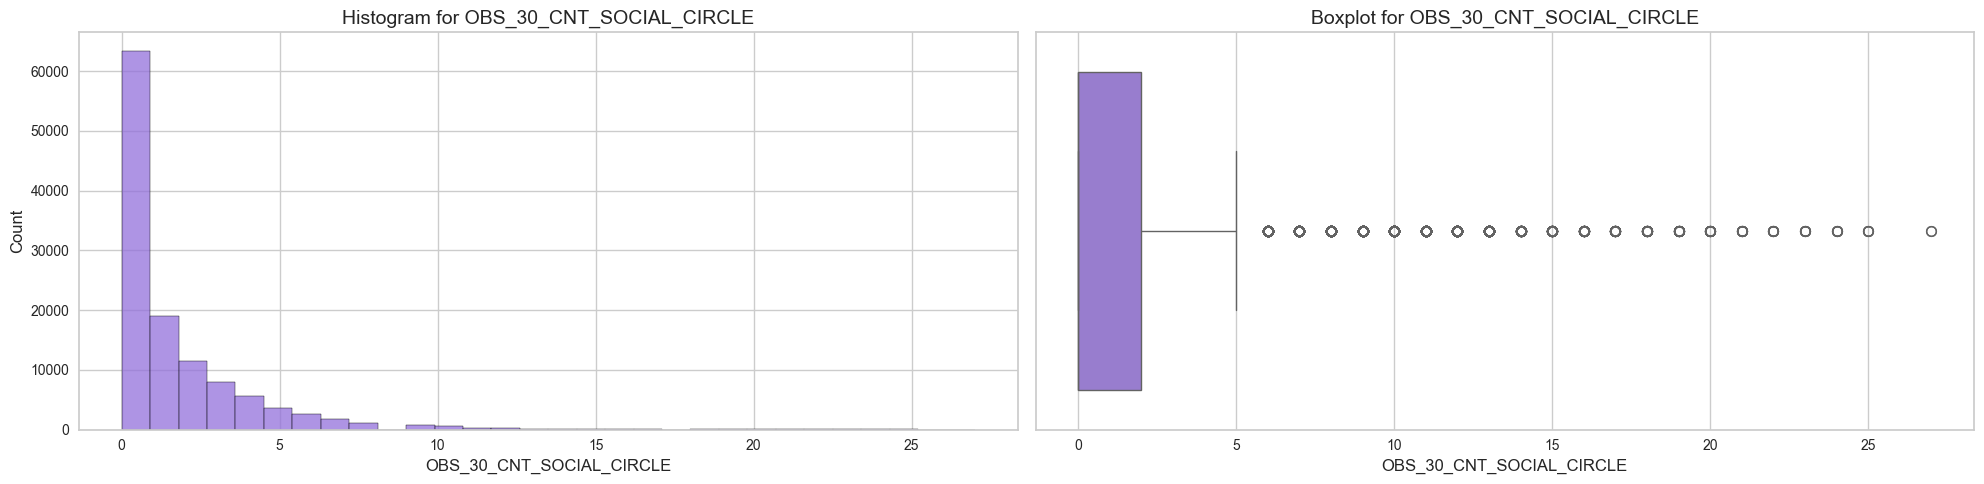

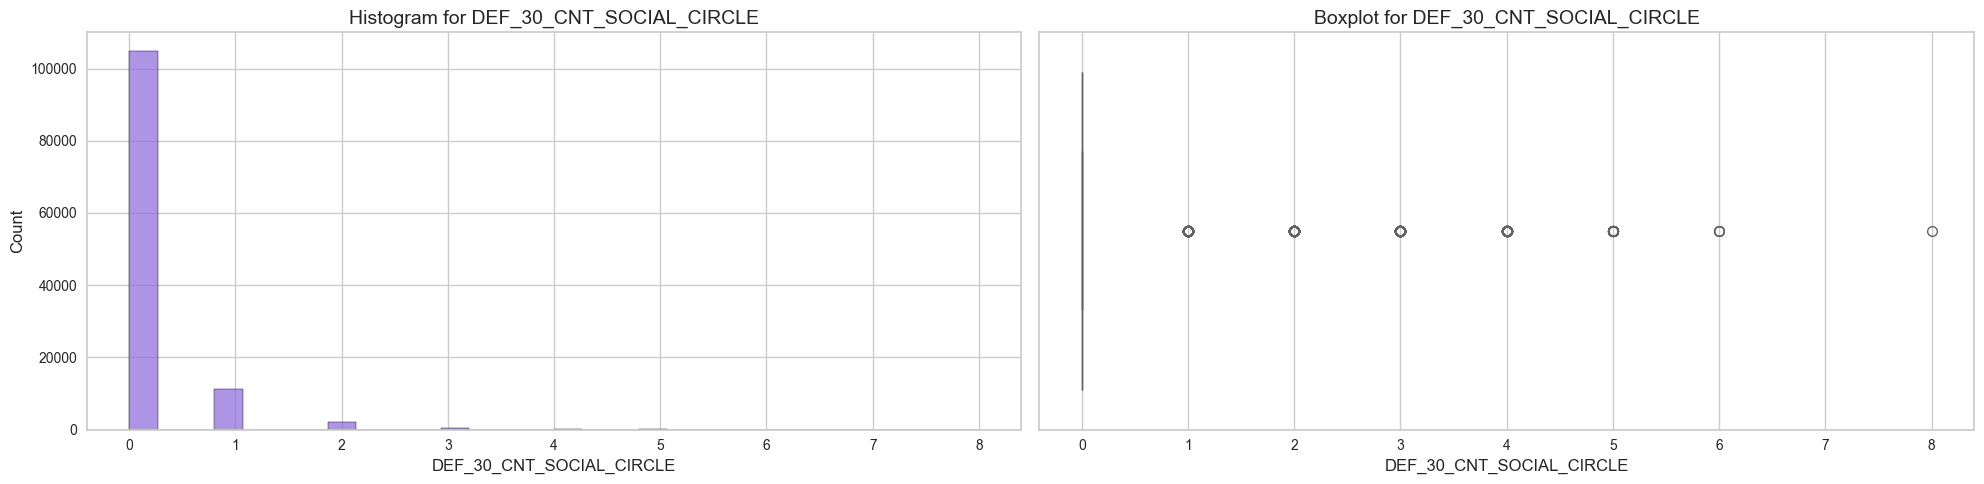

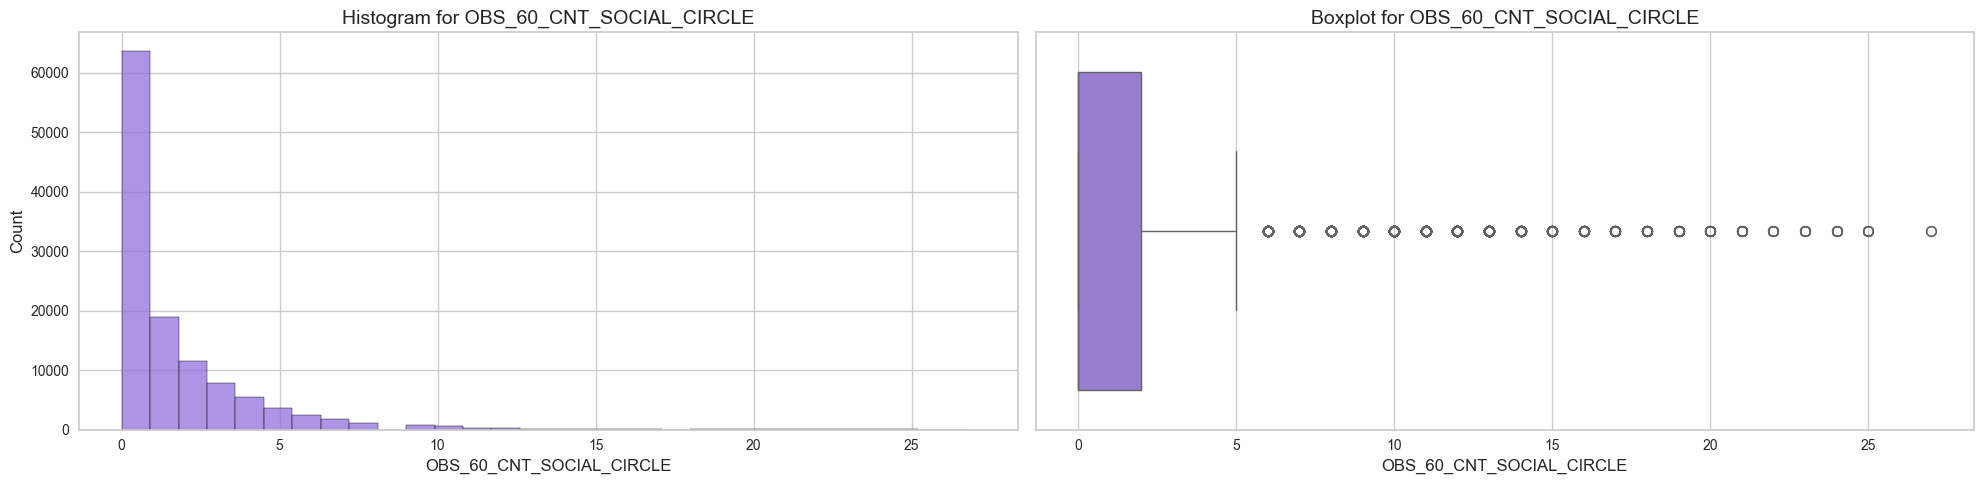

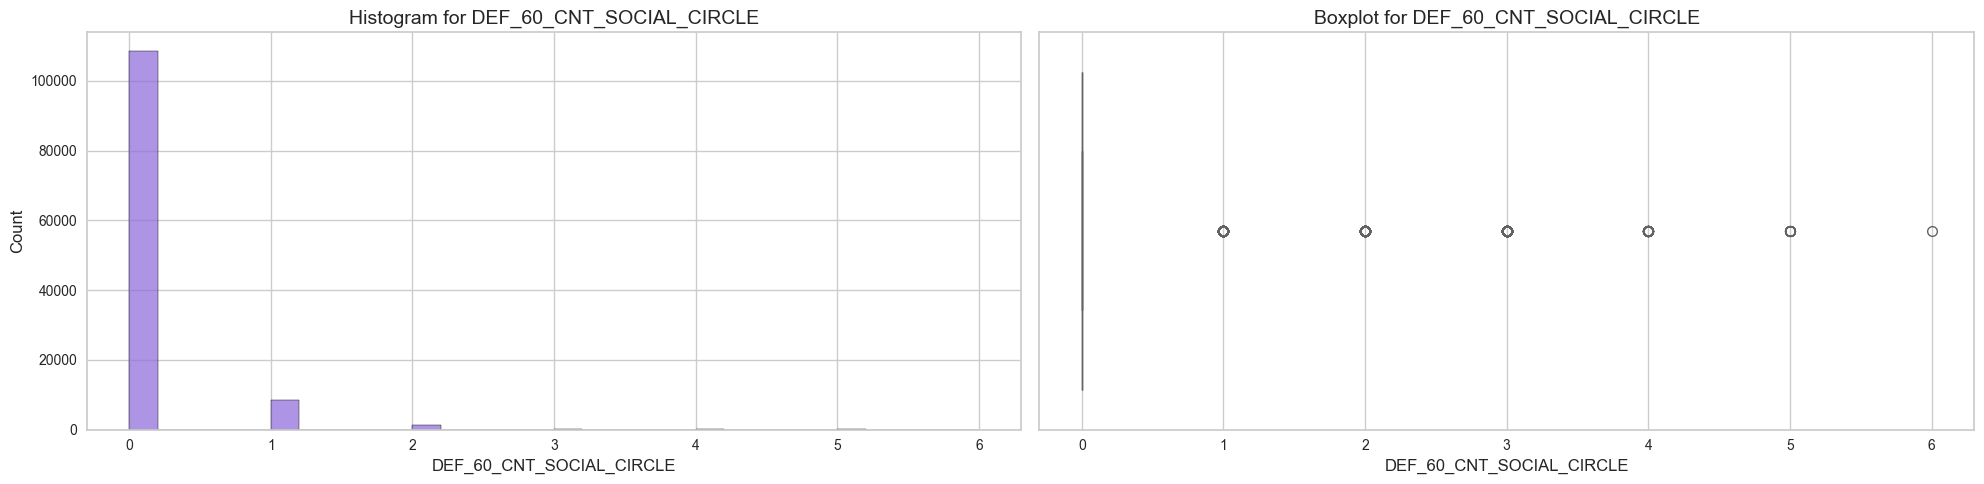

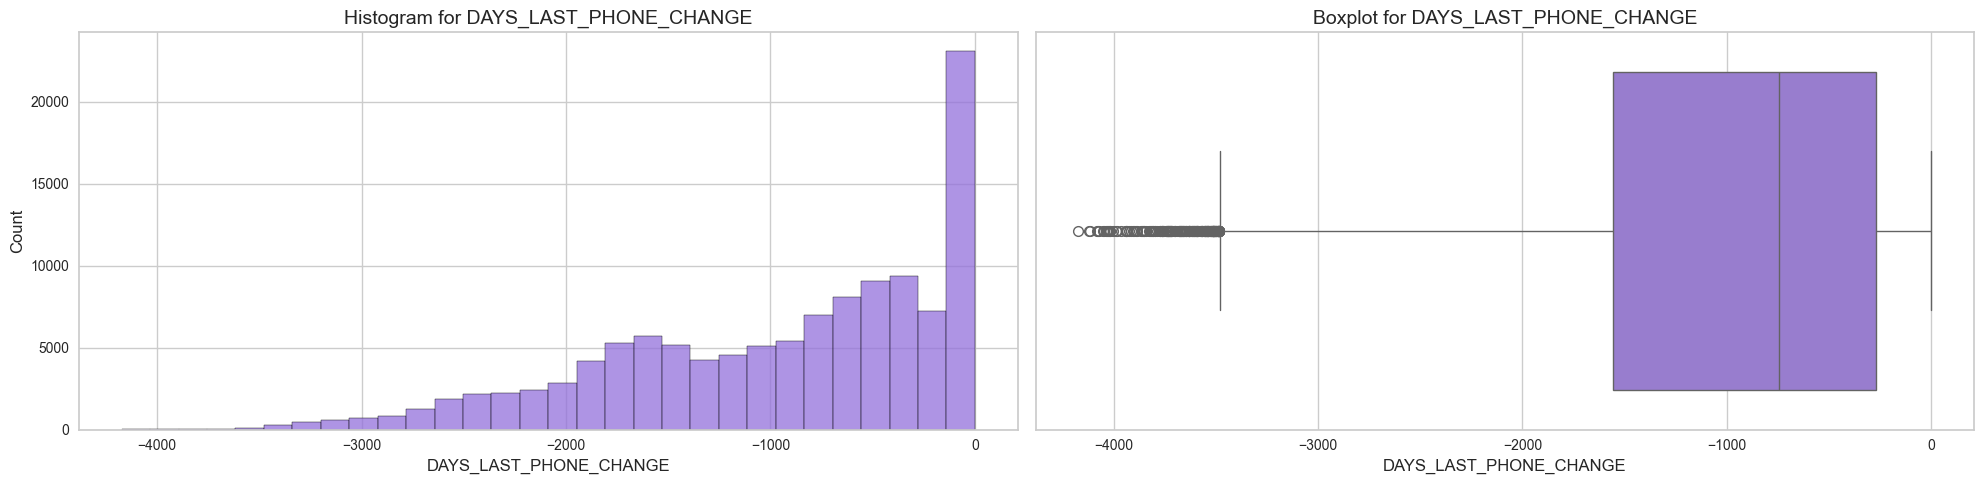

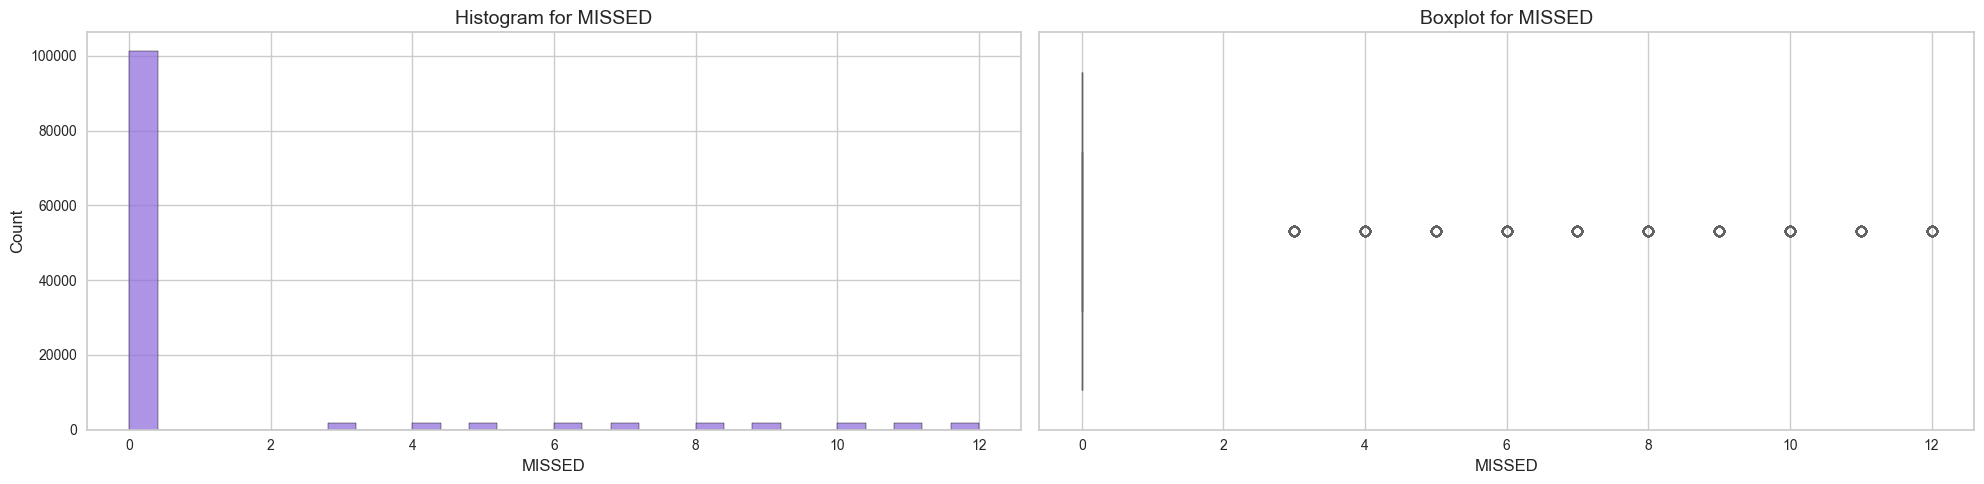

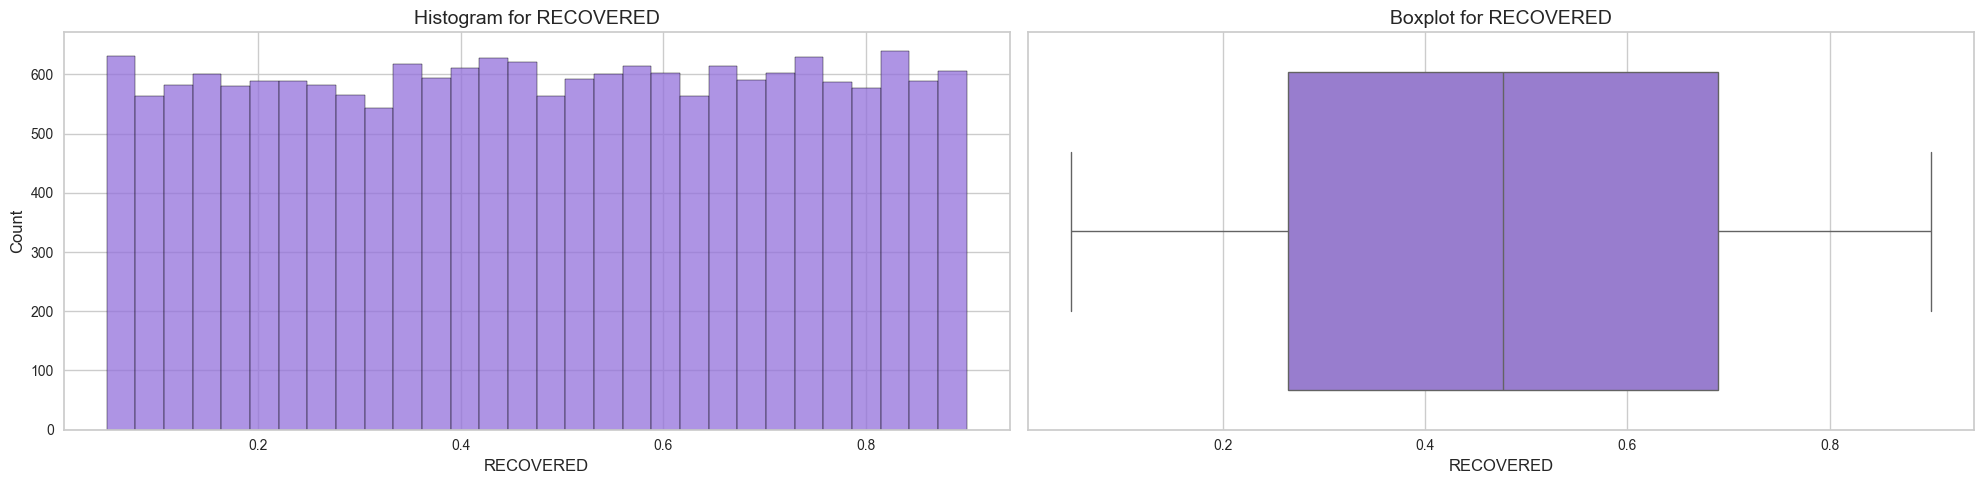

In [19]:
# Looping through numerical variables and create plots
for var in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Histogram
    sns.histplot(data=df_train, x=var, bins=30, kde=False, ax=axes[0], color="mediumpurple")
    axes[0].set_title(f'Histogram for {var}', fontsize=14)
    axes[0].set_xlabel(var, fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)

    # Boxplot
    sns.boxplot(data=df_train, x=var, ax=axes[1], color="mediumpurple")
    axes[1].set_title(f'Boxplot for {var}', fontsize=14)
    axes[1].set_xlabel(var, fontsize=12)

    plt.tight_layout()
    plt.show()

* Some variables like "AMT_INCOME_TOTAL" variable should probably suffer a log transformation in order to improve the interpretability and also to reduce the skewness.

* Also, the "DAYS_EMPLOYED" variable has some really strange values that do not make much sense. 
  * This is because this variable represents "How many days before the application the person started current employment" so, it should not have any positive values!

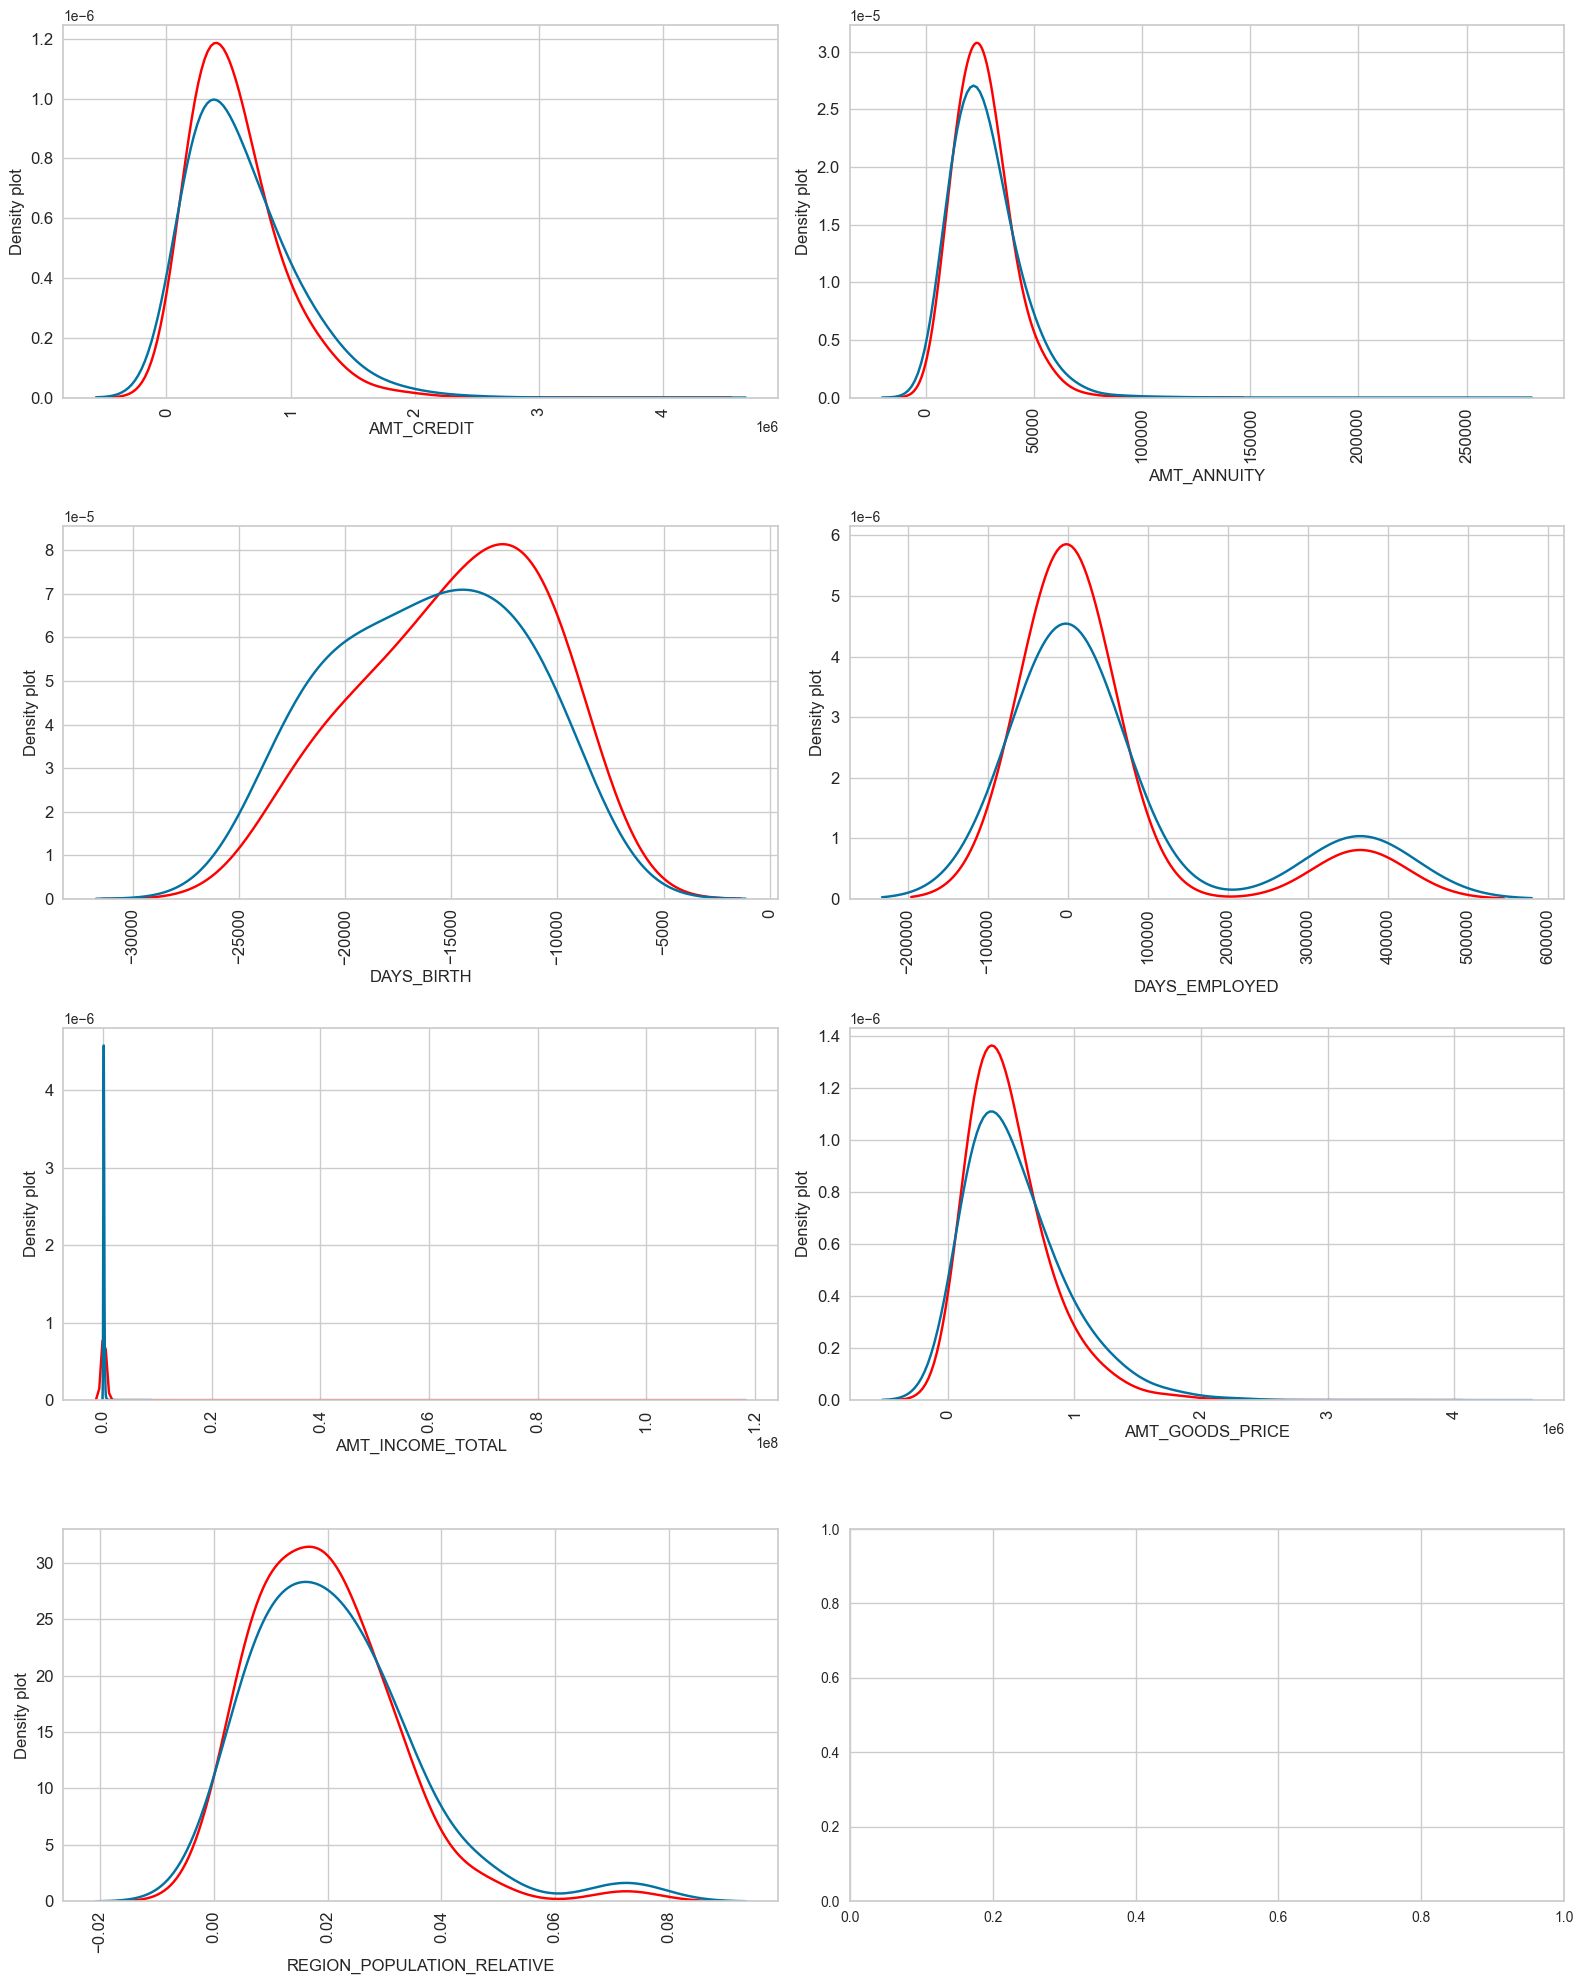

In [20]:
# Plotting some possible important features

domain_features=['AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_INCOME_TOTAL','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']

def plot_distribution(df, FEATURES):
    i = 0
    t1 = df.loc[df['TARGET'] != 0]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, ax = plt.subplots(4, 2, figsize=(16, 20))

    for feature in FEATURES:
        if feature != 'TARGET':
            i += 1
            plt.subplot(4, 2, i)
            sns.kdeplot(t1[feature], bw=0.5, color='red', label="TARGET = 1")
            sns.kdeplot(t0[feature], bw=0.5, label="default = 0")
            plt.ylabel('Density plot', fontsize=12)
            plt.xlabel(feature, fontsize=12)
            plt.xticks(fontsize=12, rotation=90)
            plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

plot_distribution(df_train, domain_features)

* From this plots, we can see that most of these features have similar distributions for borrowers who defaulted and those who did not.

* However, we can see that for the "DAYS_BIRTH" variable, we can see that younger people have higher chance of defaulting because of the curve skewness for target = 1.

In [21]:
# Checking the unique target values for MISSED and RECOVERED

print("Unique labels for rows that have a higher value than 0 in the 'MISSED' column:", df_train.loc[df_train['MISSED'] > 0, 'TARGET'].unique())
print("------------------------------------------------------------------------------------")
print("Unique labels for rows that have a non-missing value in the 'RECOVERED' column:", df_train.loc[df_train['RECOVERED'].notnull(), 'TARGET'].unique())


Unique labels for rows that have a higher value than 0 in the 'MISSED' column: [1.]
------------------------------------------------------------------------------------
Unique labels for rows that have a non-missing value in the 'RECOVERED' column: [1.]


*  As suspected, a client with "MISSED" > 0 has explicitly missed payments, which by definition qualifies as "payment difficulty";
*  Also, if a loan is classified as **recovered**, its because the client had already entered a state of default, so it makes sense that we only have defaults as the target variable;

*  Task 1.D - These two previous features are clearly **leaking data** and cannot be used for prediction. We need to drop them!

In [22]:
def t_test(df):
    t_stat_list=[]
    p_val_list=[]
    variable=[]

    for var in df.columns:
        t_stat, p_val = stats.ttest_ind(df_train[df_train['TARGET'] == 0][var],
                                        df_train[df_train['TARGET'] == 1][var])
        if p_val < 0.05:
            variable.append(var)
            t_stat_list.append(t_stat)
            p_val_list.append(p_val)

    t_test = pd.DataFrame({'variable': variable, 't_stat': t_stat_list, 'p_val': p_val_list})
    return t_test.sort_values(by='p_val',ascending=True)

t_test(df_train[numerical_features])

variable      t_stat          p_val
9                      MISSED -820.921907   0.000000e+00
3                  DAYS_BIRTH  -35.260800  5.912459e-271
6             DAYS_ID_PUBLISH  -23.405545  7.048368e-121
4               DAYS_EMPLOYED   20.426979   1.388801e-92
5           DAYS_REGISTRATION  -20.313943   1.385363e-91
2  REGION_POPULATION_RELATIVE   16.624877   5.408681e-62
1                  AMT_CREDIT   14.333019   1.487931e-46
8     HOUR_APPR_PROCESS_START   10.697705   1.072876e-26
0                CNT_CHILDREN   -7.996232   1.294243e-15
7             CNT_FAM_MEMBERS   -3.211607   1.320298e-03

* Considering the importance to the credit default prediction, the previous features might be relevant.

  * As we have seen before, the "MISSED" feature will be dropped.

### Boolean Features

In this section, we will analyse the **boolean** features.

The **.value_counts()** functions will be used, and for visualization purposes we will be using **countplots**.

In [23]:
print(f'There are {len(boolean_features)} boolean features in the dataset.')

There are 17 boolean features in the dataset.


Boolean Features:

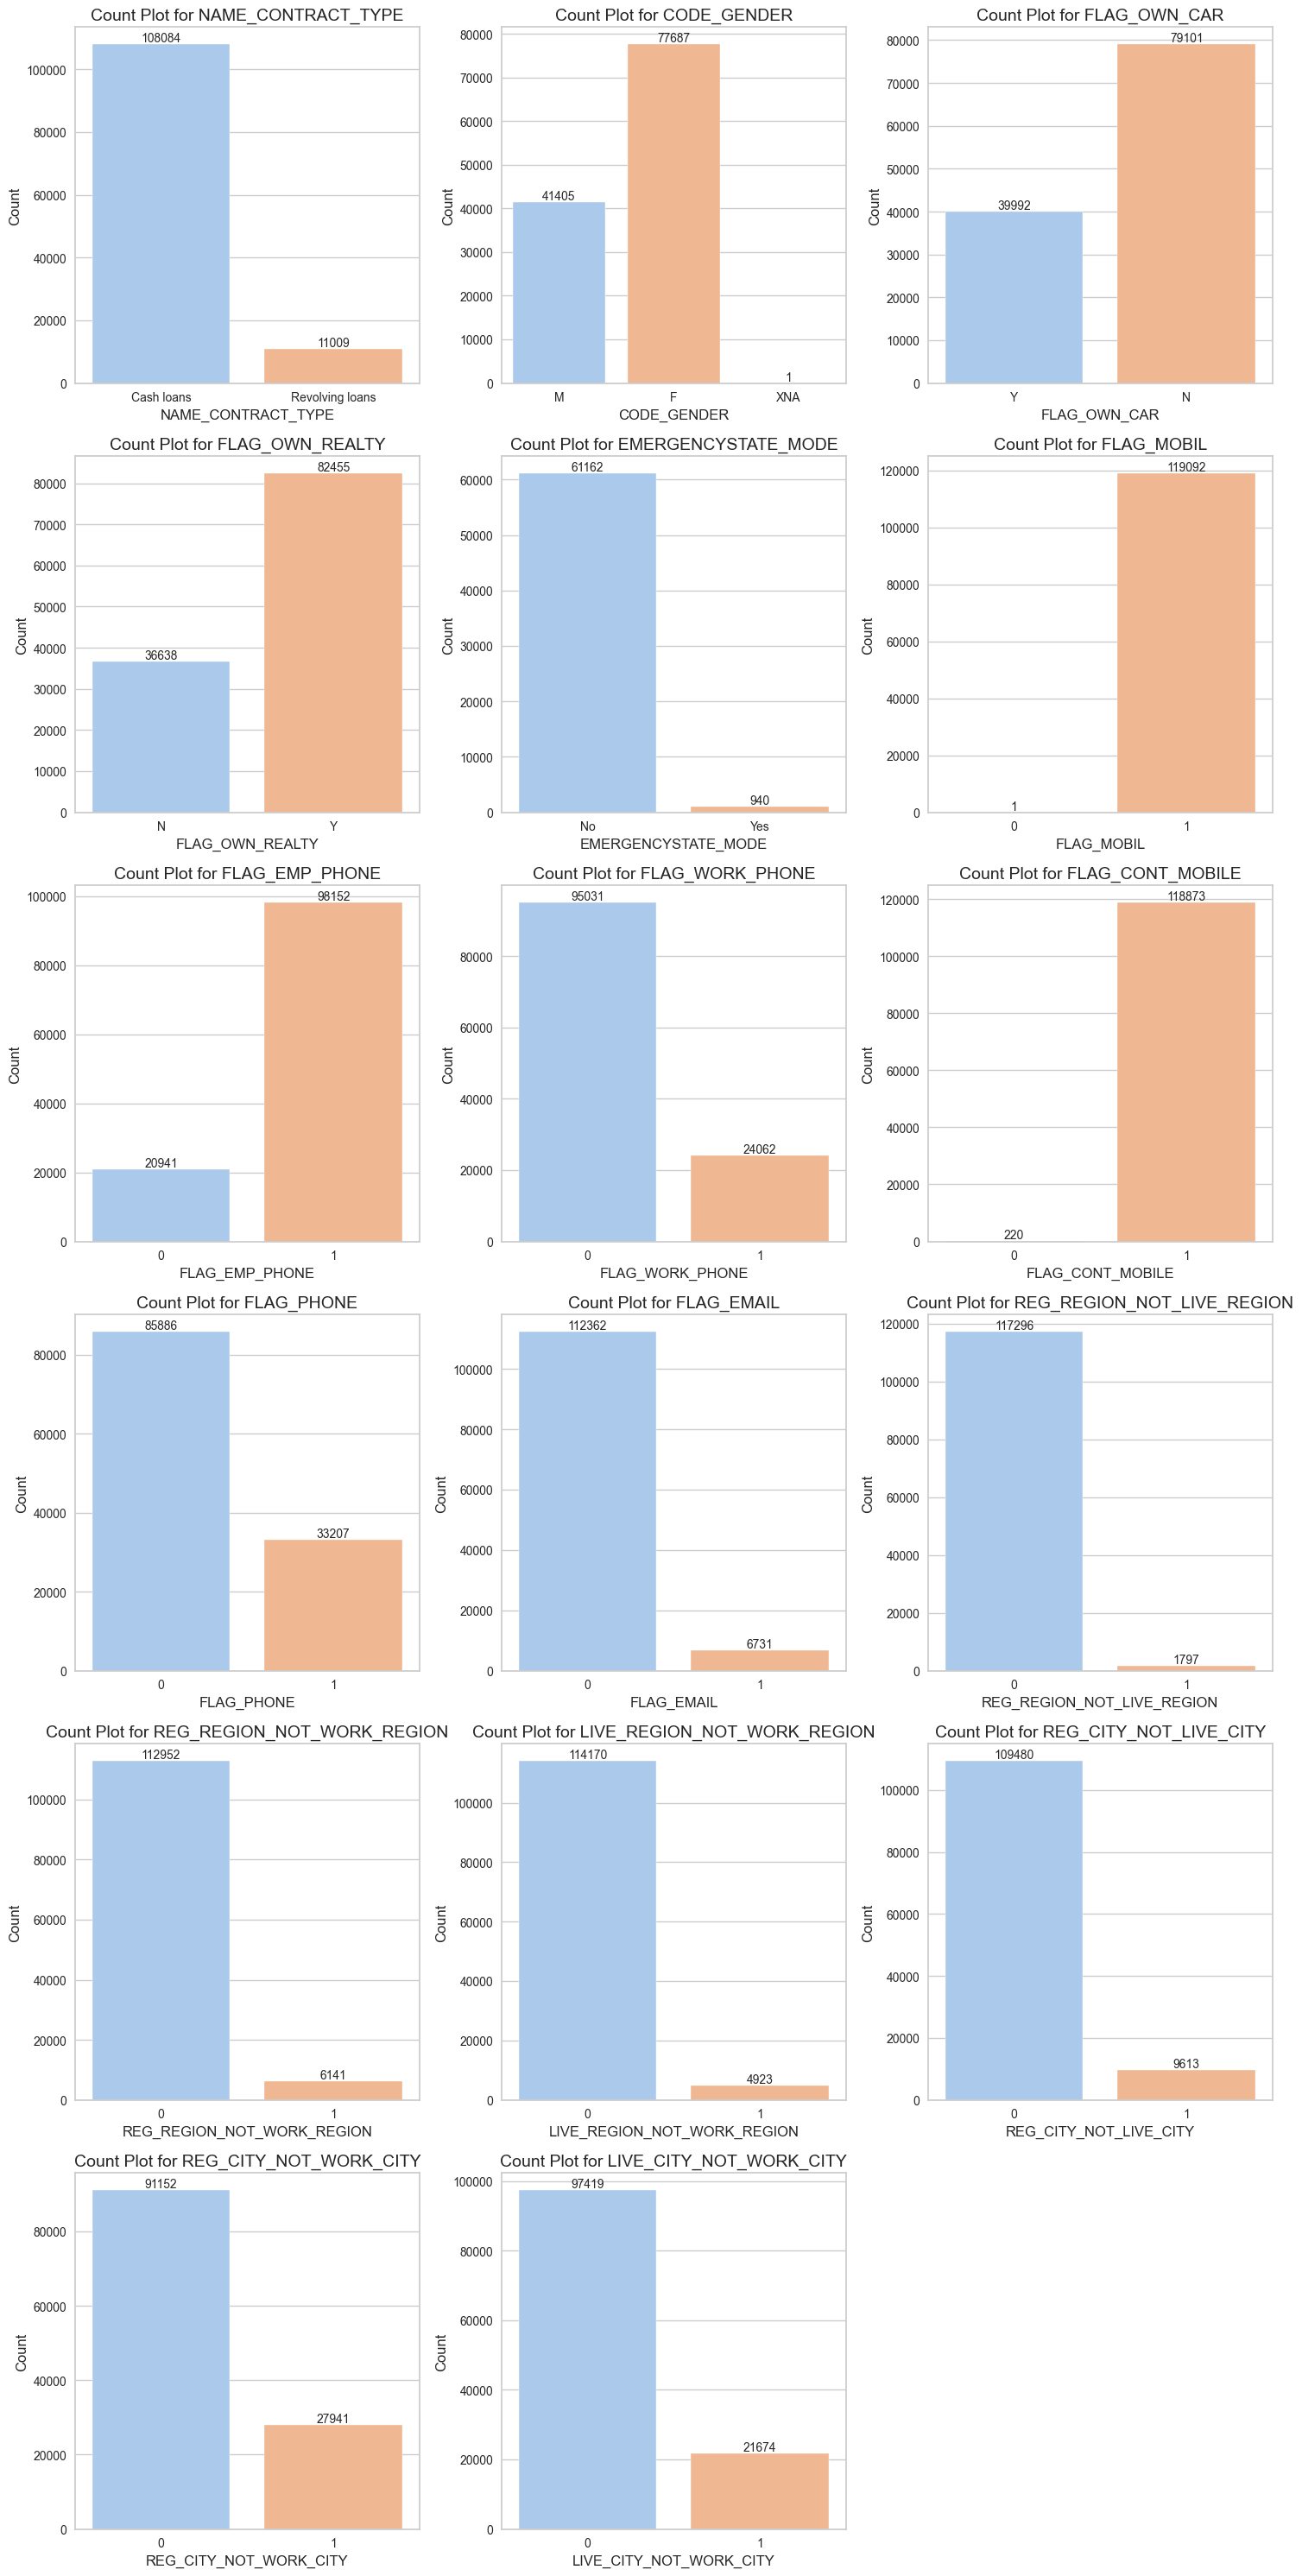

In [24]:
# Defining the number of rows and columns for the grid
n_cols = 3
n_rows = -(-len(boolean_features) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Loop through the binary variables and create count plots
for i, var in enumerate(boolean_features):
    row, col = divmod(i, n_cols)
    ax = sns.countplot(data=df_train, x=var, ax=axes[row, col], palette="pastel")
    ax.set_title(f"Count Plot for {var}", fontsize=14)
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

    # Adding labels to the bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=10
        )

# Hiding any empty subplots if the number of variables isn't a perfect multiple of the grid size
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

* The "CODE_GENDER" Variable has values "XNA" that need to be resolved in the preprocessing phase.

* Also, feature like "FLAG_CONT_MOBILE" have really low variability and should have a low predictive relevance. We might need to drop his feature before modelling!

In [25]:
# Checking if this feature has some predictive value based on exploratory analysis

df_train.groupby(target_feature)["EMERGENCYSTATE_MODE"].value_counts()

TARGET  EMERGENCYSTATE_MODE
0.0     No                     53139
        Yes                      787
1.0     No                      8023
        Yes                      153
Name: count, dtype: int64

*  The proportion of "Yes" for different target values might suggest that this feature could have some predictive value!

*  However, the imbalance and rarity of the "Yes" value could limit the impact on the prediction.

* This feature should be dropped! It has no predictive value!

In [26]:
# Checking if this feature has some predictive value based on exploratory analysis

df_train.groupby(target_feature)["FLAG_CONT_MOBILE"].value_counts()

TARGET  FLAG_CONT_MOBILE
0.0     1                   101045
        0                      185
1.0     1                    17828
        0                       35
Name: count, dtype: int64

* The same thing regarding the imbalance and rarity of one of the events when compared to the "EMERGENCYSTATE_MODE" variable

In [27]:
# Checking if this feature has some predictive value based on exploratory analysis

df_train.groupby(target_feature)["FLAG_MOBIL"].value_counts()

TARGET  FLAG_MOBIL
0.0     1             101229
        0                  1
1.0     1              17863
Name: count, dtype: int64

* This flag should also be dropped due to rarity of values = 1!

### Categorical Features

In this section, we will analyse the **categorical** features.

The **.value_counts()** function will be used, and for visualization purposes we will be using **countplots**.

In [28]:
print(f'There are {len(categorical_features)} categorical features in the dataset.')

There are 13 categorical features in the dataset.


Categorical Features:

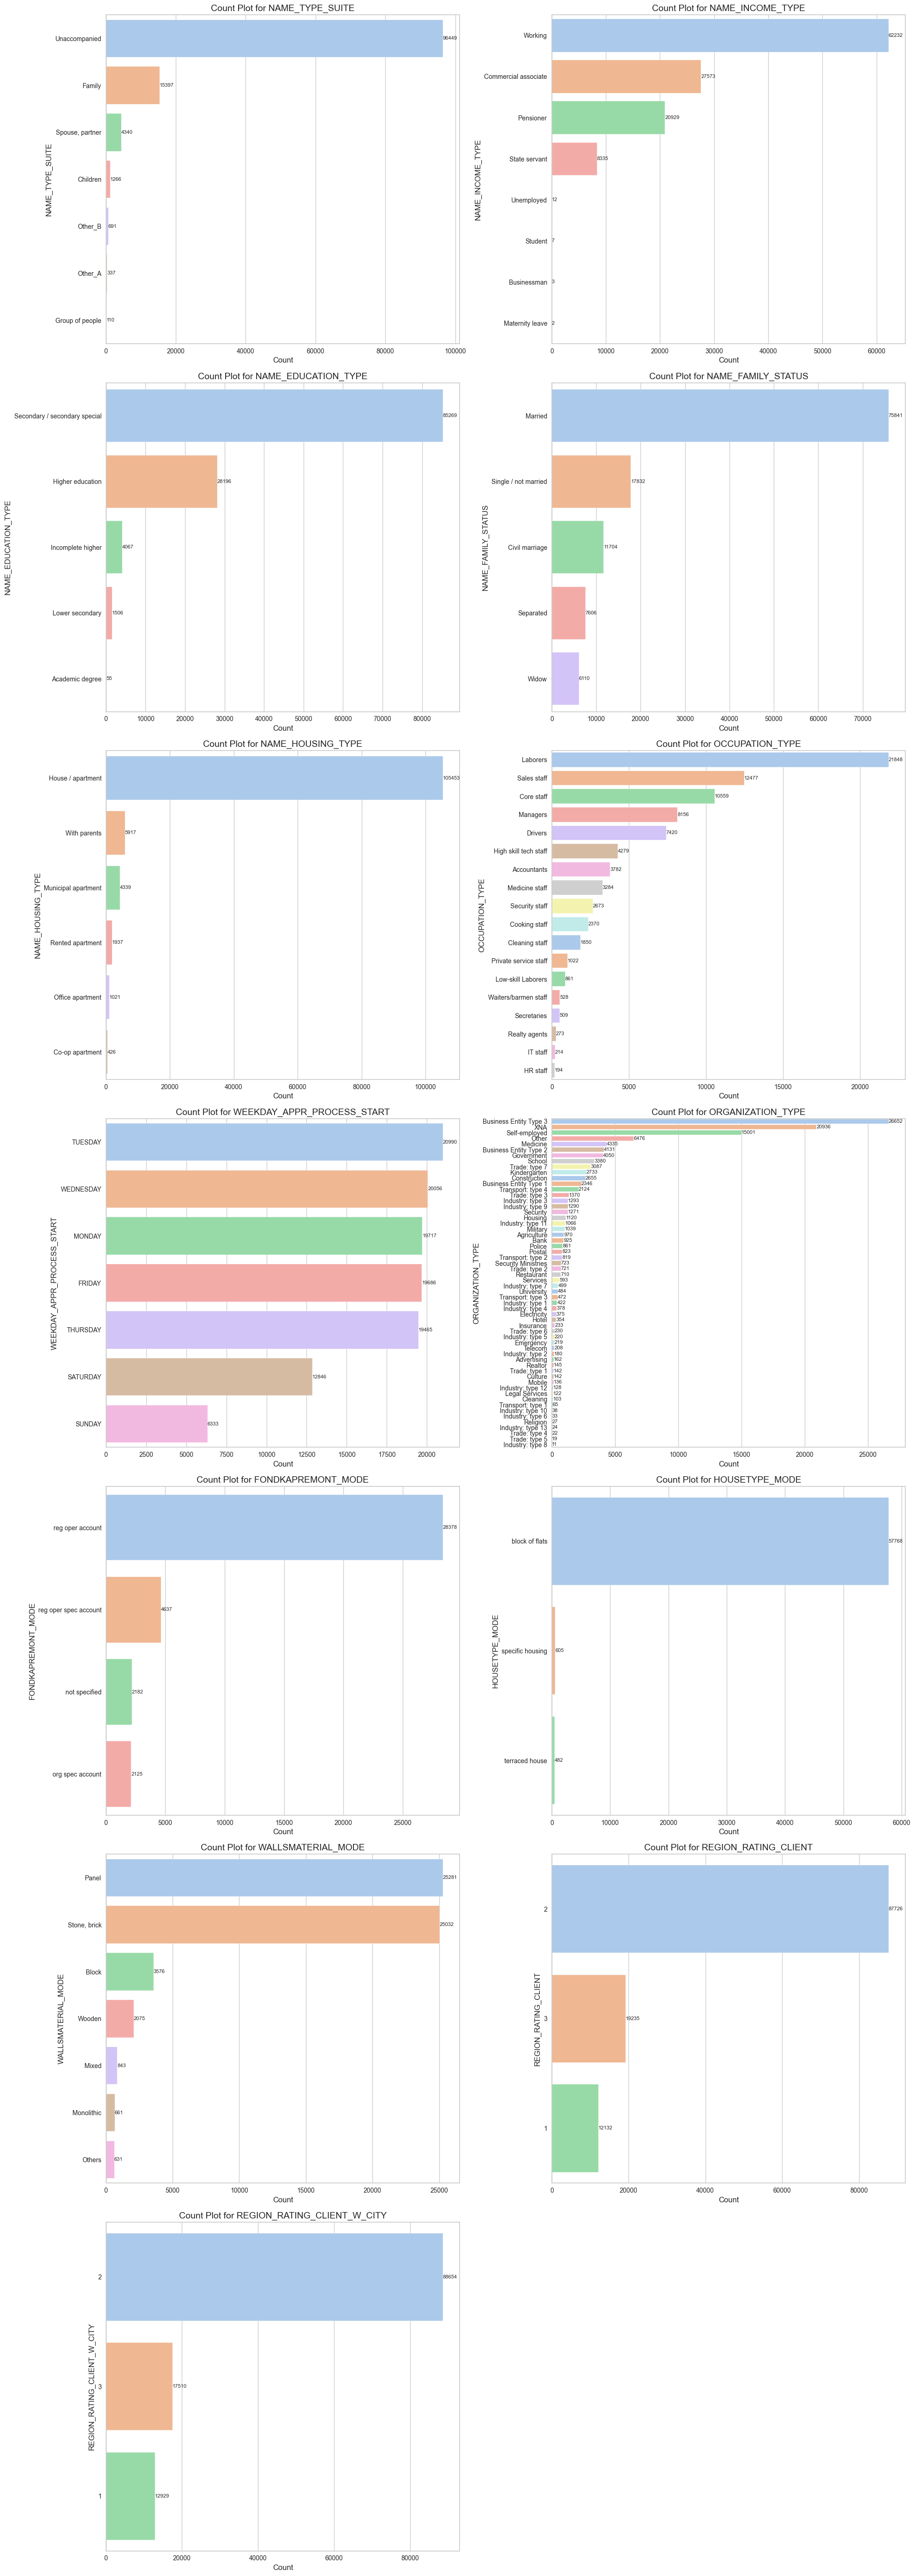

In [29]:
# Define the number of rows and columns for the grid
n_cols = 2  # Number of plots per row
n_rows = -(-len(categorical_features) // n_cols)  # Ceiling division to determine rows

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 8 * n_rows))

# Loop through the categorical variables and create count plots
for i, var in enumerate(categorical_features):
    row, col = divmod(i, n_cols)
    ax = sns.countplot(data=df_train, y=var, ax=axes[row, col], palette="pastel", order=df_train[var].value_counts().index)
    ax.set_title(f"Count Plot for {var}", fontsize=14)
    ax.set_xlabel('Count', fontsize=12)
    ax.set_ylabel(var, fontsize=12)

    # Add data labels to the bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_width())}',
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha='left', va='center', fontsize=8
        )

    # Rotate y-axis labels for better readability
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Hide any empty subplots if the number of variables isn't a perfect multiple of the grid size
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flat[j])

plt.tight_layout()
plt.show()

* For some categorical variables. we have categories that are really rare!

    * One thing we can do later, is to group them into an "Other" category which makes them still to be considered by the model without dilluting the model's focus.

In [30]:
# chi-squared test

def chi2_test(df):
    chi2_stat_list=[]; p_val_list=[]; dof_list=[]; ex_list=[]
    for var in df.columns:
        chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(df_train['TARGET'], df_train[var]))
        chi2_stat_list.append(chi2_stat); p_val_list.append(p_val); dof_list.append(dof); ex_list.append(ex);
    chi_squared=pd.DataFrame({'variable':df.columns,'dof':dof_list,'chi2_stat':chi2_stat_list,'p_val':p_val_list})
    chi_squared.set_index('variable',inplace=True)
    print(chi_squared.sort_values(by='p_val',ascending=True))

chi2_test(df_train[categorical_features])

                             dof    chi2_stat          p_val
variable                                                    
OCCUPATION_TYPE               17   931.163385  4.680075e-187
ORGANIZATION_TYPE             57  1043.152073  2.975036e-181
NAME_INCOME_TYPE               7   852.860965  7.230804e-180
REGION_RATING_CLIENT_W_CITY    2   751.859357  5.442707e-164
REGION_RATING_CLIENT           2   700.731330  6.888506e-153
NAME_EDUCATION_TYPE            4   603.492031  2.719249e-129
NAME_FAMILY_STATUS             4   352.197740   5.880959e-75
NAME_HOUSING_TYPE              5   249.159479   8.326452e-52
WALLSMATERIAL_MODE             6   121.591310   7.547133e-24
HOUSETYPE_MODE                 2    38.889644   3.591047e-09
FONDKAPREMONT_MODE             3    13.198625   4.226176e-03
NAME_TYPE_SUITE                6    13.892185   3.086398e-02
WEEKDAY_APPR_PROCESS_START     6    10.995155   8.852629e-02


* The Chi-square test allow us to assess the statistical relationship between the categorical features and the target variable.

    * Features with small p-values are statistically associated with the target and, therefore, are more likely to contribute to the predictions like, for example:
        
        1. OCCUPATION_TYPE
        2. ORGANIZATION_TYPE
        3. NAME_INCOME_TYPE




### EDA Conclusion

We can take some considerations regarding the EDA conducted:

*  One of the primary issues is the presence of missing values throughout the dataset, which will need to be addressed after handling the outliers found in the graphs.

* Also, for some specific numeric variables, we can clearly see the presence of extreme values that need to be taken into consideration (possible outliers).

* There are also some variables like, for example, "FLAG_MOBIL" that dont have any descriminative value associated and need to be dropped.

* Also, the data has clear problems regarding class imbalance.

## Preprocessing & Feature Engineering

### Remove Duplicate Loans, Coherence Check and Solving Target Leakage

In [31]:
# Removing dupplicate Loans

df_train.drop(df_train[df_train.duplicated(subset=['SK_ID_CURR'], keep=False)].index, inplace = True)

In [32]:
# Variable Resolution and Coherence Check

# "DAYS_EMPLOYED" shouldnt have positive values

df_train["DAYS_EMPLOYED"].replace(365243, np.nan, inplace = True)
df_test["DAYS_EMPLOYED"].replace(365243, np.nan, inplace = True)

df_train["CODE_GENDER"].replace("XNA", np.nan, inplace = True)
df_test["CODE_GENDER"].replace("XNA", np.nan, inplace = True)

# Dropping "MISSED" and "RECOVERED" columns because they are leaking the target variable. ALso the ID column

df_train.drop(columns = ["MISSED", "RECOVERED", "SK_ID_CURR"], inplace = True)
df_test.drop(columns = ["MISSED", "RECOVERED", "SK_ID_CURR"], inplace = True)

### Task 1.B - Feature Engineering

* Creating new features in order to capture new relationships in the data.

    * We introduced these features based on the problem knowledge and online suggestions.

In [33]:
# Age Feature

df_train['AGE']=df_train['DAYS_BIRTH']/(-365)
df_test['AGE']=df_test['DAYS_BIRTH']/(-365)

# YEARS_EMPLOYED

df_train['YEARS_EMPLOYED']=df_train['DAYS_EMPLOYED']/(-365)
df_test['YEARS_EMPLOYED']=df_test['DAYS_EMPLOYED']/(-365)

# DAYS_BIRTH_SQUARED

df_train['DAYS_BIRTH_SQUARED'] = df_train['DAYS_BIRTH'] ** 2
df_test['DAYS_BIRTH_SQUARED'] = df_test['DAYS_BIRTH'] ** 2

# DEBT_TO_INCOME_RATIO --> Comparing the total loan amount to the applicant's total annual income

# A High ratio might indicate that the applicant is struggling to repay the loan

df_train['DEBT_TO_INCOME_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']
df_test['DEBT_TO_INCOME_RATIO'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']

# INCOME_TO_CREDIT --> This is the inverse of the previous feature. It measures how many times the applicant's annual income can cover the total loan amount

df_train['INCOME_TO_CREDIT'] = df_train['AMT_INCOME_TOTAL'] / df_train['AMT_CREDIT']
df_test['INCOME_TO_CREDIT'] = df_test['AMT_INCOME_TOTAL'] / df_test['AMT_CREDIT']

# Payment_to_income Ratio --> Indicates what proportion of the applicant's income is required to meet monthly loan payments

df_train['PAYMENT_TO_INCOME'] = df_train['AMT_ANNUITY'] / df_train['AMT_INCOME_TOTAL']
df_test['PAYMENT_TO_INCOME'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

# AVERAGE_FAMILY_INCOME --> Accounts for the financial burden of supporting family members. A lower average income per family member indicates greater financial stress

df_train['AVERAGE_FAMILY_INCOME'] = df_train['AMT_INCOME_TOTAL'] / df_train['CNT_FAM_MEMBERS']
df_test['AVERAGE_FAMILY_INCOME'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']

# CHILDREN_TO_FAMILY_RATIO --> Highlights the proportion of dependents within the family. A higher ratio could indicate greater financial strain

df_train['CHILDREN_TO_FAMILY_RATIO'] = df_train['CNT_CHILDREN'] / df_train['CNT_FAM_MEMBERS']
df_test['CHILDREN_TO_FAMILY_RATIO'] = df_test['CNT_CHILDREN'] / df_test['CNT_FAM_MEMBERS']

# CREDIT_UTILIZATION_RATE --> Measures how much of the loan amount is being used relative to the price of goods purchased. High utilization rates could indicate over-borrowing

df_train['CREDIT_UTILIZATION_RATE'] = df_train['AMT_CREDIT'] / df_train['AMT_GOODS_PRICE']
df_test['CREDIT_UTILIZATION_RATE'] = df_test['AMT_CREDIT'] / df_test['AMT_GOODS_PRICE']

# INCOME_CLASS -->  This feature divides the AMT_INCOME_TOTAL into three annuity classes: 'Low_INCOME', 'Medium_INCOME', and 'High_INCOME'

df_train['INCOME_CLASS']=pd.qcut(df_train['AMT_INCOME_TOTAL'],3,labels=['Low_INCOME', 'Medium_INCOME', 'High_INCOME'])
df_train['INCOME_CLASS']=df_train['INCOME_CLASS'].astype("O")

df_test['INCOME_CLASS']=pd.qcut(df_test['AMT_INCOME_TOTAL'],3,labels=['Low_INCOME', 'Medium_INCOME', 'High_INCOME'])
df_test['INCOME_CLASS']=df_test['INCOME_CLASS'].astype("O")

# ANNUITY_CLASS --> This feature divides the AMT_ANNUITY into three annuity classes: 'Low_ANNUITY', 'Medium_ANNUITY', and 'High_ANNUITY'

df_train['ANNUITY_CLASS']=pd.qcut(df_train['AMT_ANNUITY'],3,labels=['Low_ANNUITY', 'Medium_ANNUITY', 'High_ANNUITY'])
df_train['ANNUITY_CLASS']=df_train['ANNUITY_CLASS'].astype("O")

df_test['ANNUITY_CLASS']=pd.qcut(df_test['AMT_ANNUITY'],3,labels=['Low_ANNUITY', 'Medium_ANNUITY', 'High_ANNUITY'])
df_test['ANNUITY_CLASS'] = df_test['ANNUITY_CLASS'].astype("O")

# DAYS_BIRTH_CLASS --> This binary feature flags applicants with a DAYS_BIRTH value less than -15000, indicating older individuals (more than 41 yo)

df_train['DAYS_BIRTH_CLASS']=np.where(df_train['DAYS_BIRTH']<-15000,1,0)
df_test['DAYS_BIRTH_CLASS']=np.where(df_test['DAYS_BIRTH']<-15000,1,0)

### Handling Missing Data

* Most Machine Learning Models, do not handle missing data. Therefore, we will need to detect this NaN values and computationally impute them.

In [34]:
target = df_train["TARGET"]

features_train = df_train.drop('TARGET', axis=1)

#### Removing Numerical Columns with a High Percentage of Missing Data

* We do not want to imput values on a column that is not statistically representative. 

    * Therefore, we will drop columns that have a percentage of null values higher than 50%. This threshold was defined by us.

* From the ML models latter applied, only CatBoost can handle missing values!

In [35]:
# We will remove numerical feature with a % of missing values higher than 50%

# Calculating the percentage of missing values for each column --> in the numerical columns being used, we are not using target

missing_values_numerical = df_train[list(features_train.select_dtypes(include=['number']).columns)].isnull().mean() * 100

# Sorting the columns by percentage of missing values in descending order

missing_values_numerical_sorted = pd.DataFrame(missing_values_numerical[missing_values_numerical > 50].sort_values(ascending=False))
missing_values_numerical_sorted.columns = ["Percentage of Missing Values"]

missing_values_numerical_sorted

Percentage of Missing Values
COMMONAREA_AVG                               70.114149
COMMONAREA_MODE                              70.114149
COMMONAREA_MEDI                              70.114149
NONLIVINGAPARTMENTS_MEDI                     69.674262
NONLIVINGAPARTMENTS_MODE                     69.674262
...                                                ...
LIVINGAREA_AVG                               50.618484
LIVINGAREA_MEDI                              50.618484
FLOORSMAX_MEDI                               50.157285
FLOORSMAX_AVG                                50.157285
FLOORSMAX_MODE                               50.157285

[40 rows x 1 columns]

In [36]:
# List of numerical columns with a missing percentage higher than 50%

highly_missing_numerical_features = list(missing_values_numerical_sorted.index)

df_train.drop(columns = highly_missing_numerical_features, inplace = True)
df_test.drop(columns = highly_missing_numerical_features, inplace = True)

In [37]:
# Repositioning the target variable

target_train = df_train.pop("TARGET")
target_test = df_test.pop("TARGET")

df_train.insert(len(df_train.columns), "TARGET", target_train)
df_test.insert(len(df_test.columns), "TARGET", target_test)

In [38]:
df_train.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
12556          Cash loans           M            Y               N   
79488          Cash loans           M            Y               Y   
84717          Cash loans           M            Y               Y   
128844         Cash loans           F            Y               Y   
23376          Cash loans           F            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
12556              1          270000.0   1520253.0      44581.5   
79488              1          180000.0    900000.0      57519.0   
84717              2          225000.0    472500.0      24286.5   
128844             1          135000.0    601474.5      29065.5   
23376              0           90000.0   1024290.0      29947.5   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12556         1327500.0   Unaccompanied               Working   
79488          900000.0          Family               Working   
84717          472500.0   Unaccompanied  Commercial associate   
128844         486000.0          Family               Working   
23376          855000.0          Family             Pensioner   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12556                Higher education            Married  House / apartment   
79488                Higher education          Separated  House / apartment   
84717   Secondary / secondary special            Married  House / apartment   
128844  Secondary / secondary special     Civil marriage  House / apartment   
23376   Secondary / secondary special            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12556                     0.009334      -11999         -290.0   
79488                     0.006207      -10388        -3092.0   
84717                     0.028663      -18252        -1361.0   
128844                    0.020713      -11762        -2308.0   
23376                     0.014520      -21378            NaN   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12556             -2106.0            -3966           1               1   
79488              -799.0            -3065           1               1   
84717            -10366.0            -1796           1               1   
128844            -2383.0            -2366           1               1   
23376             -6105.0            -4639           1               0   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12556                 0                 1           0           0   
79488                 0                 1           0           0   
84717                 0                 1           0           0   
128844                0                 1           0           0   
23376                 0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12556         Managers              3.0                     2   
79488         Laborers              2.0                     2   
84717   Security staff              4.0                     2   
128844        Laborers              3.0                     3   
23376              NaN              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12556                             2                    TUESDAY   
79488                             2                  WEDNESDAY   
84717                             2                     MONDAY   
128844                            3                   SATURDAY   
23376                             2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12556                        10                           0   
79488                         9                           0   
84717                        10                           0   
128844                    

In [39]:
df_test.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
145259         Cash loans           F            N               Y   
45929     Revolving loans           M            N               N   
119757         Cash loans           M            Y               N   
40510     Revolving loans           M            Y               Y   
154477         Cash loans           M            N               Y   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
145259             0          126000.0    305221.5      17649.0   
45929              0          180000.0    540000.0      27000.0   
119757             2          135000.0    343800.0      16852.5   
40510              0          135000.0    180000.0       9000.0   
154477             0          180000.0    545040.0      39627.0   

        AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
145259         252000.0   Unaccompanied  Commercial associate   
45929          540000.0          Family               Working   
119757         225000.0   Unaccompanied               Working   
40510          180000.0   Unaccompanied  Commercial associate   
154477         450000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
145259  Secondary / secondary special                 Widow   
45929   Secondary / secondary special               Married   
119757  Secondary / secondary special               Married   
40510                Higher education        Civil marriage   
154477  Secondary / secondary special  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
145259  House / apartment                    0.025164      -16191   
45929   House / apartment                    0.019101      -21622   
119757  House / apartment                    0.007330      -12356   
40510     Co-op apartment                    0.025164       -9275   
154477  House / apartment                    0.014464       -8241   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
145259         -230.0             -499.0             -369           1   
45929          -890.0            -2168.0             -322           1   
119757        -3280.0            -6422.0            -4471           1   
40510         -1272.0            -1745.0            -1745           1   
154477         -582.0            -3011.0             -929           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
145259               1                0                 1           0   
45929                1                0                 1           0   
119757               1                0                 1           0   
40510                1                0                 1           1   
154477               1                0                 1           0   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
145259           0     Accountants              1.0                     2   
45929            0         Drivers              2.0                     2   
119757           0         Drivers              4.0                     2   
40510            0         Drivers              2.0                     2   
154477           1        Laborers              1.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
145259                            2                  WEDNESDAY   
45929                             2                   SATURDAY   
119757                            2                   SATURDAY   
40510                             2                  WEDNESDAY   
154477                            2                    TUESDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
145259                       10                           0   
45929                        16                           0   
119757                       11                           0   
40510   

#### Imputing Missing Data

* We used a median imputation methodology to replace null values in the data.

    * This procedure was chosen due to its simplicity and also because it handles outliers much better than the mean.

In [40]:
features_train = df_train.drop("TARGET", axis = 1)
features_test = df_test.drop("TARGET", axis = 1)

numerical_features_train = list(features_train.select_dtypes(include='number').columns)
numerical_features_test = list(features_test.select_dtypes(include='number').columns)

In [41]:
# Imputing numerical features using median imputation

numeric_imputer = SimpleImputer(strategy='median')

df_train[numerical_features_train] = numeric_imputer.fit_transform(df_train[numerical_features_train])
df_test[numerical_features_test] = numeric_imputer.transform(df_test[numerical_features_test])

### Encoding Categorical Data

* We also had to encode categorical features because linear models treat input variables as continuous and calculate coefficients assuming numeric values like, for example, the Logistic Regression.

In [42]:
categorical_features_train = list(features_train.select_dtypes(include='object').columns)
categorical_features_test = list(features_test.select_dtypes(include='object').columns)

In [43]:
# Encoding the Categorical variables. We will not generate binary features for NaN values in the Categorical Features

df_train_encoded = pd.get_dummies(df_train, dtype="int", columns=categorical_features_train, dummy_na=False)
df_test_encoded = pd.get_dummies(df_test, dtype="int", columns=categorical_features_test, dummy_na=False)

# Align the columns of train and test datasets
df_train_encoded, df_test_encoded = df_train_encoded.align(df_test_encoded, join="outer", axis=1, fill_value=0)

In [44]:
df_train_encoded.head()

AGE  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
12556   32.873973      44581.5   1520253.0        1327500.0          270000.0   
79488   28.460274      57519.0    900000.0         900000.0          180000.0   
84717   50.005479      24286.5    472500.0         472500.0          225000.0   
128844  32.224658      29065.5    601474.5         486000.0          135000.0   
23376   58.569863      29947.5   1024290.0         855000.0           90000.0   

        ANNUITY_CLASS_High_ANNUITY  ANNUITY_CLASS_Low_ANNUITY  \
12556                            1                          0   
79488                            1                          0   
84717                            0                          0   
128844                           0                          0   
23376                            0                          0   

        ANNUITY_CLASS_Medium_ANNUITY  AVERAGE_FAMILY_INCOME  \
12556                              0                90000.0   
79488                              0                90000.0   
84717                              1                56250.0   
128844                             1                45000.0   
23376                              1                45000.0   

        CHILDREN_TO_FAMILY_RATIO  CNT_CHILDREN  CNT_FAM_MEMBERS  \
12556                   0.333333           1.0              3.0   
79488                   0.500000           1.0              2.0   
84717                   0.500000           2.0              4.0   
128844                  0.333333           1.0              3.0   
23376                   0.000000           0.0              2.0   

        CODE_GENDER_F  CODE_GENDER_M  CREDIT_UTILIZATION_RATE  DAYS_BIRTH  \
12556               0              1                 1.145200    -11999.0   
79488               0              1                 1.000000    -10388.0   
84717               0              1                 1.000000    -18252.0   
128844              1              0                 1.237602    -11762.0   
23376               1              0                 1.198000    -21378.0   

        DAYS_BIRTH_CLASS  DAYS_BIRTH_SQUARED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
12556                0.0         143976001.0         -290.0          -3966.0   
79488                0.0         107910544.0        -3092.0          -3065.0   
84717                1.0         333135504.0        -1361.0          -1796.0   
128844               0.0         138344644.0        -2308.0          -2366.0   
23376                1.0         457018884.0        -1613.0          -4639.0   

        DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEBT_TO_INCOME_RATIO  \
12556                  -1737.0            -2106.0              5.630567   
79488                   -556.0             -799.0              5.000000   
84717                   -516.0           -10366.0              2.100000   
128844                  -794.0            -2383.0              4.455367   
23376                  -1807.0            -6105.0             11.381000   

        DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12556                        0.0                       0.0   
79488                        0.0                       0.0   
84717                        1.0                       1.0   
128844                       0.0                       0.0   
23376                        0.0                       0.0   

        EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  FLAG_CONT_MOBILE  \
12556                        1                        0               1.0   
79488                        1                        0               1.0   
84717                        0                        0               1.0   
128844                       1                        0               1.0   
23376                        0                        0               1.0   

        FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_OWN_CAR_N  \
12556          0.0             1.0         1.0           

In [45]:
df_test_encoded.head()

AGE  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
145259  44.358904      17649.0    305221.5         252000.0          126000.0   
45929   59.238356      27000.0    540000.0         540000.0          180000.0   
119757  33.852055      16852.5    343800.0         225000.0          135000.0   
40510   25.410959       9000.0    180000.0         180000.0          135000.0   
154477  22.578082      39627.0    545040.0         450000.0          180000.0   

        ANNUITY_CLASS_High_ANNUITY  ANNUITY_CLASS_Low_ANNUITY  \
145259                           0                          1   
45929                            0                          0   
119757                           0                          1   
40510                            0                          1   
154477                           1                          0   

        ANNUITY_CLASS_Medium_ANNUITY  AVERAGE_FAMILY_INCOME  \
145259                             0               126000.0   
45929                              1                90000.0   
119757                             0                33750.0   
40510                              0                67500.0   
154477                             0               180000.0   

        CHILDREN_TO_FAMILY_RATIO  CNT_CHILDREN  CNT_FAM_MEMBERS  \
145259                       0.0           0.0              1.0   
45929                        0.0           0.0              2.0   
119757                       0.5           2.0              4.0   
40510                        0.0           0.0              2.0   
154477                       0.0           0.0              1.0   

        CODE_GENDER_F  CODE_GENDER_M  CREDIT_UTILIZATION_RATE  DAYS_BIRTH  \
145259              1              0                 1.211196    -16191.0   
45929               0              1                 1.000000    -21622.0   
119757              0              1                 1.528000    -12356.0   
40510               0              1                 1.000000     -9275.0   
154477              0              1                 1.211200     -8241.0   

        DAYS_BIRTH_CLASS  DAYS_BIRTH_SQUARED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
145259               1.0         262148481.0         -230.0           -369.0   
45929                1.0         467510884.0         -890.0           -322.0   
119757               0.0         152670736.0        -3280.0          -4471.0   
40510                0.0          86025625.0        -1272.0          -1745.0   
154477               0.0          67914081.0         -582.0           -929.0   

        DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEBT_TO_INCOME_RATIO  \
145259                     0.0             -499.0              2.422393   
45929                  -1542.0            -2168.0              3.000000   
119757                  -144.0            -6422.0              2.546667   
40510                   -945.0            -1745.0              1.333333   
154477                  -536.0            -3011.0              3.028000   

        DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
145259                       0.0                       0.0   
45929                        0.0                       0.0   
119757                       0.0                       0.0   
40510                        0.0                       0.0   
154477                       0.0                       0.0   

        EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  FLAG_CONT_MOBILE  \
145259                       1                        0               1.0   
45929                        0                        0               1.0   
119757                       0                        0               1.0   
40510                        1                        0               1.0   
154477                       1                        0               1.0   

        FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_OWN_CAR_N  \
145259         0.0             1.0         1.0           

### Data Normalization - MinMaxScaler

* We acknowledge the fact that some Machine Learning Models do not need feature scaling like, for example, the Gradient Boosint and CatBoost later applied.

    * However, feature normalization should not hurt these models' performances and thats why we decided to do it. 

    * Besides that, we really wanted to implement a Logistic Regression and this model requires feature scaling.

In [46]:
X_train = df_train_encoded.drop("TARGET", axis = 1)
y_train = df_train_encoded["TARGET"]

X_test = df_test_encoded.drop("TARGET", axis = 1)
y_test = df_test_encoded["TARGET"]

In [47]:
# Defining the MinMaxScaler isntance

scaler = MinMaxScaler()

# Applying MinMaxScaler to the numerical features in the training set

X_train[numerical_features_train] = scaler.fit_transform(X_train[numerical_features_train])

# Applying MinMaxScaler to the numerical features in the test set

X_test[numerical_features_test] = scaler.transform(X_test[numerical_features_test])

In [48]:
X_train.head()

AGE  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
12556   0.246690     0.166383    0.368353         0.320225          0.002085   
79488   0.154759     0.216911    0.213483         0.213483          0.001316   
84717   0.603515     0.087119    0.106742         0.106742          0.001700   
128844  0.233166     0.105784    0.138945         0.110112          0.000931   
23376   0.781899     0.109229    0.244517         0.202247          0.000546   

        ANNUITY_CLASS_High_ANNUITY  ANNUITY_CLASS_Low_ANNUITY  \
12556                            1                          0   
79488                            1                          0   
84717                            0                          0   
128844                           0                          0   
23376                            0                          0   

        ANNUITY_CLASS_Medium_ANNUITY  AVERAGE_FAMILY_INCOME  \
12556                              0               0.002176   
79488                              0               0.002176   
84717                              1               0.001311   
128844                             1               0.001022   
23376                              1               0.001022   

        CHILDREN_TO_FAMILY_RATIO  CNT_CHILDREN  CNT_FAM_MEMBERS  \
12556                   0.350877      0.052632         0.105263   
79488                   0.526316      0.052632         0.052632   
84717                   0.526316      0.105263         0.157895   
128844                  0.350877      0.052632         0.105263   
23376                   0.000000      0.000000         0.052632   

        CODE_GENDER_F  CODE_GENDER_M  CREDIT_UTILIZATION_RATE  DAYS_BIRTH  \
12556               0              1                 0.170120    0.753310   
79488               0              1                 0.145299    0.845241   
84717               0              1                 0.145299    0.396485   
128844              1              0                 0.185915    0.766834   
23376               1              0                 0.179145    0.218101   

        DAYS_BIRTH_CLASS  DAYS_BIRTH_SQUARED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
12556                0.0            0.147634       0.983472         0.374152   
79488                0.0            0.085034       0.823777         0.516333   
84717                1.0            0.475969       0.922432         0.716585   
128844               0.0            0.137860       0.868460         0.626637   
23376                1.0            0.690999       0.908070         0.267950   

        DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEBT_TO_INCOME_RATIO  \
12556                 0.583753           0.914640              0.161142   
79488                 0.866763           0.967615              0.143080   
84717                 0.876348           0.579848              0.060014   
128844                0.809729           0.903413              0.127480   
23376                 0.566978           0.752554              0.325855   

        DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12556                      0.000                  0.000000   
79488                      0.000                  0.000000   
84717                      0.125                  0.166667   
128844                     0.000                  0.000000   
23376                      0.000                  0.000000   

        EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  FLAG_CONT_MOBILE  \
12556                        1                        0               1.0   
79488                        1                        0               1.0   
84717                        0                        0               1.0   
128844                       1                        0               1.0   
23376                        0                        0               1.0   

        FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_OWN_CAR_N  \
12556          0.0             1.0         1.0               0

In [49]:
X_test.head()

AGE  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
145259  0.485905     0.061196    0.064974         0.051685          0.000854   
45929   0.795823     0.097717    0.123596         0.123596          0.001316   
119757  0.267062     0.058085    0.074607         0.044944          0.000931   
40510   0.091246     0.027417    0.033708         0.033708          0.000931   
154477  0.032241     0.147032    0.124854         0.101124          0.001316   

        ANNUITY_CLASS_High_ANNUITY  ANNUITY_CLASS_Low_ANNUITY  \
145259                           0                          1   
45929                            0                          0   
119757                           0                          1   
40510                            0                          1   
154477                           1                          0   

        ANNUITY_CLASS_Medium_ANNUITY  AVERAGE_FAMILY_INCOME  \
145259                             0               0.003099   
45929                              1               0.002176   
119757                             0               0.000734   
40510                              0               0.001599   
154477                             0               0.004484   

        CHILDREN_TO_FAMILY_RATIO  CNT_CHILDREN  CNT_FAM_MEMBERS  \
145259                  0.000000      0.000000         0.000000   
45929                   0.000000      0.000000         0.052632   
119757                  0.526316      0.105263         0.157895   
40510                   0.000000      0.000000         0.052632   
154477                  0.000000      0.000000         0.000000   

        CODE_GENDER_F  CODE_GENDER_M  CREDIT_UTILIZATION_RATE  DAYS_BIRTH  \
145259              1              0                 0.181401    0.514095   
45929               0              1                 0.145299    0.204177   
119757              0              1                 0.235556    0.732938   
40510               0              1                 0.145299    0.908754   
154477              0              1                 0.181402    0.967759   

        DAYS_BIRTH_CLASS  DAYS_BIRTH_SQUARED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
145259               1.0            0.352753       0.986892         0.941771   
45929                1.0            0.709211       0.949276         0.949187   
119757               0.0            0.162726       0.813063         0.294461   
40510                0.0            0.047047       0.927505         0.724633   
154477               0.0            0.015610       0.966830         0.853401   

        DAYS_LAST_PHONE_CHANGE  DAYS_REGISTRATION  DEBT_TO_INCOME_RATIO  \
145259                1.000000           0.979775              0.069248   
45929                 0.630482           0.912127              0.085793   
119757                0.965492           0.739705              0.072808   
40510                 0.773544           0.929272              0.038054   
154477                0.871555           0.877959              0.086595   

        DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
145259                       0.0                       0.0   
45929                        0.0                       0.0   
119757                       0.0                       0.0   
40510                        0.0                       0.0   
154477                       0.0                       0.0   

        EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  FLAG_CONT_MOBILE  \
145259                       1                        0               1.0   
45929                        0                        0               1.0   
119757                       0                        0               1.0   
40510                        1                        0               1.0   
154477                       1                        0               1.0   

        FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_OWN_CAR_N  \
145259         0.0             1.0         1.0               1

### OverSampling with SMOTE

* In order to deal with this imbalanced dataset, we decided to apply an Oversampling tecnique called SMOTE. 

  * The idea here was to improve the Model's capability of identifying the minority class by generating sintetic data.

In [50]:
# Initializing SMOTE instance

smote = SMOTE(random_state = 42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Task 1.D - Feature Selection

### Removing Highly Correlated Features

* In order to avoid overfitting and improve generalization, we decided to drop the most highly correlated features from the data, using Pearson Correlation. 

  * In this process, if two features are highly correlated, we drop the one that has the most combined correlation with the remaining features.

In [51]:
def remove_highly_correlated_features(data, threshold=0.9):

    # Compute the correlation matrix

    corr_matrix = data.corr().abs()

    # Create a set to hold features to remove

    features_to_remove = set()

    # Iterate over the upper triangle of the correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:

                # Get the two features

                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]

                # Calculate the average correlation with all other features

                avg_corr_feature1 = corr_matrix.loc[:, feature1].drop([feature1, feature2]).mean()
                avg_corr_feature2 = corr_matrix.loc[:, feature2].drop([feature1, feature2]).mean()

                # Decide which feature to keep: keep the one with the lower average correlation

                if avg_corr_feature1 > avg_corr_feature2:
                    features_to_remove.add(feature1)
                else:
                    features_to_remove.add(feature2)

    # Drop the selected features from the dataset

    data_reduced = data.drop(columns=list(features_to_remove))

    return data_reduced, list(features_to_remove)

X_train_numeric = X_train.select_dtypes(include=np.number)
X_train_filtered, removed_features = remove_highly_correlated_features(X_train_numeric, threshold=0.9)

# Dropping the highly correlated features evaluated on the training set, in the test set

X_test_filtered = X_test.drop(columns = removed_features)

print(f"Removed {len(removed_features)} highly correlated features.")
print(f"Remaining features: {X_train_filtered.shape[1]}")

Removed 17 highly correlated features.
Remaining features: 172


In [52]:
removed_features

['EMERGENCYSTATE_MODE_No',
 'DAYS_BIRTH_SQUARED',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'CHILDREN_TO_FAMILY_RATIO',
 'AMT_GOODS_PRICE',
 'YEARS_BEGINEXPLUATATION_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'FLAG_OWN_REALTY_N',
 'ORGANIZATION_TYPE_XNA',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'AVERAGE_FAMILY_INCOME',
 'YEARS_EMPLOYED',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'AGE',
 'FLAG_OWN_CAR_Y',
 'CODE_GENDER_M']

# Task 2

## Task 2.A - Modelling

* For the Modelling phase, we will use the ROC as the main evaluation metric. This makes sense because it focuses on the trade-off between identifying true defaults and controlling false positives.

* Using a Grid-Search approach, we decided to employ a cross-validation methodology on the training data in order to retrieve the best hyperparameters for each model. Following that, we averaged the cross validation scores to retrieve the final training results.

* After that, we predicted credit default using the best version of the model on the test set.

### Logistic Regression

Limitations for the management team:

* Logistic Regression assumes a linear relationship between the features and the target variable. In a complex problem like loan default prediction, relationships may be non-linear, causing the model to miss important patterns.

* It is highly sensitive to outliers, which can skew predictions and result in poor performance.

* Due to its simplicity, Logistic Regression often struggles to capture the complexity of real data.

In [53]:
def fine_tune_logistic_regression(X_train_data, y_train_data, X_test_data, y_test_data):

    # Defining the Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)

    # Defining the hyperparameters grid
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear']
    }

    # Defining the GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=log_reg,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # Fiting the GridSearchCV on the training data
    grid_search.fit(X_train_data, y_train_data)

    # Retrieving the  best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Cross-validate the best model
    cv_scores = cross_val_score(best_model, X_train_data, y_train_data, scoring='roc_auc', cv=5)
    mean_cv_score = cv_scores.mean()

    # Evaluate the best model on the test set
    y_test_pred_prob = best_model.predict_proba(X_test_data)[:, 1]
    test_auc = roc_auc_score(y_test_data, y_test_pred_prob)

    # Printing the results
    print("Best Hyperparameters: ", best_params)
    print(f"Mean Cross-Validation AUC: {mean_cv_score:.4f}")
    print(f"Test Set AUC: {test_auc:.4f}")

    return best_model

best_log_reg_model = fine_tune_logistic_regression(X_train_filtered, y_train, X_test_filtered, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mean Cross-Validation AUC: 0.6808
Test Set AUC: 0.6842


### Gradient Boosting

Limitations for the management team:

* Gradient Boosting can overfit the training data, especially if hyperparameters such as the number of trees, tree depth, and learning rate are not carefully tuned.

* Although Gradient Boosting provides feature importance scores, its overall predictions are harder to interpret than simpler models like Logistic Regression. This lack of interpretability can make it challenging for management to understand and trust the model's decisions.

* Training these models requires significant computational resources, which could delay deployment or real-time decision-making processes.

In [54]:
def fine_tune_gradient_boosting(X_train_data, y_train_data, X_test_data, y_test_data):

    # Defining the Gradient Boosting model
    gbm = GradientBoostingClassifier(random_state=42)

    # Defining the hyperparameters grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0],
    }

    # Defining the GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=gbm,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # Fiting the GridSearchCV on the training data
    grid_search.fit(X_train_data, y_train_data)

    # Geting the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Cross-validate the best model
    cv_scores = cross_val_score(best_model, X_train_data, y_train_data, scoring='roc_auc', cv=5)
    mean_cv_score = cv_scores.mean()

    # Evaluating the best model on the test set
    y_test_pred_prob = best_model.predict_proba(X_test_data)[:, 1]
    test_auc = roc_auc_score(y_test_data, y_test_pred_prob)

    # Printing the results
    print("Best Hyperparameters: ", best_params)
    print(f"Mean Cross-Validation AUC: {mean_cv_score:.4f}")
    print(f"Test Set AUC: {test_auc:.4f}")

    return best_model

best_gbm_model = fine_tune_gradient_boosting(X_train_filtered, y_train, X_test_filtered, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Mean Cross-Validation AUC: 0.6922
Test Set AUC: 0.6993


### CatBoost

Limitations for the management team:

* CatBoost is a black-box model, meaning its predictions lack interpretability. Management may find it difficult to justify decisions like loan rejection or approval.

* While CatBoost is optimized for speed compared to other boosting algorithms, it still requires substantial computational resources, especially for large datasets or hyperparameter tuning.

* Like Gradient Boosting, CatBoost can overfit noisy or imbalanced datasets if not properly tuned, which may lead to unreliable predictions in production.

In [55]:
def fine_tune_catboost(X_train_data, y_train_data, X_test_data, y_test_data):

    # Defining the CatBoost model
    catboost = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')

    # Defining the hyperparameters grid
    param_grid = {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [4, 6, 8],
        'l2_leaf_reg': [1, 3, 5],
    }

    # Defining the GridSearchCV with cross-validation
    grid_search = GridSearchCV(
        estimator=catboost,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1
    )

    # Fiting the GridSearchCV on the training data
    grid_search.fit(X_train_data, y_train_data)

    # Retrieving the best hyperparameters and the best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Cross-validate the best model
    cv_scores = cross_val_score(best_model, X_train_data, y_train_data, scoring='roc_auc', cv=5)
    mean_cv_score = cv_scores.mean()

    # Evaluate the best model on the test set
    y_test_pred_prob = best_model.predict_proba(X_test_data)[:, 1]
    test_auc = roc_auc_score(y_test_data, y_test_pred_prob)

    # Printing the results
    print("Best Hyperparameters: ", best_params)
    print(f"Mean Cross-Validation AUC: {mean_cv_score:.4f}")
    print(f"Test Set AUC: {test_auc:.4f}")

    return best_model

best_catboost_model = fine_tune_catboost(X_train_filtered, y_train, X_test_filtered, y_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters:  {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Mean Cross-Validation AUC: 0.6927
Test Set AUC: 0.6980


Which one is the "best model?

* Both CatBoost and Gradient Boosting achieved identical Test Set AUC scores of 0.6986, making them the top performers.

* If the business goal is to minimize false negatives (i.e., missing loan defaults), CatBoost or Gradient Boosting is preferable as they handle imbalanced data better.

* If management prioritizes transparency and explainability, Logistic Regression might still be a valid choice despite its lower performance.



--> Taking these factors into consideration, we would select the CatBoost Model as the best one due to the following reasons:

   * Best test AUC score.
   * Handles Categorical variables natively.
   * It shows strong performances in imbalanced datasets.
   * It has a strong Predictive Power!

## Task 2.B

For this problem, the goal is to maximize recall, without drastically sacrificing precision.

Therefore, in order to improve the ability of the Classifier to detect all loans, several actions can be taken:

1.   Applying oversampling techniques in the minority class ✅
2.   Modifying the decision threshold of the models by lowering them and classifying more instances as pisitive. ❌
3. Use of proper evaluation metrics like recall, f1-score and ROC-AUC curve in order to better evaluate trade-offs between positive and negative classes. ✅
4. Use Classifiers adapted for Imbalanced Datasets like CatBoost and Gradient Boosting. ✅

✅ --> Applied by us.
❌ --> Not applied by us.

# Task 3

## Customer Segmentation

* In this phase, we will use the entire dataset by concatenating both the training set and the test set to train our clustering models.

* Before training the models, we will reduce the dimensionality of the dataset by removing features that are less significant for customer segmentation.

* Additionally, we will apply various techniques to estimate the optimal number of clusters for our clustering algorithms.

## Data for Clustering

In [56]:
df_train_encoded.shape, df_test_encoded.shape

((117303, 190), (39698, 190))

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117303, 189), (39698, 189), (117303,), (39698,))

In [58]:
# combine train and test sets
df_non_scaled_t = pd.concat([df_train_encoded, df_test_encoded], ignore_index=True) # we will interpret the clusters' results on this dataset
df_non_scaled = df_non_scaled_t.drop(columns=['TARGET'])
df_scaled = pd.concat([X_train, X_test], ignore_index=True) # the models will be trained on this dataset

print(df_non_scaled.shape)
print(df_scaled.shape)
df_scaled.head()

(157001, 189)
(157001, 189)


AGE  AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0  0.246690     0.166383    0.368353         0.320225          0.002085   
1  0.154759     0.216911    0.213483         0.213483          0.001316   
2  0.603515     0.087119    0.106742         0.106742          0.001700   
3  0.233166     0.105784    0.138945         0.110112          0.000931   
4  0.781899     0.109229    0.244517         0.202247          0.000546   

   ANNUITY_CLASS_High_ANNUITY  ANNUITY_CLASS_Low_ANNUITY  \
0                           1                          0   
1                           1                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   ANNUITY_CLASS_Medium_ANNUITY  AVERAGE_FAMILY_INCOME  \
0                             0               0.002176   
1                             0               0.002176   
2                             1               0.001311   
3                             1               0.001022   
4                             1               0.001022   

   CHILDREN_TO_FAMILY_RATIO  CNT_CHILDREN  CNT_FAM_MEMBERS  CODE_GENDER_F  \
0                  0.350877      0.052632         0.105263              0   
1                  0.526316      0.052632         0.052632              0   
2                  0.526316      0.105263         0.157895              0   
3                  0.350877      0.052632         0.105263              1   
4                  0.000000      0.000000         0.052632              1   

   CODE_GENDER_M  CREDIT_UTILIZATION_RATE  DAYS_BIRTH  DAYS_BIRTH_CLASS  \
0              1                 0.170120    0.753310               0.0   
1              1                 0.145299    0.845241               0.0   
2              1                 0.145299    0.396485               1.0   
3              0                 0.185915    0.766834               0.0   
4              0                 0.179145    0.218101               1.0   

   DAYS_BIRTH_SQUARED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_LAST_PHONE_CHANGE  \
0            0.147634       0.983472         0.374152                0.583753   
1            0.085034       0.823777         0.516333                0.866763   
2            0.475969       0.922432         0.716585                0.876348   
3            0.137860       0.868460         0.626637                0.809729   
4            0.690999       0.908070         0.267950                0.566978   

   DAYS_REGISTRATION  DEBT_TO_INCOME_RATIO  DEF_30_CNT_SOCIAL_CIRCLE  \
0           0.914640              0.161142                     0.000   
1           0.967615              0.143080                     0.000   
2           0.579848              0.060014                     0.125   
3           0.903413              0.127480                     0.000   
4           0.752554              0.325855                     0.000   

   DEF_60_CNT_SOCIAL_CIRCLE  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  \
0                  0.000000                       1                        0   
1                  0.000000                       1                        0   
2                  0.166667                       0                        0   
3                  0.000000                       1                        0   
4                  0.000000                       0                        0   

   FLAG_CONT_MOBILE  FLAG_EMAIL  FLAG_EMP_PHONE  FLAG_MOBIL  FLAG_OWN_CAR_N  \
0               1.0         0.0             1.0         1.0               0   
1               1.0         0.0             1.0         1.0               0   
2               1.0         0.0             1.0         1.0               0   
3               1.0         0.0             1.0         1.0               0   
4               1.0         0.0             0.0         1.0               1   

   FLAG_OWN_CAR_Y  FLAG_OWN_REALTY_N  FLAG_OWN_REALTY_Y  

## Feature Selection

* To train our clustering models, we will first reduce the number of features in the dataset.

* The following techniques will be applied for feature reduction:

  * Pearson Correlation
  * Principal Component Analysis (PCA)

### Pearson Correlation

* Here, features with a correlation greater than 0.70 or lower than -0.70 will be excluded from the dataset to avoid multicollinearity.

In [59]:
def remove_highly_correlated_features(data, threshold=0.9):

    # Compute the correlation matrix

    corr_matrix = data.corr().abs()

    # Create a set to hold features to remove

    features_to_remove = set()

    # Iterate over the upper triangle of the correlation matrix

    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > threshold:

                # Get the two features

                feature1 = corr_matrix.columns[i]
                feature2 = corr_matrix.columns[j]

                # Calculate the average correlation with all other features

                avg_corr_feature1 = corr_matrix.loc[:, feature1].drop([feature1, feature2]).mean()
                avg_corr_feature2 = corr_matrix.loc[:, feature2].drop([feature1, feature2]).mean()

                # Decide which feature to keep: keep the one with the lower average correlation

                if avg_corr_feature1 > avg_corr_feature2:
                    features_to_remove.add(feature1)
                else:
                    features_to_remove.add(feature2)

    # Drop the selected features from the dataset

    data_reduced = data.drop(columns=list(features_to_remove))

    return data_reduced, list(features_to_remove)

df_non_scaled_num = df_non_scaled.select_dtypes(include=np.number)
df_scaled_num = df_scaled.select_dtypes(include=np.number)
df_non_scaled_filtered, ns_removed_features = remove_highly_correlated_features(df_non_scaled_num, threshold=0.70)
df_scaled_filtered, removed_features = remove_highly_correlated_features(df_scaled_num, threshold=0.70)

# Dropping the highly correlated features evaluated on the training set, in the test set

print(f"Removed {len(ns_removed_features)} highly correlated features.")
print(f"Remaining features: {df_non_scaled_filtered.shape[1]}")

print(f"Removed {len(removed_features)} highly correlated features.")
print(f"Remaining features: {df_scaled_filtered.shape[1]}")

Removed 27 highly correlated features.
Remaining features: 162
Removed 27 highly correlated features.
Remaining features: 162


### Principal Component Analysis (PCA)

* Here, the dataset will undergo further dimensionality reduction by retaining enough principal components to explain 85% of the dataset's variance.

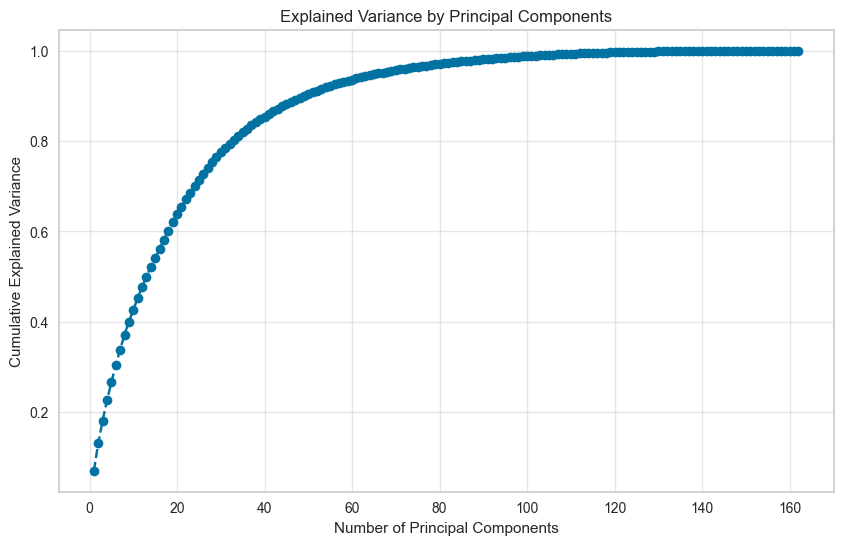

Number of components to retain 85% variance: 40


In [60]:
# applying PCA and explained variance ratio
pca = PCA()
principal_components = pca.fit_transform(df_scaled_filtered)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# plotting cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(alpha=0.5)
plt.show()

# choosing the number of components to retain (85% variance explained)
n_components = np.argmax(cumulative_variance >= 0.85) + 1
print(f'Number of components to retain 85% variance: {n_components}')

# applying PCA with the selected number of components
pca = PCA(n_components=n_components)
data_reduced = pca.fit_transform(df_scaled_filtered)

# accessing PCA components
df_pca = pd.DataFrame(data_reduced)
pca_loadings = pd.DataFrame(pca.components_, columns=df_scaled_filtered.columns, index=[f'PC{i+1}' for i in range(n_components)])

# identifying top contributing feature for each component and rename columns based on top features
df_pca.columns = [f'{pca_loadings.abs().idxmax(axis=1)[i]}_PC{i+1}' for i in range(n_components)]

In [61]:
# Get the indices of the top features based on their contribution to the principal components
# Sum the absolute loadings for each feature across all retained components
top_features_indices = np.argsort(np.abs(pca_loadings).sum(axis=0))[-40:]

# Select the corresponding columns from df_scaled_filtered
df_scaled_reduced = df_scaled_filtered.iloc[:, top_features_indices]
df_non_scaled_reduced = df_non_scaled_filtered.iloc[:, top_features_indices]

print(f"Scaled dataset reduced shape: {df_scaled_reduced.shape}")
print(f"Non-scaled dataset reduced shape: {df_non_scaled_reduced.shape}")

# Display the first few rows of the reduced datasets
print("\nScaled dataset reduced head:")
df_scaled_reduced.head()


Scaled dataset reduced shape: (157001, 40)
Non-scaled dataset reduced shape: (157001, 40)

Scaled dataset reduced head:


DAYS_ID_PUBLISH  OCCUPATION_TYPE_Drivers  \
0         0.374152                        0   
1         0.516333                        0   
2         0.716585                        0   
3         0.626637                        0   
4         0.267950                        0   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WALLSMATERIAL_MODE_Stone, brick  \
0                                    0                                1   
1                                    0                                0   
2                                    0                                0   
3                                    1                                0   
4                                    0                                0   

   NAME_TYPE_SUITE_Family  WEEKDAY_APPR_PROCESS_START_MONDAY  \
0                       0                                  0   
1                       1                                  0   
2                       0                                  1   
3                       1                                  0   
4                       1                                  0   

   HOUSETYPE_MODE_block of flats  WALLSMATERIAL_MODE_Panel  \
0                              1                         0   
1                              1                         1   
2                              0                         0   
3                              1                         1   
4                              0                         0   

   WEEKDAY_APPR_PROCESS_START_FRIDAY  REGION_RATING_CLIENT  \
0                                  0                   0.5   
1                                  0                   0.5   
2                                  0                   0.5   
3                                  0                   1.0   
4                                  0                   0.5   

   OCCUPATION_TYPE_Managers  FONDKAPREMONT_MODE_reg oper account  \
0                         1                                    0   
1                         0                                    1   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   NAME_FAMILY_STATUS_Separated  NAME_INCOME_TYPE_State servant  \
0                             0                               0   
1                             1                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   

   REG_CITY_NOT_LIVE_CITY  ANNUITY_CLASS_High_ANNUITY  \
0                     1.0                           1   
1                     0.0                           1   
2                     0.0                           0   
3                     0.0                           0   
4                     0.0                           0   

   ANNUITY_CLASS_Low_ANNUITY  INCOME_CLASS_Low_INCOME  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        1   

   NAME_INCOME_TYPE_Working  NAME_HOUSING_TYPE_House / apartment  \
0                         1                                    1   
1                         1                                    1   
2                         0                                    1   
3                         1                                    1   
4                         0                                    1   

   INCOME_CLASS_High_INCOME  NAME_FAMILY_STATUS_Married  \
0                         1                           1   
1                         0                           0   
2                         1                           

In [62]:
sorted(df_non_scaled_reduced.columns)

['ANNUITY_CLASS_High_ANNUITY',
 'ANNUITY_CLASS_Low_ANNUITY',
 'CODE_GENDER_F',
 'DAYS_BIRTH_CLASS',
 'DAYS_ID_PUBLISH',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_REALTY_Y',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FONDKAPREMONT_MODE_reg oper account',
 'HOUSETYPE_MODE_block of flats',
 'INCOME_CLASS_High_INCOME',
 'INCOME_CLASS_Low_INCOME',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Working',
 'NAME_TYPE_SUITE_Family',
 'OCCUPATION_TYPE_Core staff',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Managers',
 'OCCUPATION_TYPE_Sales staff',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'ORGANIZATION_TYPE_S

### Manual Removal

* After applying Pearson Correlation and PCA on the variables, we will manually eliminate those that appear redundant or do not provide meaningful information for customer segmentation.

  * Variables related to the days of the week of when the application for the loan had occured ('WEEKDAY_APPR_PROCESS_START_FRIDAY', 'WEEKDAY_APPR_PROCESS_START_MONDAY' and 'WEEKDAY_APPR_PROCESS_START_SATURDAY') will not be relevant, and so they will be removed.

  * We will be keeping 'ANNUITY_CLASS_Low_ANNUITY' and removing 'ANNUITY_CLASS_High_ANNUITY', because clients with low annuities might be less financially burdened, making them more eligible for loans, and it might better differentiate clients with minimal obligations versus those who are heavily committed.

  * We will be keeping both 'NAME_FAMILY_STATUS_Civil marriage' and 'NAME_FAMILY_STATUS_Married' variables and merge then by keeping a binary variable that tells if a person is married or not. These clients might have more financial stability due to dual incomes, making them better loan candidates. On the other hand, we will remove the 'NAME_FAMILY_STATUS_Single / not married' and 'NAME_FAMILY_STATUS_Separated' features.

  * While we remove 'INCOME_CLASS_Low_INCOME', we will keep 'INCOME_CLASS_High_INCOME', as clients in this category likely have more financial stability and may be better candidates for loans.

  * Variables related to phones ('FLAG_PHONE' and 'FLAG_WORK_PHONE') will be removed, as they do not add significant information for clustering.

  * Understanding who accompained the client when he was applying for the loan is not that relevant, and so we will procceed to remove 'NAME_TYPE_SUITE_Family'.

  * The same reasoning applies to 'DAYS_ID_PUBLISH', which will not be relevant for clustering.

  * We will remove the variable 'REG_CITY_NOT_LIVE_CITY', as it is not relevant to understanding whether the client's permanent address matches their contact address at the city level.

 

In [63]:
df_scaled_reduced['NAME_FAMILY_STATUS_Married_or_Civil'] = df_scaled_reduced['NAME_FAMILY_STATUS_Civil marriage'] | df_scaled_reduced['NAME_FAMILY_STATUS_Married']
df_non_scaled_reduced['NAME_FAMILY_STATUS_Married_or_Civil'] = df_non_scaled_reduced['NAME_FAMILY_STATUS_Civil marriage'] | df_non_scaled_reduced['NAME_FAMILY_STATUS_Married']

columns_to_remove = [
    'ANNUITY_CLASS_High_ANNUITY',
    'INCOME_CLASS_Low_INCOME',
    'NAME_TYPE_SUITE_Family', 
    'DAYS_ID_PUBLISH',
    'FLAG_PHONE', 
    'FLAG_WORK_PHONE',
    'NAME_FAMILY_STATUS_Civil marriage',
    'NAME_FAMILY_STATUS_Married',
    'NAME_FAMILY_STATUS_Separated',
    'NAME_FAMILY_STATUS_Single / not married',
    'WEEKDAY_APPR_PROCESS_START_FRIDAY', 
    'WEEKDAY_APPR_PROCESS_START_MONDAY', 
    'WEEKDAY_APPR_PROCESS_START_SATURDAY',
    'REG_CITY_NOT_LIVE_CITY'
]

df_scaled_reduced = df_scaled_reduced.drop(columns=columns_to_remove)
df_non_scaled_reduced = df_non_scaled_reduced.drop(columns=columns_to_remove)

df_scaled_reduced = df_scaled_reduced[sorted(df_scaled_reduced.columns)]
df_non_scaled_reduced = df_non_scaled_reduced[sorted(df_non_scaled_reduced.columns)]

df_non_scaled_reduced['TARGET'] = df_non_scaled_t['TARGET']

print(f"Scaled dataset reduced shape: {df_scaled_reduced.shape}")
print(f"Non-scaled dataset reduced shape: {df_non_scaled_reduced.shape}")
df_scaled_reduced.head()

Scaled dataset reduced shape: (157001, 27)
Non-scaled dataset reduced shape: (157001, 28)


ANNUITY_CLASS_Low_ANNUITY  CODE_GENDER_F  DAYS_BIRTH_CLASS  FLAG_OWN_CAR_N  \
0                          0              0               0.0               0   
1                          0              0               0.0               0   
2                          0              0               1.0               0   
3                          0              1               0.0               0   
4                          0              1               1.0               1   

   FLAG_OWN_REALTY_N  FONDKAPREMONT_MODE_reg oper account  \
0                  1                                    0   
1                  0                                    1   
2                  0                                    0   
3                  0                                    0   
4                  0                                    0   

   HOUSETYPE_MODE_block of flats  INCOME_CLASS_High_INCOME  \
0                              1                         1   
1                              1                         0   
2                              0                         1   
3                              1                         0   
4                              0                         0   

   LIVE_CITY_NOT_WORK_CITY  NAME_CONTRACT_TYPE_Cash loans  \
0                      0.0                              1   
1                      0.0                              1   
2                      1.0                              1   
3                      0.0                              1   
4                      0.0                              1   

   NAME_EDUCATION_TYPE_Higher education  NAME_FAMILY_STATUS_Married_or_Civil  \
0                                     1                                    1   
1                                     1                                    0   
2                                     0                                    1   
3                                     0                                    1   
4                                     0                                    1   

   NAME_HOUSING_TYPE_House / apartment  NAME_INCOME_TYPE_Commercial associate  \
0                                    1                                      0   
1                                    1                                      0   
2                                    1                                      1   
3                                    1                                      0   
4                                    1                                      0   

   NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           1                               0   

   NAME_INCOME_TYPE_Working  OCCUPATION_TYPE_Core staff  \
0                         1                           0   
1                         1                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Laborers  \
0                        0                         0   
1                        0                         1   
2                        0                         0   
3                        0                         1   
4                        0                         0   

   OCCUPATION_TYPE_Managers  OCCUPATION_TYPE_Sales staff  \
0                         1                            0   
1                         0                            0   
2                         0                            0   
3                         0                            0   
4                         0                            0  

## Number of Clusters

* In this section, we aim to determine the optimal number of clusters, or at least a range of possible values, for our clustering algorithms.

* We will apply the following techniques:

    * Elbow Method
    * Silhouette Method
    * Hierarchical Clustering Dendrogram


### Elbow Method

* The Elbow Method is used to identify the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different values of k.
   
   * The point where the decrease in WCSS begins to slow down (forming an "elbow") indicates the ideal number of clusters for the dataset.

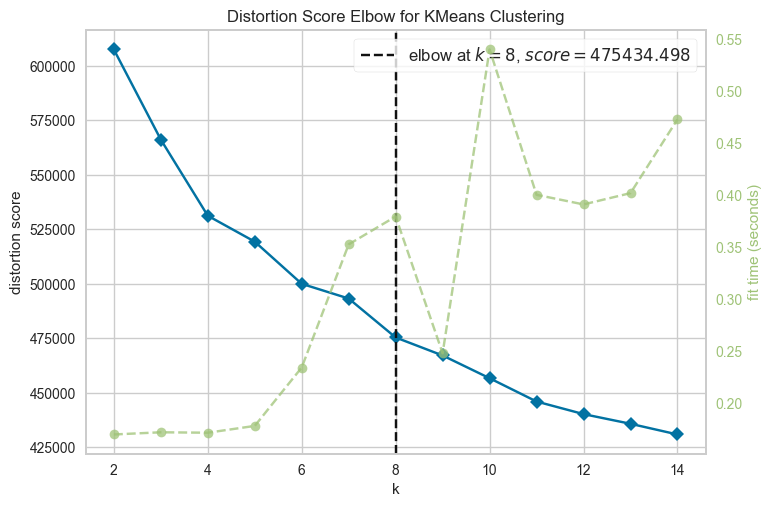

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
kmeans = KMeans(init='k-means++', random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), timings=True).fit(df_scaled_reduced)

elbow_visualizer.show()

* Based on the plot above, we can conclude that a reasonable number for k lies between 5 and 9, with a slight preference for k=8.

### Silhouette Method

* The Silhouette Method helps determine the optimal number of clusters by measuring how similar each point is to its own cluster compared to other clusters.
  
  * The silhouette score ranges from -1 to 1, where a score close to 1 indicates well-defined clusters, 0 indicates overlapping clusters, and negative values suggest incorrect clustering.
  
  * The optimal number of clusters is determined by selecting the k with the highest silhouette score, which reflects the best-defined clustering.

    n_clusters  Silhouette Score
0            2          0.098306
1            3          0.084019
2            4          0.093250
3            5          0.086813
4            6          0.066674
5            7          0.100405
6            8          0.095664
7            9          0.078601
8           10          0.081734
9           11          0.084037
10          12          0.083347


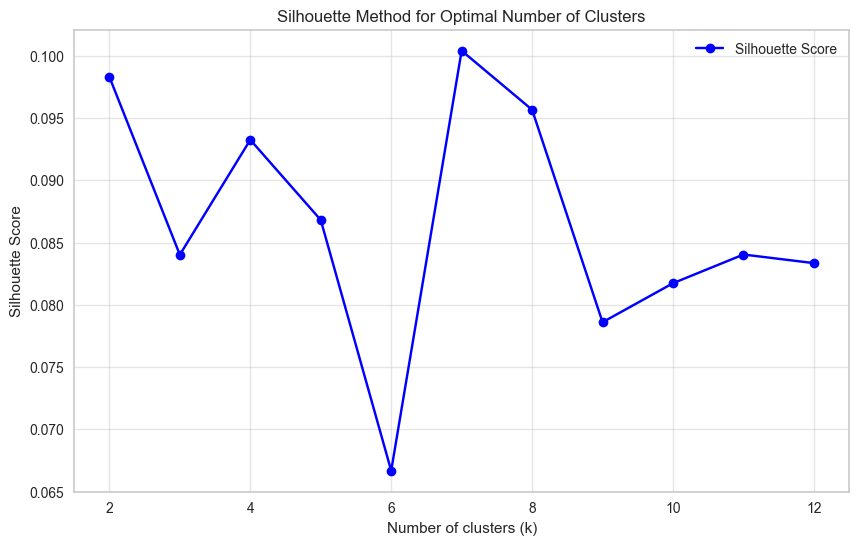

The optimal number of clusters is 7 with the best silhouette score of 0.1004


In [65]:
# silhouette method with sampling
def silhouette_method(data, max_clusters, sample_size, random_state=42):
    silhouette_scores = []
    results = []

    # sampling the data as it is too large
    sample_data = data.sample(n=min(sample_size, len(data)), random_state=random_state) if isinstance(data, pd.DataFrame) else data[:sample_size]
    
    # Loop through different values of k (number of clusters)
    for k in range(2, max_clusters + 1):
        # Fit KMeans on the sampled data
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=random_state)
        kmeans.fit(sample_data)
        
        # Calculate silhouette score for the sampled data
        score = silhouette_score(sample_data, kmeans.labels_)
        silhouette_scores.append(score)
        results.append({"n_clusters": k, "Silhouette Score": score})
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    print(results_df)
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['n_clusters'], results_df['Silhouette Score'], marker='o', color='blue', label='Silhouette Score')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal Number of Clusters')
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()
    
    # Find the optimal number of clusters
    optimal_k = results_df.loc[results_df['Silhouette Score'].idxmax(), 'n_clusters']
    best_score = results_df['Silhouette Score'].max()
    print(f"The optimal number of clusters is {optimal_k} with the best silhouette score of {best_score:.4f}")

    return optimal_k, results_df

# Run the silhouette method
optimal_k, results_df = silhouette_method(df_scaled_reduced, max_clusters=12, sample_size=25000)

* From the Silhouette plot, we can deduce that a reasonable number of clusters would be 7, for having the highest Silhouette score. 

  * However, the Silhouette score is relatively low (~ 0.10), indicating some overlap between the clusters.

    * To address this, we attempted to reduce the dimensionality of the features, resulting in a total of 14 features (which explained only 50% of the dataset's variance).
    * However, the Silhouette scores only marginally improved, reaching a score of around 0.12.

      * These observations led us to conclude that the dataset may not be well-suited for clustering tasks.

### Hierarchical Clustering

* Hierarchical clustering is a method of cluster analysis that builds a hierarchy of clusters.

    * Resulting from the Hierarchical Clustering algorithm, the dendrogram is a tree-like diagram that illustrates the arrangement of clusters at various levels of similarity.
    
        * The height at which two clusters merge represents the distance between them.
    
    * By analyzing the dendrogram, we can identify the optimal number of clusters by finding the "cut-off" point where the clusters start to merge at a higher distance.

In [66]:
# Hierarchical clustering with no pre-defined number of clusters
df_reduced_sampled = df_scaled_reduced.sample(n=25000, random_state=42)  # using sample size
hierarchical = AgglomerativeClustering(linkage='ward',
                                       distance_threshold=0, n_clusters=None).fit(df_reduced_sampled)

def plot_dendrogram(model, **kwargs):
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Create the linkage matrix
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

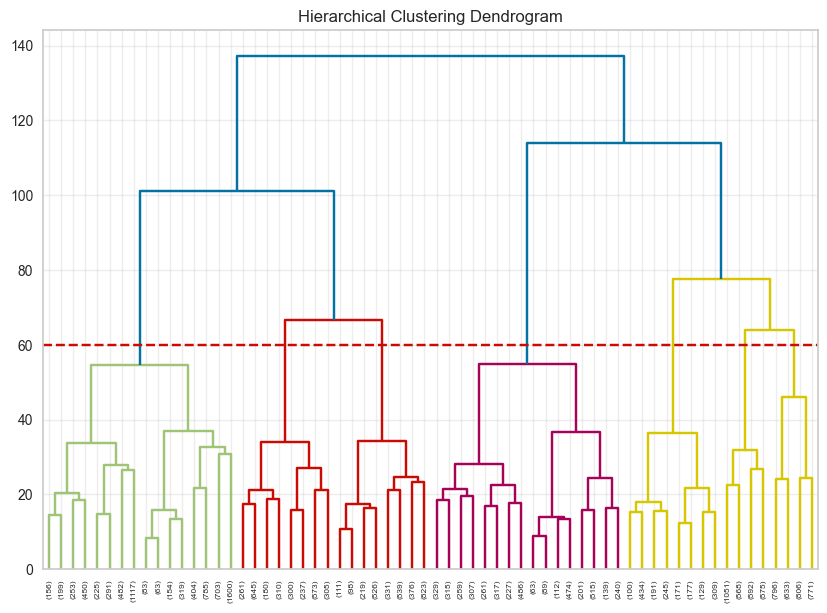

In [67]:
# Plotting the dendrogram
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(hierarchical, truncate_mode="level", p=5)
plt.axhline(y=60, color='r', linestyle='--')
plt.grid(alpha=0.35)
plt.show()

* The dendrogram suggests that a reasonable number of clusters could be 7
.

* **Conclusion**: In summary, this section presented us with potential cluster numbers, and the conclusion is that the **number of clusters should be 7**.

## Clustering Algorithms

* Finally, we will train clustering algorithms on our dataset, using the features we previously reduced and the number of clusters determined earlier.

* The algorithms we will be testing are:
    
    * K-Means
    * Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

### K-Means

* K-Means is an unsupervised clustering algorithm that partitions data into a predefined number of clusters (k) based on feature similarity. 

  * The algorithm works by iteratively assigning data points to the nearest cluster center and recalculating the cluster centers until convergence. 

  * K-Means aims to minimize the sum of squared distances between the data points and their respective cluster centers, making it effective for well-separated, spherical clusters.

  * However, it is sensitive to the initial placement of centroids and may struggle with clusters of varying shapes and densities.

  <br>

* Limitations for the management team:
  
  * Additionally, K-Means requires the number of clusters (k) to be specified in advance, which can be challenging when the optimal number of clusters is not known.

  * The algorithm is also sensitive to outliers, as they can significantly affect the position of the centroids and distort the clustering results.

In [68]:
# a brief GridSearch for K-Means
df_for_kmeans = df_scaled_reduced.copy().sample(n=25000, random_state=42) # using a sample to run faster

param_grid = {
    'n_clusters': [7], 
    'init': ['k-means++'],
    'n_init': [15, 20, 25],
    'max_iter': [10, 20, 30]
}

best_model = None
best_score = -1
best_params = None

# iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(df_for_kmeans)
    
    # calculate silhouette score
    score = silhouette_score(df_for_kmeans, labels)
    
    if score > best_score:
        best_score = score
        best_model = kmeans
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

Best Parameters: {'init': 'k-means++', 'max_iter': 20, 'n_clusters': 7, 'n_init': 15}
Best Silhouette Score: 0.1004050328050533


kmeans_cluster
3    27658
6    27617
1    22351
4    20804
5    20200
2    20022
0    18349
Name: count, dtype: int64


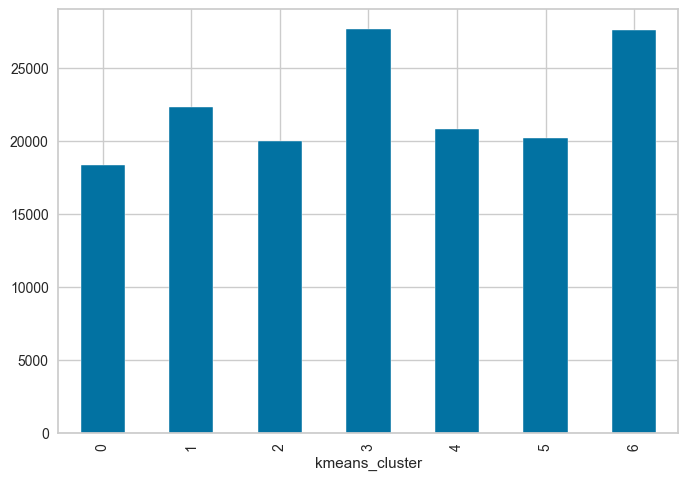

In [69]:
# K-Means training
kmeans = KMeans(n_clusters = 7, init='k-means++', max_iter=20, n_init=15, random_state = 42).fit(df_for_kmeans)
df_non_scaled_reduced['kmeans_cluster'] = kmeans.predict(df_scaled_reduced)

print(df_non_scaled_reduced['kmeans_cluster'].value_counts())  
df_non_scaled_reduced.groupby(['kmeans_cluster']).size().plot(kind='bar')
plt.show()

In [70]:
df_non_scaled_reduced.groupby(['kmeans_cluster']).mean()

ANNUITY_CLASS_Low_ANNUITY  CODE_GENDER_F  DAYS_BIRTH_CLASS  \
kmeans_cluster                                                               
0                                0.303995       0.624557          0.458717   
1                                0.279585       0.639748          0.440115   
2                                0.303616       0.009589          0.417990   
3                                0.384843       0.997324          0.456468   
4                                0.328254       0.648337          0.466833   
5                                0.250099       0.623069          0.467525   
6                                0.433139       0.820328          0.989028   

                FLAG_OWN_CAR_N  FLAG_OWN_REALTY_Y  \
kmeans_cluster                                      
0                     0.642814           0.690174   
1                     0.614782           0.665474   
2                     0.407102           0.648537   
3                     0.765999           0.674850   
4                     0.664824           0.691405   
5                     0.624356           0.699455   
6                     0.823949           0.763334   

                FONDKAPREMONT_MODE_reg oper account  \
kmeans_cluster                                        
0                                          0.526677   
1                                          0.001342   
2                                          0.010488   
3                                          0.000868   
4                                          0.532734   
5                                          0.492277   
6                                          0.231669   

                HOUSETYPE_MODE_block of flats  INCOME_CLASS_High_INCOME  \
kmeans_cluster                                                            
0                                    0.995477                  0.345359   
1                                    0.020715                  0.363205   
2                                    0.076865                  0.326691   
3                                    0.069419                  0.168270   
4                                    0.990338                  0.317487   
5                                    0.995446                  0.475099   
6                                    0.478220                  0.179165   

                LIVE_CITY_NOT_WORK_CITY  NAME_CONTRACT_TYPE_Revolving loans  \
kmeans_cluster                                                                
0                              0.110142                            0.101967   
1                              0.282046                            0.095521   
2                              0.395565                            0.074818   
3                              0.261877                            0.103731   
4                              0.133917                            0.107768   
5                              0.120743                            0.113614   
6                              0.000181                            0.060144   

                NAME_EDUCATION_TYPE_Higher education  \
kmeans_cluster                                         
0                                           0.292223   
1                                           0.301105   
2                                           0.137649   
3                                           0.179297   
4                                           0.279754   
5                                           0.371584   
6                                           0.144838   

                NAME_FAMILY_STATUS_Married_or_Civil  \
kmeans_cluster                                        
0                                          0.732083   
1                                          0.775267   
2                                          0.800769   
3                                          0.765529   
4                                          0.722361   
5                                          0.717178   
6     

#### Clusters' Interpretation
- **Cluster 0**: **Urban Educated Professionals**
  - This cluster represents urban, mostly middle-aged females with moderate income levels, most of whom are working professionals. They predominantly live in block of flats constructed with panel materials, indicating a preference or necessity for urban, high-density housing. The group is characterized by higher education levels, real estate ownership, and a relatively conservative approach to credit, with limited use of revolving loans.
<br>

- **Cluster 1**: **Stable and Risk-Averse Families**
  - This cluster mostly represents middle-aged females with moderate income levels, many of whom have their income from commercial association. They typically own real estate but are less likely to own a car. Most individuals in this group are married or in civil unions and have a higher education background, when compared to other clusters, reflecting a degree of financial and social stability. Their reliance on revolving loans and operational accounts is minimal, reflecting a conservative approach to credit. This cluster appears to consist of financially stable, risk-averse individuals with a preference for stable housing and cautious financial behavior.
<br>

- **Cluster 2**: **Working-Class Men with Asset Stability**
  - This cluster represents men who tend to have moderate income levels, with a significant proportion not classified as "High Income." These individuals are more likely to own real estate and a car, which could suggest a preference for stability in housing and for other assets. Most of them live in houses or apartments, with only a small percentage residing in block-style flats. Occupation-wise, the cluster is dominated working drivers and laborers. Their engagement with operational accounts is minimal, indicating limited use of banking services. The low reliance on revolving loans shows that they prefer not to depend on credit flexibility. Despite these characteristics, the majority of individuals in this cluster are either married or in civil unions, suggesting a stable family.
<br>

- **Cluster 3**: **Low-Income Working Women**
  - This cluster is characterized by women which have a lower income level and tend to own real estate but are less likely to own a car. They prefer not to live in block-style flats. These individuals exhibit low engagement with operational accounts, suggesting that they may not heavily rely on banking services. Furthermore, the low incidence of revolving loans indicates that they are not as dependent on credit flexibility, and that they might prefer cash loans. Many individuals in this group do not have higher education, but are married or in civil unions, reflecting a relatively stable family. 
<br>

- **Cluster 4**: **Middle-Income Households**
  - This cluster consists of individuals with a moderate income level, who tend to own real estate but are less likely to own a car. They prefer to live in houses or apartments, with a significant portion residing in block-style flats. The group is diverse in terms of occupation, including core staff, managers, laborers, and some self-employed individuals or those working for business entities. They display moderate engagement with operational accounts, which suggests they may rely on these accounts for their financial transactions. Additionally, there is a moderate presence of revolving loans, indicating that they may require some financial flexibility. Most individuals in this cluster have higher education and are in stable family relationships, often married or in civil unions. This group likely represents a financially stable but credit-flexible segment of the population.
<br>

- **Cluster 5**: **Urban High-Income Commercial Associates**
  - This cluster consists of urban-dwelling middle-aged individuals, mostly females, who are primarily commercial associates. They tend to own real estate but not cars, suggesting a preference or need for urban living with access to public transportation. The group is well-educated, with a significant portion having higher education, and most are married or in civil unions. The income levels are higher than average, as reflected in the strong representation of high-income earners. Housing is urban-centric, with a near-even split between panel and stone/brick materials, highlighting a mix of older and newer housing infrastructure. The region risk rating is the lowest among all clusters. Loan behavior indicates a conservative approach, with limited reliance on revolving loans.
<br>

- **Cluster 6**: **Elderly Pensioners**
  - This cluster primarily represents elderly females who are likely retired (pensioners) and live in houses or apartments they own. They exhibit low financial activity, with minimal use of operational accounts and revolving loans. This group resides in urban or suburban areas with a mix of block flats and traditional housing. Their financial profile reflects a low-income bracket, with most of their wealth tied to real estate and to their pension. The negligible presence of individuals in active occupations suggests this cluster is almost entirely composed of individuals who are out of the workforce, that is, pensioners, focusing on maintaining a stable, low-risk lifestyle.

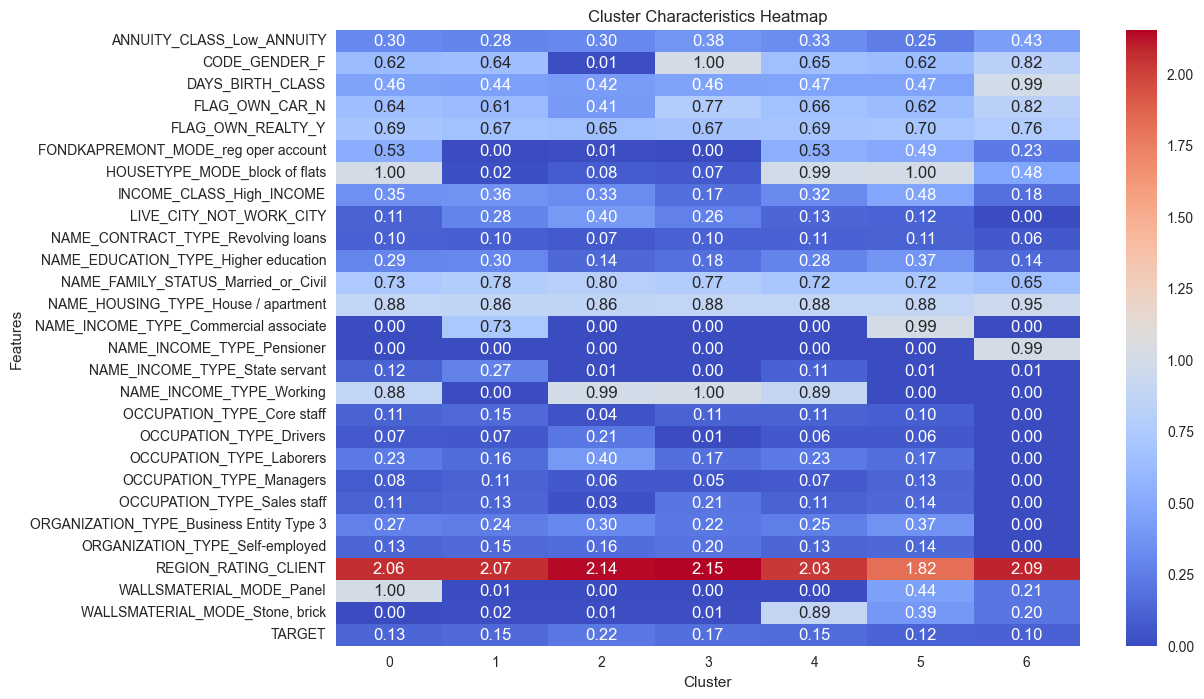

In [71]:
# heatmap of mean values for each feature by cluster
plt.figure(figsize=(12, 8))
sns.heatmap(df_non_scaled_reduced.groupby(['kmeans_cluster']).mean().T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Cluster Characteristics Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

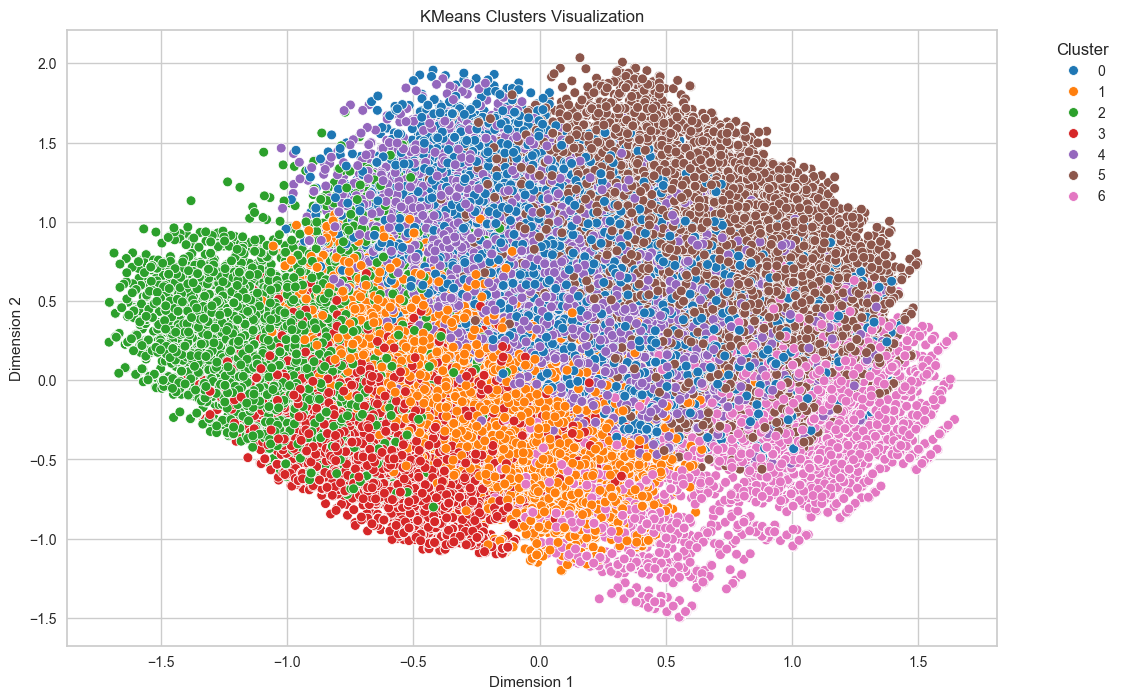

In [72]:
# plotting the KMeans clusters into a 2D visualization
reducer = PCA(n_components=2)
reduced_2d = reducer.fit_transform(df_scaled_reduced)
df_scaled_reduced['dim1'] = reduced_2d[:, 0]
df_scaled_reduced['dim2'] = reduced_2d[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='dim1', y='dim2', hue=df_non_scaled_reduced['kmeans_cluster'],  
    data=df_scaled_reduced, palette='tab10', legend='full', s=50)

plt.title('KMeans Clusters Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

df_scaled_reduced = df_scaled_reduced.drop(columns=['dim1', 'dim2'])

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups data points based on their density in the feature space.

  * The algorithm works by identifying regions of high density and grouping together data points that are close to each other, while marking data points in low-density regions as outliers or noise.

  * DBSCAN does not require the number of clusters to be specified in advance, making it more flexible than K-Means in scenarios where the number of clusters is unknown.

  * It is particularly effective for datasets with clusters of arbitrary shapes and varying densities, as it can identify non-spherical clusters.

  <br>

* Limitations for the management team:
  
  * However, DBSCAN is sensitive to the choice of its two main parameters: the radius (epsilon) and the minimum number of points required to form a cluster. Incorrect parameter settings can lead to poor clustering results.

  * The algorithm may also struggle with datasets that contain clusters of significantly different densities, as it may fail to identify smaller clusters or treat them as noise.

dbscan_cluster
-1    149789
 0      1834
 1      1471
 2      1128
 3       801
 4       611
 7       468
 6       455
 5       444
Name: count, dtype: int64


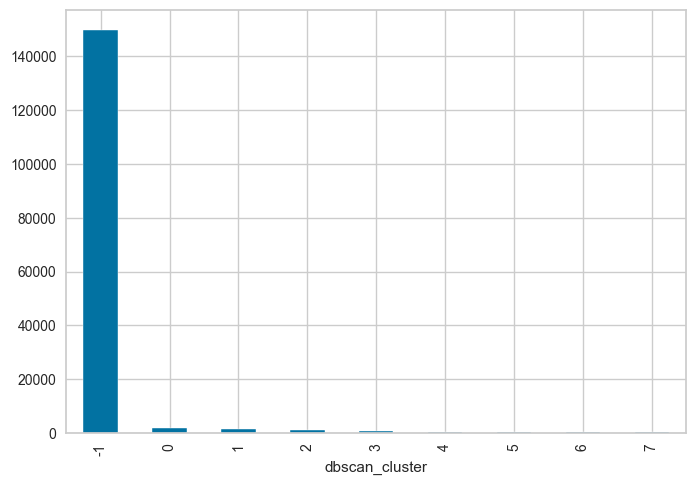

In [73]:
# DBSCAN training
df_non_scaled_reduced['dbscan_cluster'] = DBSCAN(eps=0.75, min_samples=400).fit_predict(df_scaled_reduced)
df_non_scaled_reduced['dbscan_cluster'].values.reshape(-1, 1)

print(df_non_scaled_reduced['dbscan_cluster'].value_counts())  
df_non_scaled_reduced.groupby(['dbscan_cluster']).size().plot(kind='bar')
plt.show()

In [74]:
df_non_scaled_reduced.groupby('dbscan_cluster').mean()

ANNUITY_CLASS_Low_ANNUITY  CODE_GENDER_F  DAYS_BIRTH_CLASS  \
dbscan_cluster                                                               
-1                                0.32939       0.634573          0.524111   
 0                                0.00000       1.000000          1.000000   
 1                                1.00000       1.000000          1.000000   
 2                                1.00000       1.000000          1.000000   
 3                                0.00000       1.000000          1.000000   
 4                                0.00000       1.000000          1.000000   
 5                                0.00000       1.000000          1.000000   
 6                                1.00000       1.000000          1.000000   
 7                                0.00000       1.000000          1.000000   

                FLAG_OWN_CAR_N  FLAG_OWN_REALTY_Y  \
dbscan_cluster                                      
-1                    0.646636           0.685204   
 0                    1.000000           1.000000   
 1                    1.000000           1.000000   
 2                    1.000000           1.000000   
 3                    1.000000           1.000000   
 4                    1.000000           0.000000   
 5                    1.000000           1.000000   
 6                    1.000000           0.000000   
 7                    1.000000           1.000000   

                FONDKAPREMONT_MODE_reg oper account  \
dbscan_cluster                                        
-1                                         0.249371   
 0                                         0.000000   
 1                                         0.000000   
 2                                         0.000000   
 3                                         0.000000   
 4                                         0.000000   
 5                                         0.000000   
 6                                         0.000000   
 7                                         0.000000   

                HOUSETYPE_MODE_block of flats  INCOME_CLASS_High_INCOME  \
dbscan_cluster                                                            
-1                                   0.508088                  0.309475   
 0                                   0.000000                  0.000000   
 1                                   0.000000                  0.000000   
 2                                   0.000000                  0.000000   
 3                                   0.000000                  0.000000   
 4                                   0.000000                  0.000000   
 5                                   0.000000                  1.000000   
 6                                   0.000000                  0.000000   
 7                                   0.000000                  0.000000   

                LIVE_CITY_NOT_WORK_CITY  NAME_CONTRACT_TYPE_Revolving loans  \
dbscan_cluster                                                                
-1                             0.191723                            0.097277   
 0                             0.000000                            0.000000   
 1                             0.000000                            0.000000   
 2                             0.000000                            0.000000   
 3                             0.000000                            0.000000   
 4                             0.000000                            0.000000   
 5                             0.000000                            0.000000   
 6                             0.000000                            0.000000   
 7                             0.000000                            0.000000   

                NAME_EDUCATION_TYPE_Higher education  \
dbscan_cluster                                         
-1                                          0.247902   
 0                                          0.000000   
 1                                          0.0

#### Clusters' Interpretation
- The DBSCAN clustering results indicate poor clustering performance.
- The majority of data points (149,789) are assigned to the noise cluster (dbscan_cluster = -1), which suggests that a significant portion of the dataset does not fit into any defined cluster.
- Additionally, the remaining clusters have an imbalanced distribution of points, with the largest cluster containing only 1,834 points and the smallest containing 444 points.
- In conclusion, we will try another approach with the DBSCAN.

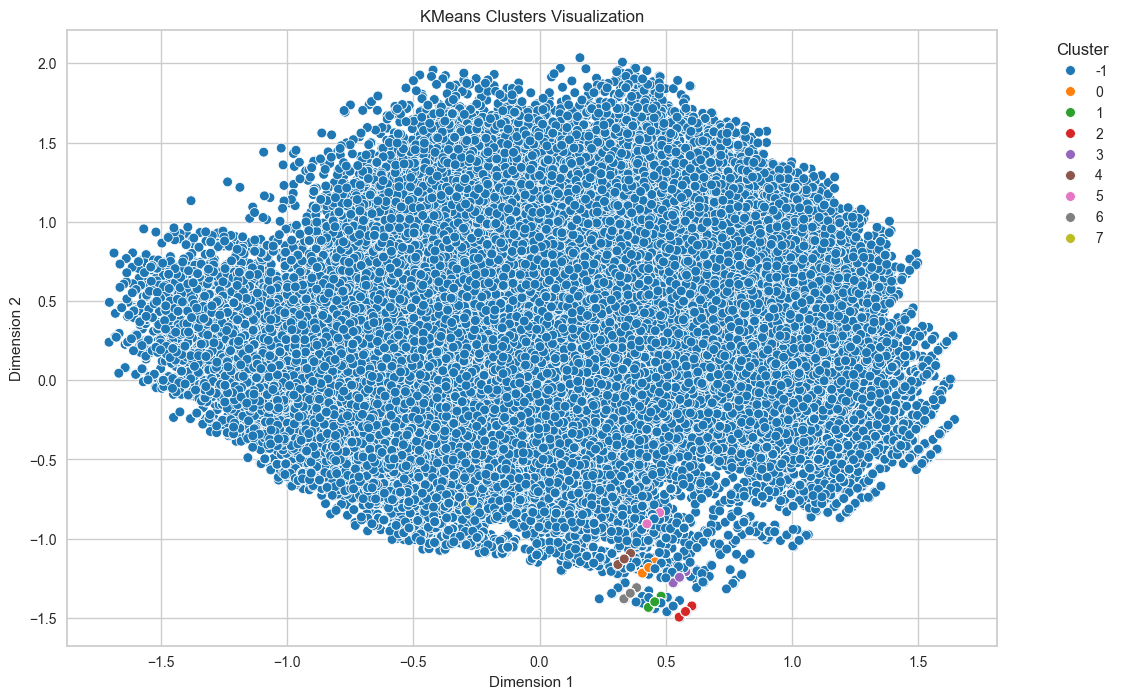

In [75]:
# plotting the KMeans clusters into a 2D visualization
reducer = PCA(n_components=2)
reduced_2d = reducer.fit_transform(df_scaled_reduced)
df_scaled_reduced['dim1'] = reduced_2d[:, 0]
df_scaled_reduced['dim2'] = reduced_2d[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='dim1', y='dim2', hue=df_non_scaled_reduced['dbscan_cluster'],  
    data=df_scaled_reduced, palette='tab10', legend='full', s=50)

plt.title('KMeans Clusters Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

df_scaled_reduced = df_scaled_reduced.drop(columns=['dim1', 'dim2'])

#### UMAP (Uniform Manifold Approximation and Projection)

* **UMAP** is a dimensionality reduction algorithm that creates a low-dimensional representation of high-dimensional data while preserving its essential structure.

  * The algorithm works by modeling the data's high-dimensional structure as a graph and then optimizing a lower-dimensional layout that closely approximates the relationships in the original data.

  * UMAP emphasizes both local and global structure, making it effective for datasets with complex patterns
  
  * It is computationally efficient and scales well to large datasets.
  * UMAP is versatile and can handle non-linear relationships, making it suitable for datasets with complex geometries.
  * UMAP is often used for clustering tasks, as the reduced representation can make cluster structures more apparent.

<br>

* Limitations for the Management Team

  * **Parameter Sensitivity:** UMAP requires careful tuning of parameters like `n_neighbors` (controls the balance between local and global structure) and `min_dist` (affects the compactness of clusters in the embedding). Incorrect parameter settings can lead to misleading visualizations or loss of important data structure.

  * **Interpretability:** while UMAP is excellent for visualizing and simplifying data, the resulting low-dimensional embeddings may not have straightforward interpretations, which could make it challenging to explain results to non-technical stakeholders.

  * **Cluster Shapes and Densities:** UMAP may struggle with datasets containing clusters of highly varying densities or when the underlying structure is too complex for the dimensionality reduction to capture accurately.



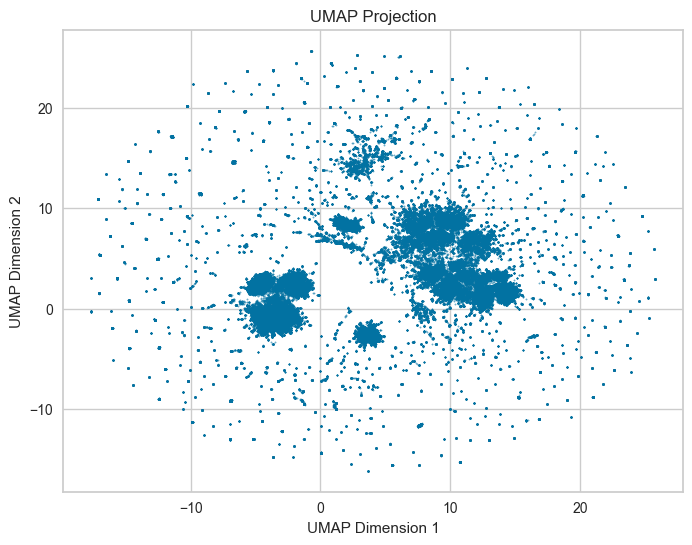

In [76]:
# UMAP parameters
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)

# Fit and transform the scaled data with UMAP
embedding = reducer.fit_transform(df_scaled_reduced)

# Plot the UMAP embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, alpha=0.5)
plt.title("UMAP Projection")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

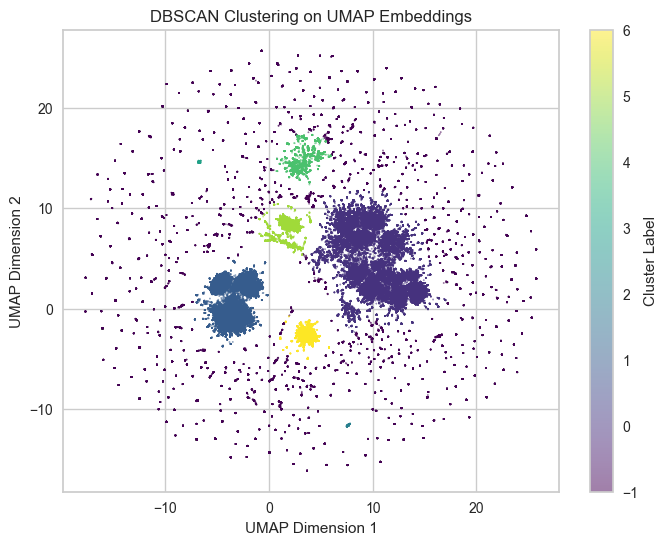

dbscan_cluster
 0    61820
-1    41687
 1    34750
 5     6969
 6     5234
 4     3930
 2     1440
 3     1171
Name: count, dtype: int64


In [77]:
# DBSCAN clustering on UMAP embeddings
dbscan = DBSCAN(eps=1.25, min_samples=1000)
clusters = dbscan.fit_predict(embedding)

# Add the cluster labels to the original dataframe
df_non_scaled_reduced['dbscan_cluster'] = clusters

# Plot the DBSCAN clustering results
plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='viridis', s=1, alpha=0.5)
plt.title("DBSCAN Clustering on UMAP Embeddings")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.colorbar(label='Cluster Label')
plt.show()

# Print cluster distribution
print(df_non_scaled_reduced['dbscan_cluster'].value_counts())

In [78]:
cluster_groups = df_non_scaled_reduced.groupby('dbscan_cluster')
cluster_summary = cluster_groups.mean()  
cluster_summary

ANNUITY_CLASS_Low_ANNUITY  CODE_GENDER_F  DAYS_BIRTH_CLASS  \
dbscan_cluster                                                               
-1                               0.304315       0.785113          0.760069   
 0                               0.383290       0.556923          0.413086   
 1                               0.269813       0.608432          0.450158   
 2                               0.000000       1.000000          1.000000   
 3                               1.000000       1.000000          1.000000   
 4                               0.515267       0.620865          0.973791   
 5                               0.249390       0.787057          0.605682   
 6                               0.325182       0.654757          0.419182   

                FLAG_OWN_CAR_N  FLAG_OWN_REALTY_Y  \
dbscan_cluster                                      
-1                    0.792693           0.800801   
 0                    0.593012           0.641297   
 1                    0.604489           0.678417   
 2                    1.000000           1.000000   
 3                    1.000000           1.000000   
 4                    0.692112           0.491603   
 5                    0.706988           0.650309   
 6                    0.592663           0.593045   

                FONDKAPREMONT_MODE_reg oper account  \
dbscan_cluster                                        
-1                                         0.146952   
 0                                         0.284552   
 1                                         0.281640   
 2                                         0.000000   
 3                                         0.000000   
 4                                         0.318830   
 5                                         0.367485   
 6                                         0.006687   

                HOUSETYPE_MODE_block of flats  INCOME_CLASS_High_INCOME  \
dbscan_cluster                                                            
-1                                   0.291242                  0.137621   
 0                                   0.572582                  0.312472   
 1                                   0.573727                  0.440863   
 2                                   0.000000                  0.000000   
 3                                   0.000000                  0.000000   
 4                                   0.824936                  0.362595   
 5                                   0.725212                  0.461903   
 6                                   0.064005                  0.340466   

                LIVE_CITY_NOT_WORK_CITY  NAME_CONTRACT_TYPE_Revolving loans  \
dbscan_cluster                                                                
-1                             0.105572                            0.038693   
 0                             0.231543                            0.121708   
 1                             0.204000                            0.112374   
 2                             0.000000                            0.000000   
 3                             0.000000                            0.000000   
 4                             0.000000                            0.144020   
 5                             0.190989                            0.074473   
 6                             0.302446                            0.084830   

                NAME_EDUCATION_TYPE_Higher education  \
dbscan_cluster                                         
-1                                          0.086694   
 0                                          0.256972   
 1                                          0.337727   
 2                                          0.000000   
 3                                          0.000000   
 4                                          0.362595   
 5                                          0.371072   
 6                                          0.360336   

                NAME_FAMILY_STATUS_Married_or_Civi

#### Clusters' Interpretation

- **Cluster -1**: **Noise Cluster**
  - This is the noise cluster, that is, this cluster represents individuals who do not fit neatly into any of the predefined segments, displaying a combination of characteristics that make them stand out as outliers. Unfortunatelly, this cluster is quite big, representing almost a third of the observations.
<br>

- **Cluster 0**: **Middle-Income Urban Workers**
  - This cluster appears to represent middle-income, urban-based working individuals with stable housing and family structures. They are typically well-educated, with a mix of occupations spanning various sectors such as corporate, labor, and sales. Their financial behavior suggests they are conservative with credit, relying less on revolving loans and credit flexibility. They likely prefer living in urban environments, with a preference for apartment-style housing, and they are generally in stable family situations, often married or in civil unions.
<br>

- **Cluster 1**: **Higher-Income Urban Professionals**
  - This cluster represents higher-income, urban-based individuals with stable housing and family structures. They are generally well-educated and their income comes from commercial association activities. This cluster shows a moderate reliance on credit and a preference for owning real estate rather than cars. Their financial behavior suggests a conservative approach to credit, with limited use of revolving loans. They likely live in urban areas in high-density housing, and many are in stable family situations. This group may represent a financially stable but cautious segment of the population, with a preference for traditional financial management and moderate risk tolerance.
<br>

- **Cluster 2**: **Elderly Retired Females (No Annuity)**
  - This cluster represents elderly females who are retired and live in stable, traditional housing such as houses or apartments. They own real estate but do not own cars and are not reliant on credit, suggesting a conservative approach to financial management. The individuals in this group rely on pension income, and so they are not actively engaged in the workforce. These individuals are not receiving any annuity payments, further reinforcing the idea that they are primarily dependent on their pension income. This cluster may represent older, financially stable retirees who are living a low-risk lifestyle, with minimal financial activity and reliance on credit or operational accounts. They are likely to be in well-developed regions and maintain a stable family structure.
<br>

- **Cluster 3**: **Elderly Retired Females (With Annuity)**
  - This cluster represents older females. Similarly to the Cluster 2, they own real estate but do not own cars and they are married or in civil unions. The individuals in this group are not using revolving loans or operational accounts, indicating a more conservative financial approach. These individuals are receiving annuity payments, which may provide them with additional financial stability meaning that, while they are not engaged in the workforce, they may have some supplementary income from annuities, making their financial situation slightly different from Cluster 2. This cluster may represent older, financially stable retirees who are living a low-risk lifestyle, with minimal financial activity and reliance on credit or operational accounts, but with the added benefit of annuity payments. 
<br>

- **Cluster 4**: **Elderly Individuals Living Alone**
  - This cluster represents older individuals who exhibit a conservative approach to their finances. They live in urban or suburban areas, typically in apartments or multi-family housing. While they own real estate, they are not dependent on cars and likely use public transportation. Their income primarily comes from pensions, and about half of them are not married—either having never married or being widowed. They do not rely on credit and prefer a cautious financial strategy, with limited engagement in financial activities, but with some exposure to annuities.
<br>

- **Cluster 5**: **Higher-Income State Employees**
  - This cluster represents middle-aged or older females with higher levels of income. They live in urban or suburban areas, often in apartments or multi-family housing. These individuals own real estate but do not own cars, suggesting they may rely on public transportation or other means of mobility. Their income comes from serving the state. Most of them are married or in civil unions and have higher education. They are not engaged in significant credit usage, avoiding revolving loans, but their financial activity is generally moderate, with some exposure to annuities. This group is likely to be in well-developed regions with stable housing and moderate financial behavior.
<br>

- **Cluster 6**: **Job-Seeking Individuals with Temporary State Income**
  - This cluster represents females who have a relatively low level of financial activity and a conservative financial behavior. They live in urban or suburban areas, with a tendency to reside in apartments or multi-family housing. Mostly, these individuals own real estate but do not own cars. Their income comes from state-related sources, indicating they are less engaged in the workforce. They are likely married or in civil unions and have higher education. This group has minimal exposure to revolving loans and operational accounts, indicating a cautious approach to credit. They show a low level of annuity exposure, further emphasizing their conservative financial behavior. This cluster is likely to represent individuals that might be looking for work.


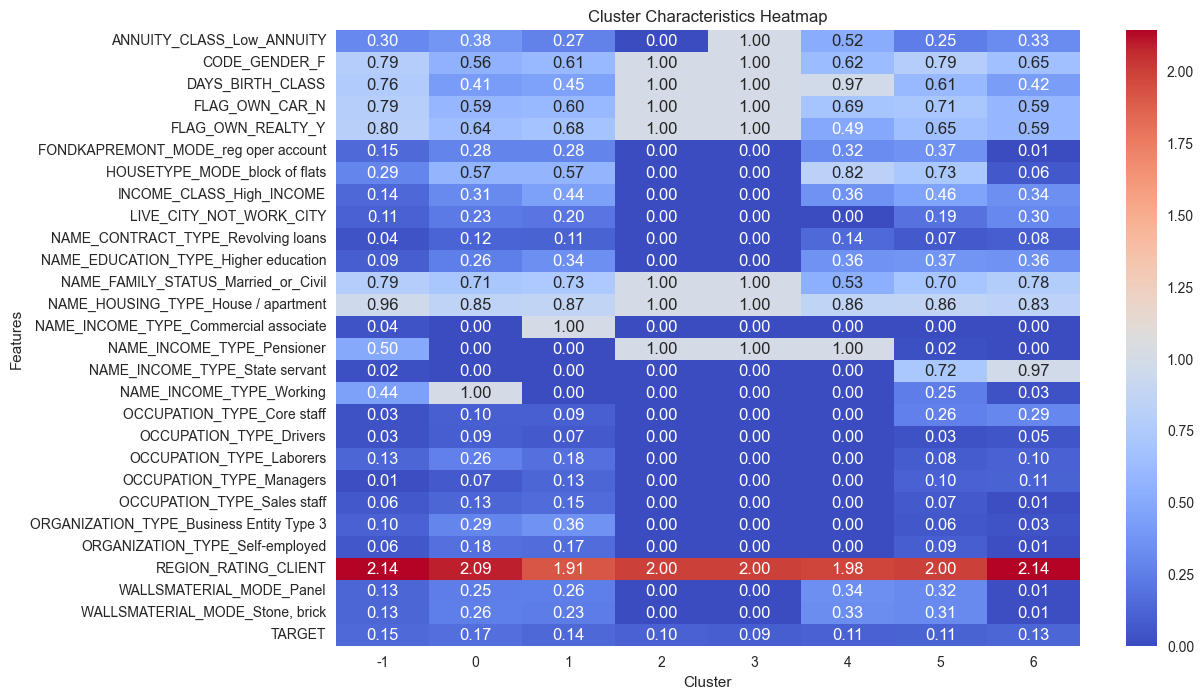

In [79]:
# heatmap of mean values for each feature by cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary.drop(columns=['kmeans_cluster']).T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Cluster Characteristics Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

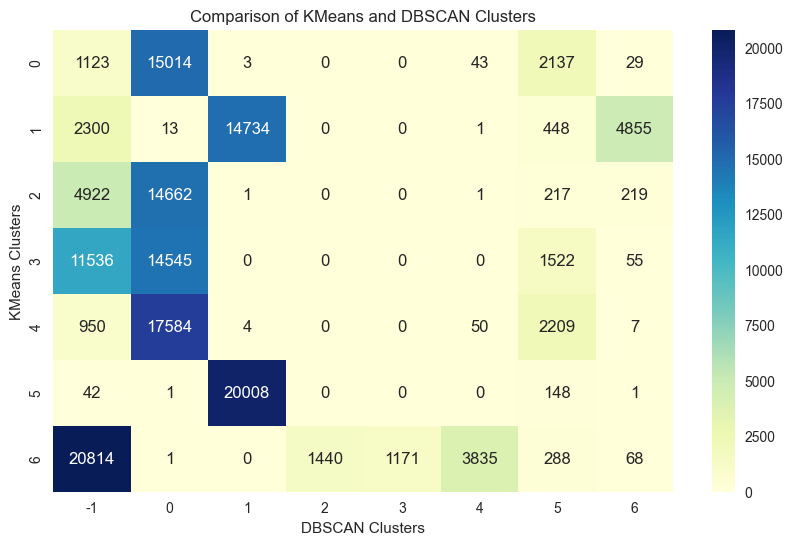

In [80]:
# Group by KMeans clusters and analyze DBSCAN clusters
kmeans_grouped = df_non_scaled_reduced[['kmeans_cluster', 'dbscan_cluster']].groupby('kmeans_cluster')

# Calculate the distribution of DBSCAN clusters within each KMeans cluster
dbscan_distribution = kmeans_grouped['dbscan_cluster'].value_counts(normalize=True).unstack(fill_value=0)

# Create a contingency table for KMeans and DBSCAN clusters
contingency_table = pd.crosstab(df_non_scaled_reduced['kmeans_cluster'], df_non_scaled_reduced['dbscan_cluster'])

# Visualize the contingency table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Comparison of KMeans and DBSCAN Clusters')
plt.xlabel('DBSCAN Clusters')
plt.ylabel('KMeans Clusters')
plt.show()


### Conclusion on Clustering Model Performance

- The clustering models, K-Means and DBSCAN, have grouped the individuals into distinct segments based on their demographic and financial behaviors. However, each model has exhibited unique strengths and challenges in terms of the clusters they produced.

- **K-Means Clustering**:
The K-Means model provided a broad segmentation of the individuals into several clusters, each representing specific financial and demographic characteristics. K-Means was able to identify more variate clusters, such as those based on gender (e.g., a cluster of females, another of males), as well as clusters representing different age groups (e.g., elderly individuals). This ability to identify distinct groups with varying characteristics suggests that K-Means was effective in capturing some of the diversity in the dataset. 

- **DBSCAN Clustering**:
DBSCAN, on the other hand, provided a more flexible approach to clustering by detecting noise and outliers in the dataset. However, DBSCAN focused more heavily on clustering elderly individuals, resulting in three separate clusters for this demographic group. While this focus on elderly people could provide deeper insights into this segment, it may have limited the model's ability to capture the diversity present in other groups. Additionally, the **Noise Cluster (-1)** in DBSCAN highlighted a significant portion of the data that did not conform to any of the predefined patterns, which could be crucial for identifying rare or anomalous behaviors. Unfortunately, many observations were assigned to the noise cluster, which may indicate that the model struggled to properly assign certain individuals to meaningful clusters. 

- In conclusion, both models grouped individuals into interpretable clusters, but K-Means was able to find a more diverse set of clusters, including those based on gender, age, income or education. DBSCAN, while flexible and capable of identifying noise, focused heavily on elderly individuals and had challenges with assigning observations to meaningful clusters. The choice between K-Means and DBSCAN depends on the specific goals of the analysis, with K-Means providing a more balanced approach to capturing diverse segments, while DBSCAN offers greater flexibility in handling noise and outliers.
